In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt


# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

traintest = pd.concat([train, test], axis=0)
# traintest = traintest.round(3)

columns = list(train.columns)
excl = ['target', 'ID_code']

data_cols = columns
for ccc in excl :
    data_cols.pop(data_cols.index(ccc))

input_cols = data_cols
traintest.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


ID_code  target    var_0   var_1   ...     var_96   var_97  var_98  var_99
0  train_0     0.0   8.9255 -6.7863   ...     8.9642  16.2572  2.1743 -3.4132
1  train_1     0.0  11.5006 -4.1473   ...    24.7876  26.6881  1.8944  0.6939
2  train_2     0.0   8.6093 -2.7457   ...    20.4031  17.0360  1.6981 -0.0269
3  train_3     0.0  11.0604 -2.1518   ...    11.3596  18.1486  2.8344  1.9480
4  train_4     0.0   9.8369 -1.4834   ...    14.7246  35.2988  1.6844  0.6715

[5 rows x 202 columns]

In [3]:
stats = traintest[data_cols].describe()

In [4]:
#here going through all the columns 

checkdata = []
traintest['count'] = 1.0
traintest['tag'] = traintest['ID_code'].str[:5] #getting the tags of train and test
for i, ccc in enumerate(columns):
    df = traintest.pivot_table(columns='tag', index = ccc, values='count', aggfunc=np.sum)
    df = df.fillna(0)
    targetsum = traintest.groupby(ccc)['target','count' ].sum() # sum of target and counts
    targetsum['percent_target'] = targetsum['target'] /  targetsum['count']
    df = df.join(targetsum, how='left'   )
    df['train_v_test'] = df['train'] /  df['test_']
    checkdata.append(  df )

df.head(20)#example of the data we are looking at

test_  train      ...       percent_target  train_v_test
var_199                     ...                                   
-39.4578    3.0    0.0      ...                  0.0      0.000000
-38.8528    0.0    2.0      ...                  0.5           inf
-37.9678    2.0    0.0      ...                  0.0      0.000000
-37.6962    0.0    1.0      ...                  0.0           inf
-37.3188    0.0    1.0      ...                  0.0           inf
-37.2230    0.0    1.0      ...                  0.0           inf
-37.1608    0.0    1.0      ...                  0.0           inf
-36.9400    0.0    1.0      ...                  1.0           inf
-36.6019    0.0    1.0      ...                  0.0           inf
-36.3759    0.0    1.0      ...                  1.0           inf
-36.3251    1.0    1.0      ...                  0.0      1.000000
-36.3025    0.0    1.0      ...                  0.0           inf
-36.2435    0.0    1.0      ...                  0.0           inf
-36.2111    0.0    1.0      ...                  0.0           inf
-36.0045    0.0    1.0      ...                  0.0           inf
-35.9103    3.0    0.0      ...                  0.0      0.000000
-35.9057    2.0    0.0      ...                  0.0      0.000000
-35.8137    0.0    1.0      ...                  0.0           inf
-35.7908    1.0    0.0      ...                  0.0      0.000000
-35.7637    0.0    2.0      ...                  0.5           inf

[20 rows x 6 columns]

In [5]:
checkdata[68].head()
len(checkdata[68])

461

In [6]:
len(checkdata[12])

9737

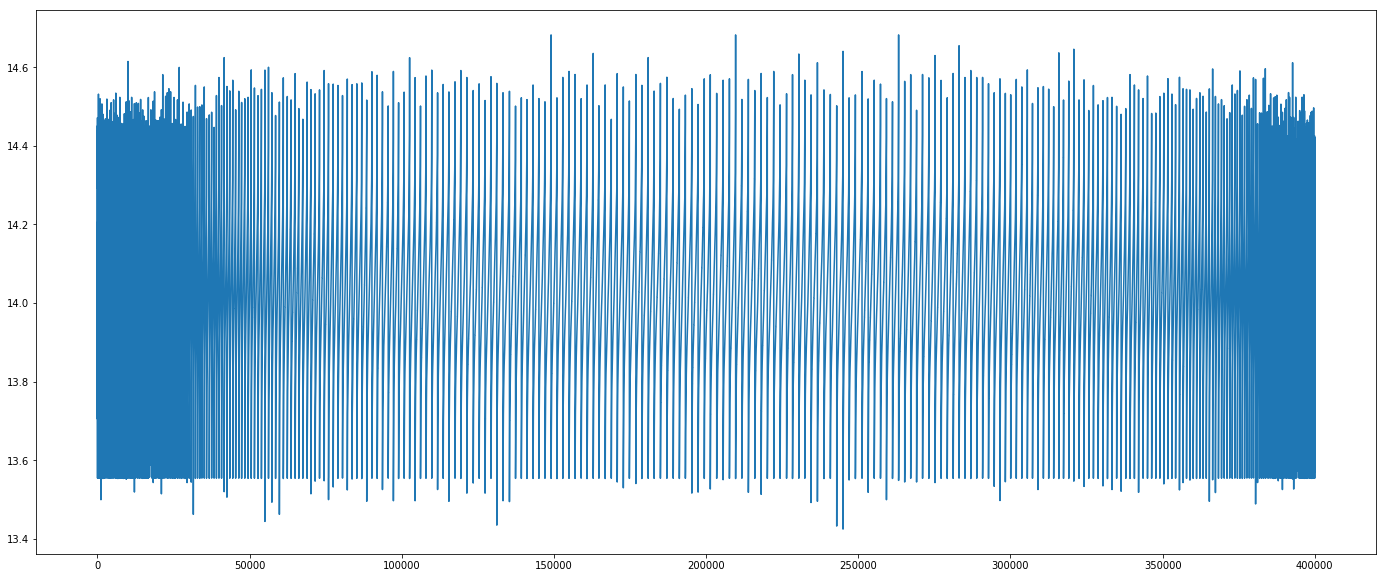

In [7]:
traintest = traintest.sort_values(['var_68', 'var_12'])
plt.figure(figsize = (24,10))

plt.plot(traintest['var_12'][:].values)

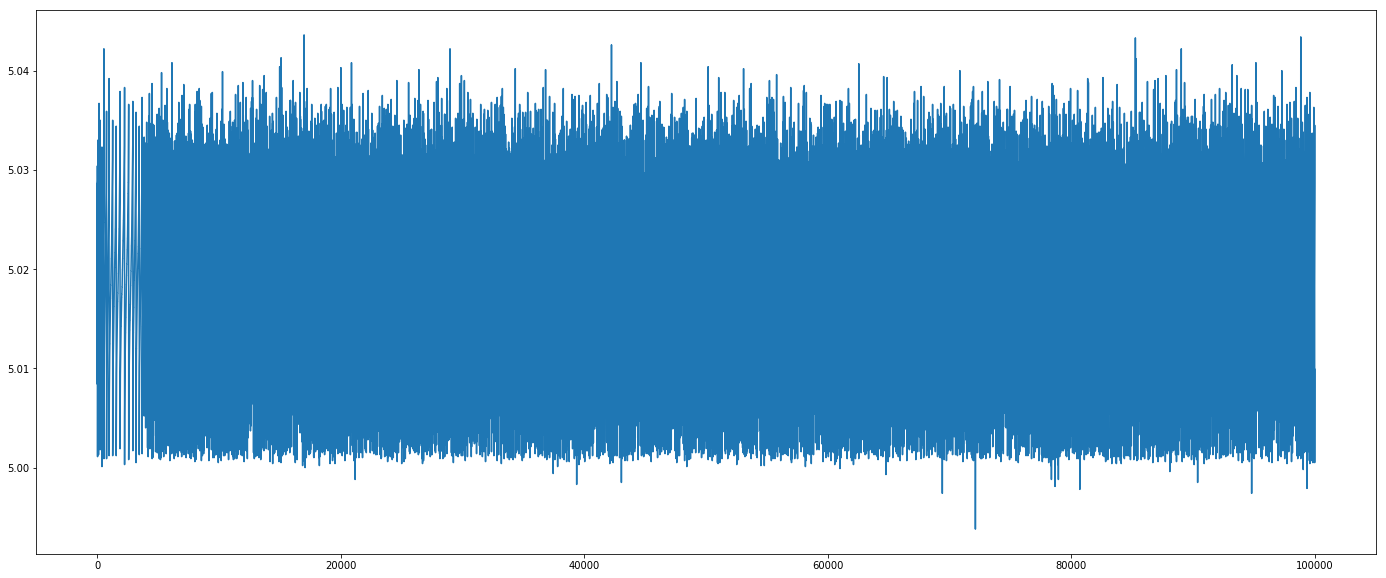

In [8]:
traintest = traintest.sort_values(['var_12', 'var_68'])

plt.figure(figsize = (24,10))

plt.plot(traintest['var_68'][:100000].values)



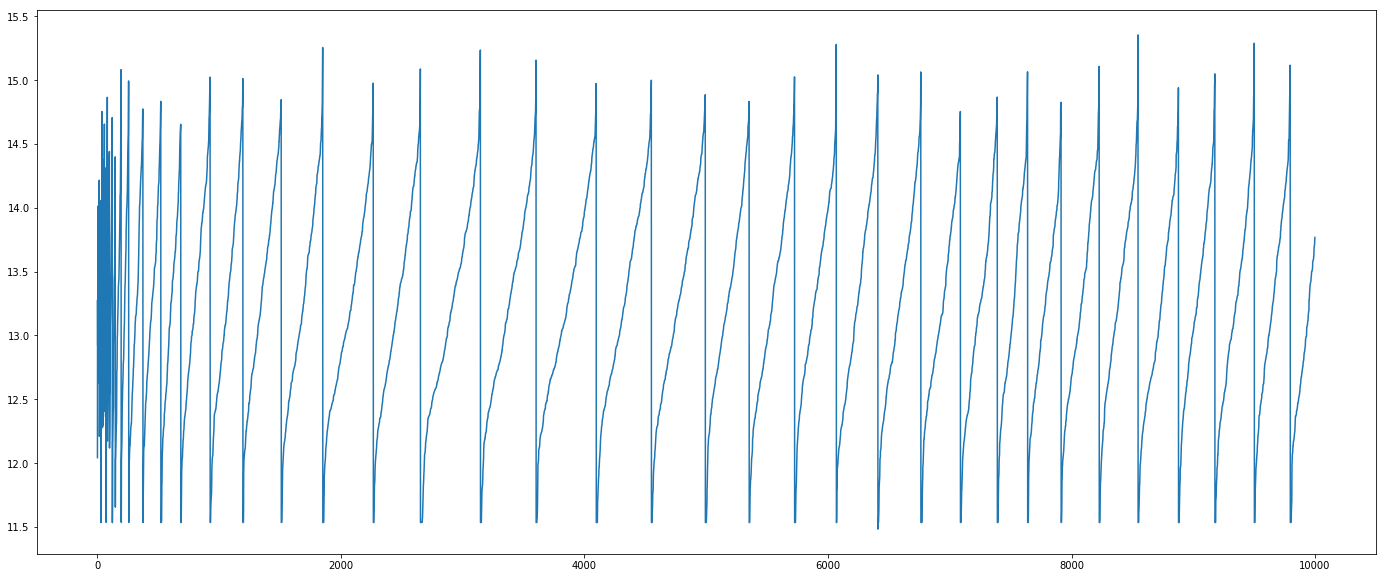

In [9]:
traintest = traintest.sort_values(['var_68', 'var_126'])

plt.figure(figsize = (24,10))

plt.plot(traintest['var_126'][:10000].values)


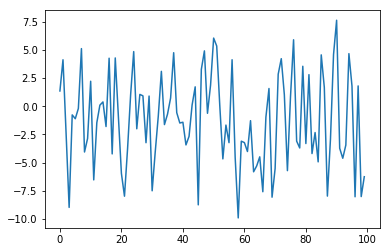

In [10]:
traintest = traintest.sort_values(['var_0', 'var_1'])
plt.plot(traintest['var_1'][:100].values)


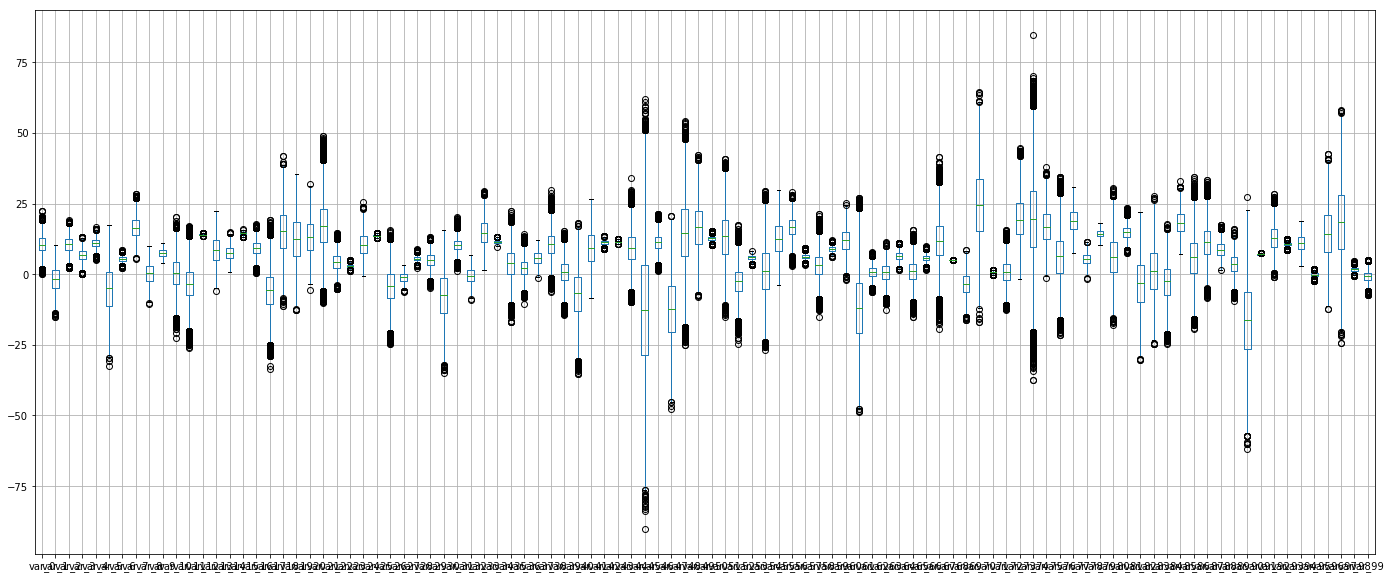

In [11]:
traintest[input_cols[:100]].boxplot(figsize=(24,10))

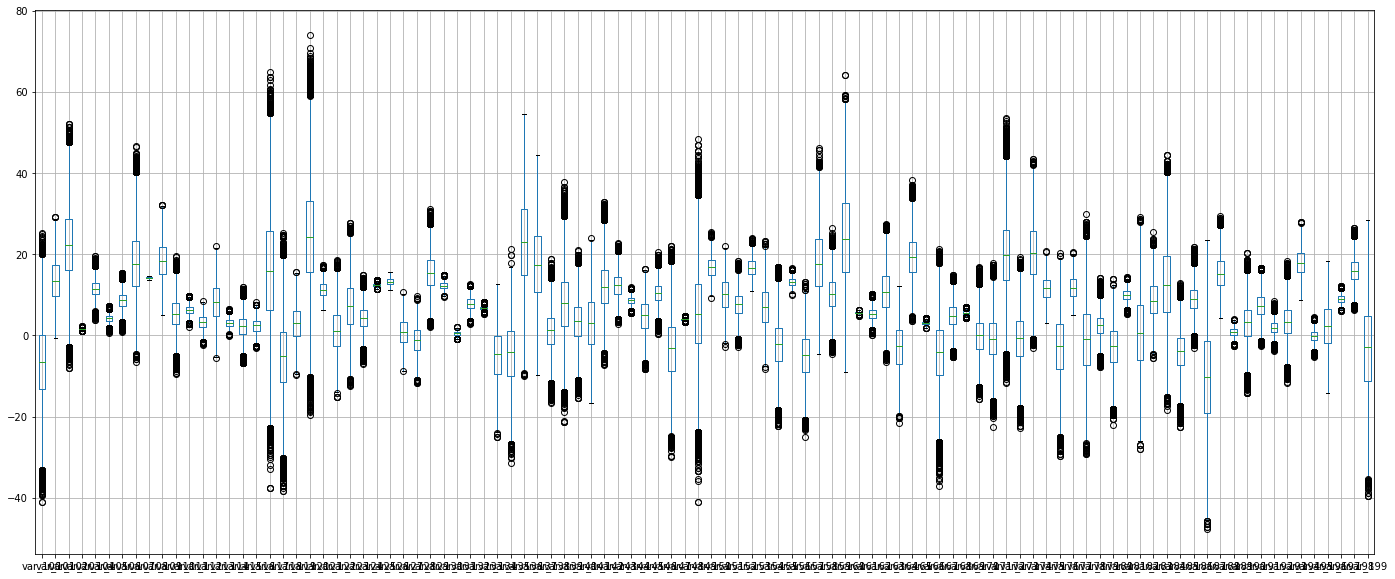

In [12]:
traintest[input_cols[100:]].boxplot(figsize=(24,10))

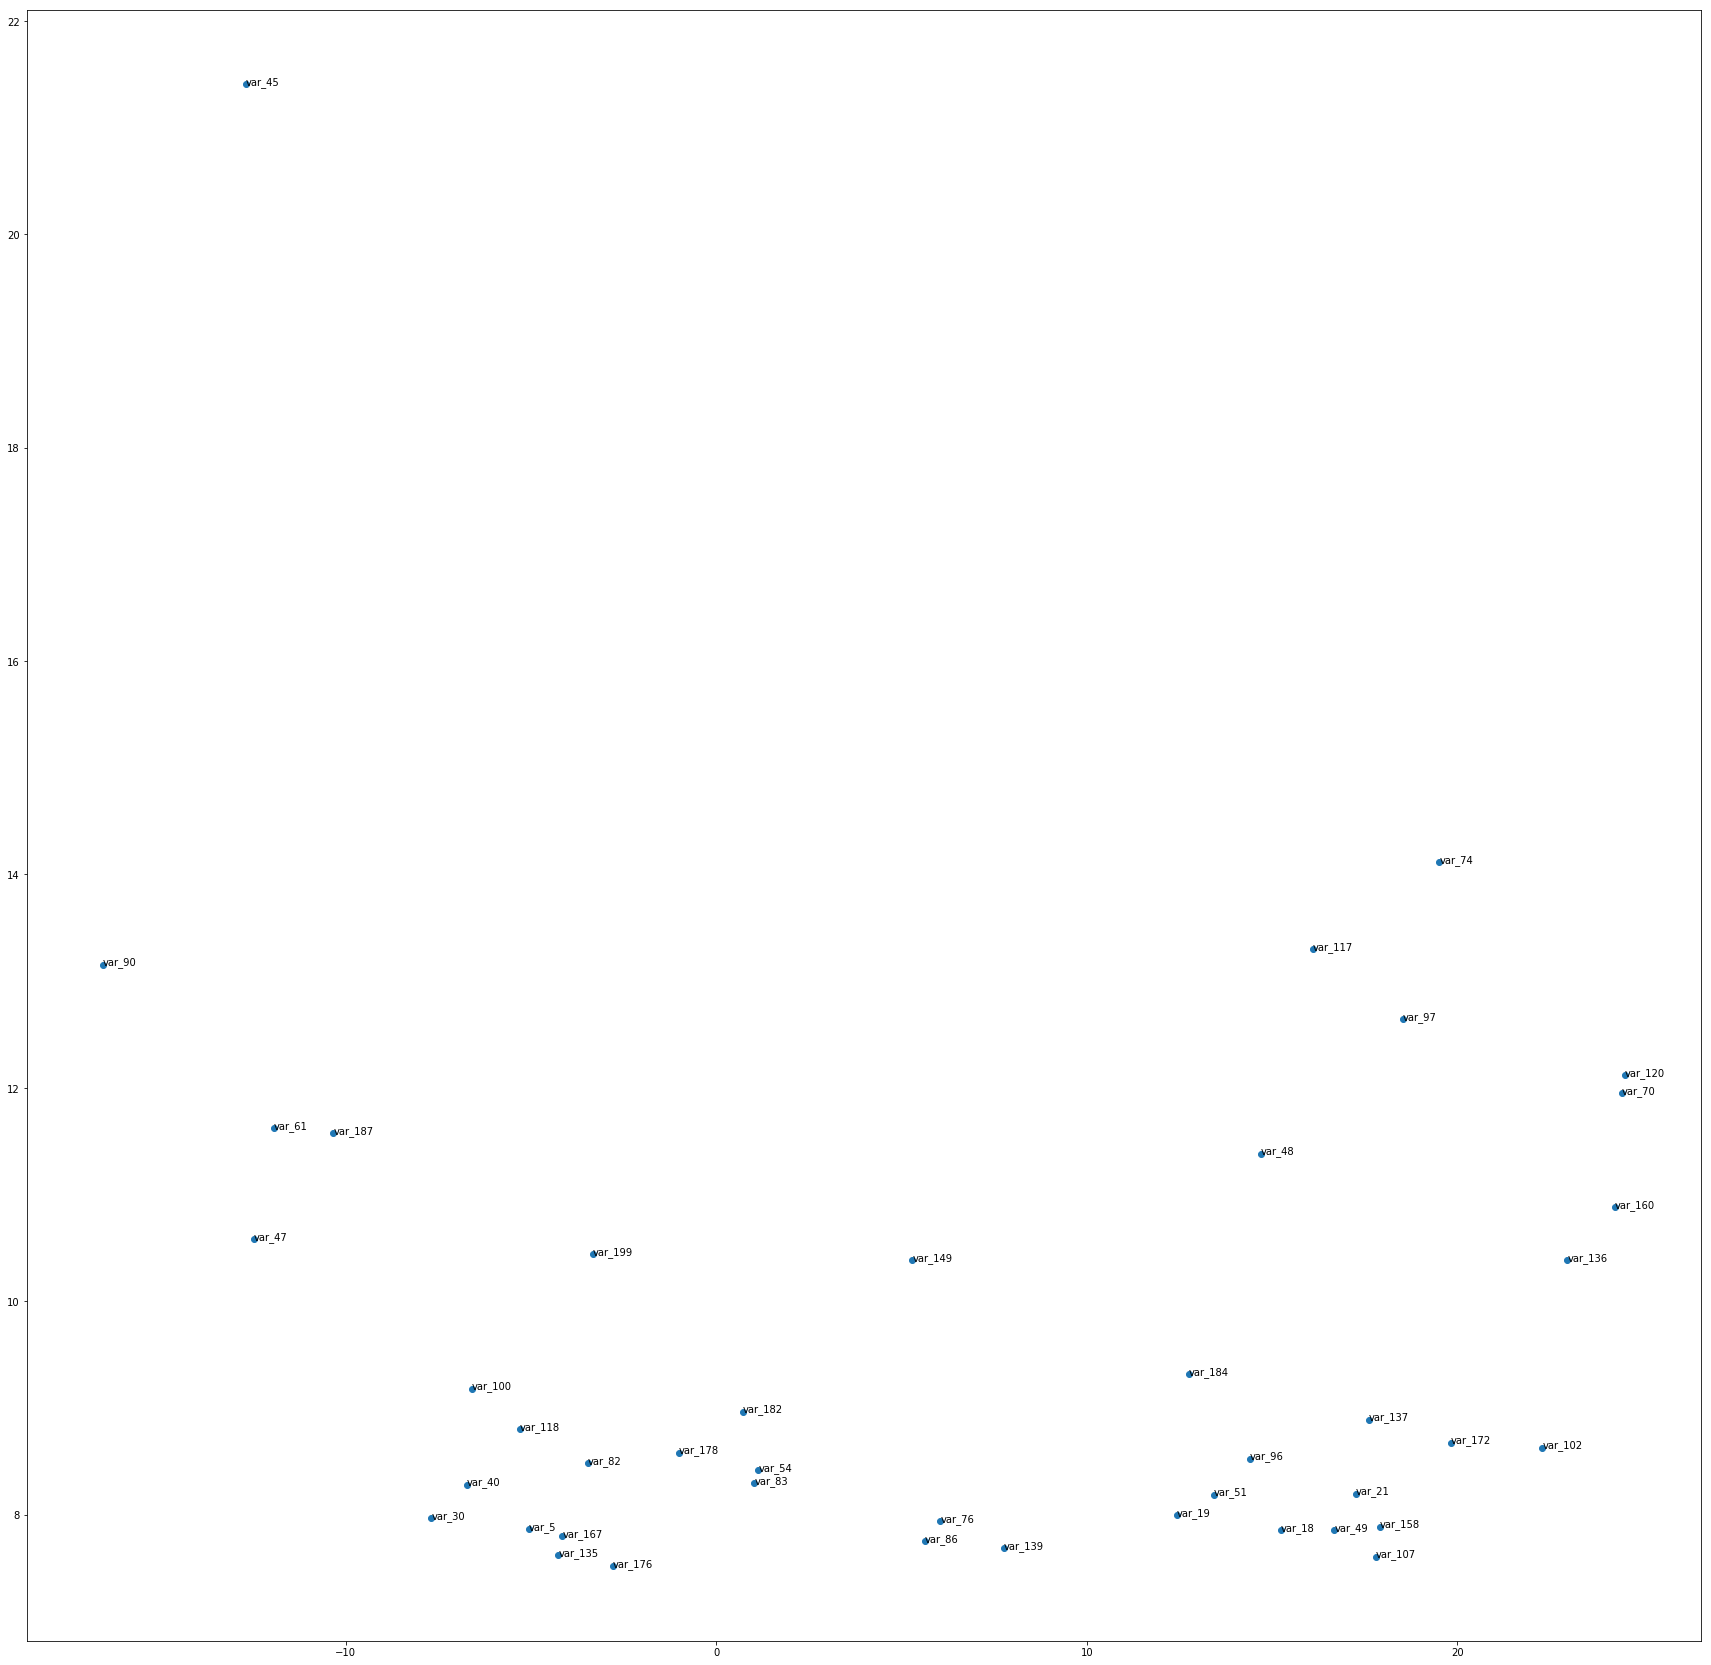

In [13]:
descr = train[data_cols].describe().transpose()
descr  =descr[descr['std'] > 7.5]
x = descr['mean']
y = descr['std']
n = list( descr.index)
fig, ax = plt.subplots(figsize=(30,30))

ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))


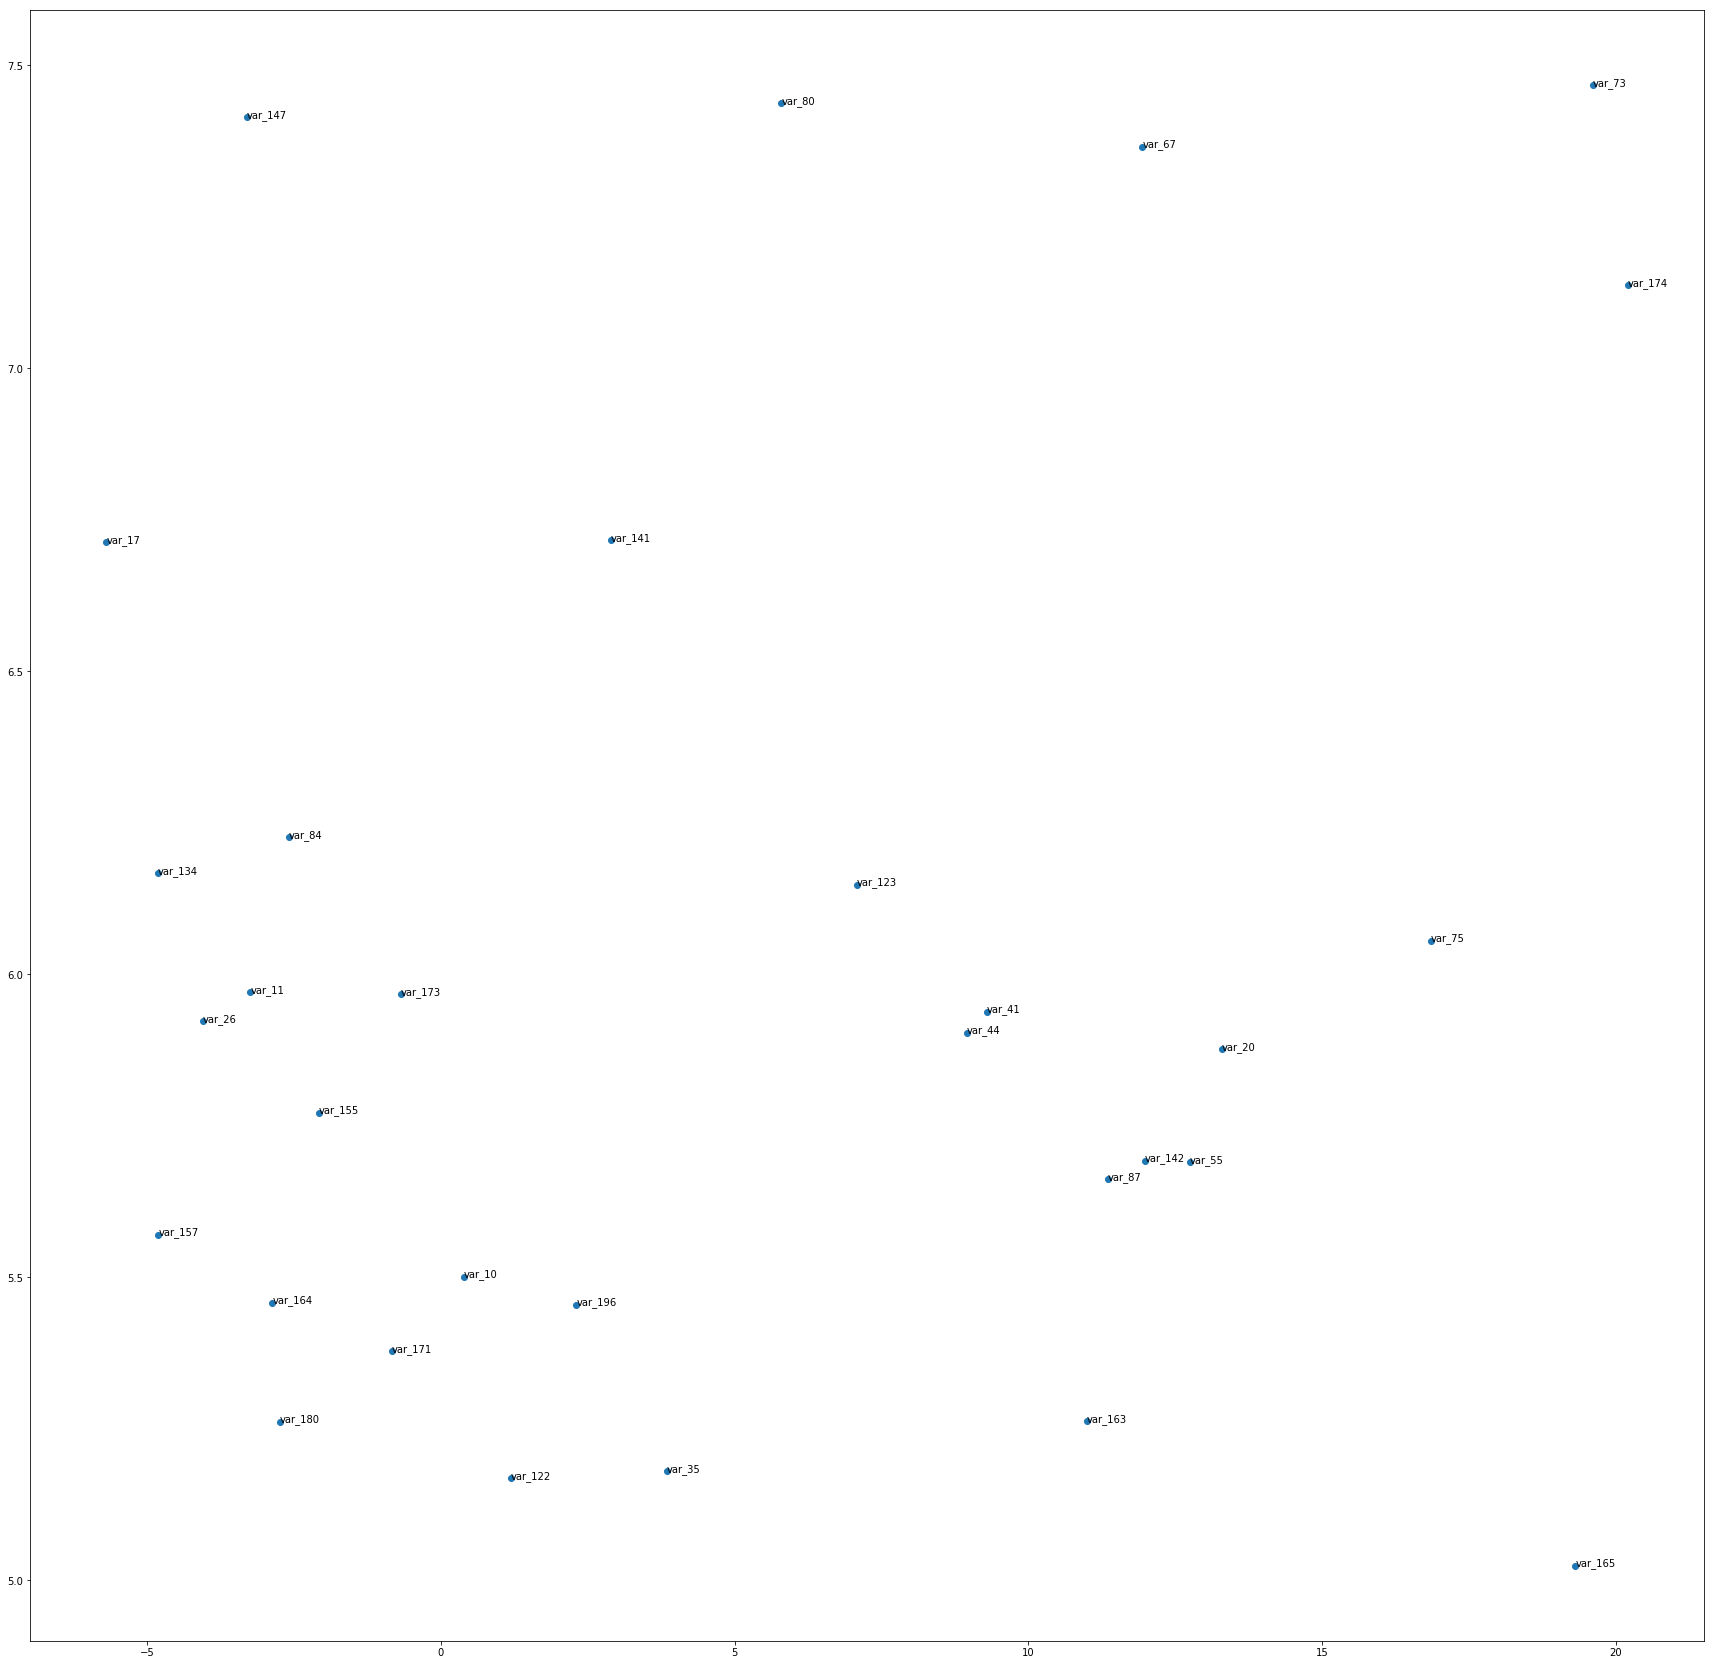

In [14]:
descr = train[data_cols].describe().transpose()
descr  =descr[(descr['std'] < 7.5) & (descr['std'] > 5)]
x = descr['mean']
y = descr['std']
n = list( descr.index)
fig, ax = plt.subplots(figsize=(30,30))

ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

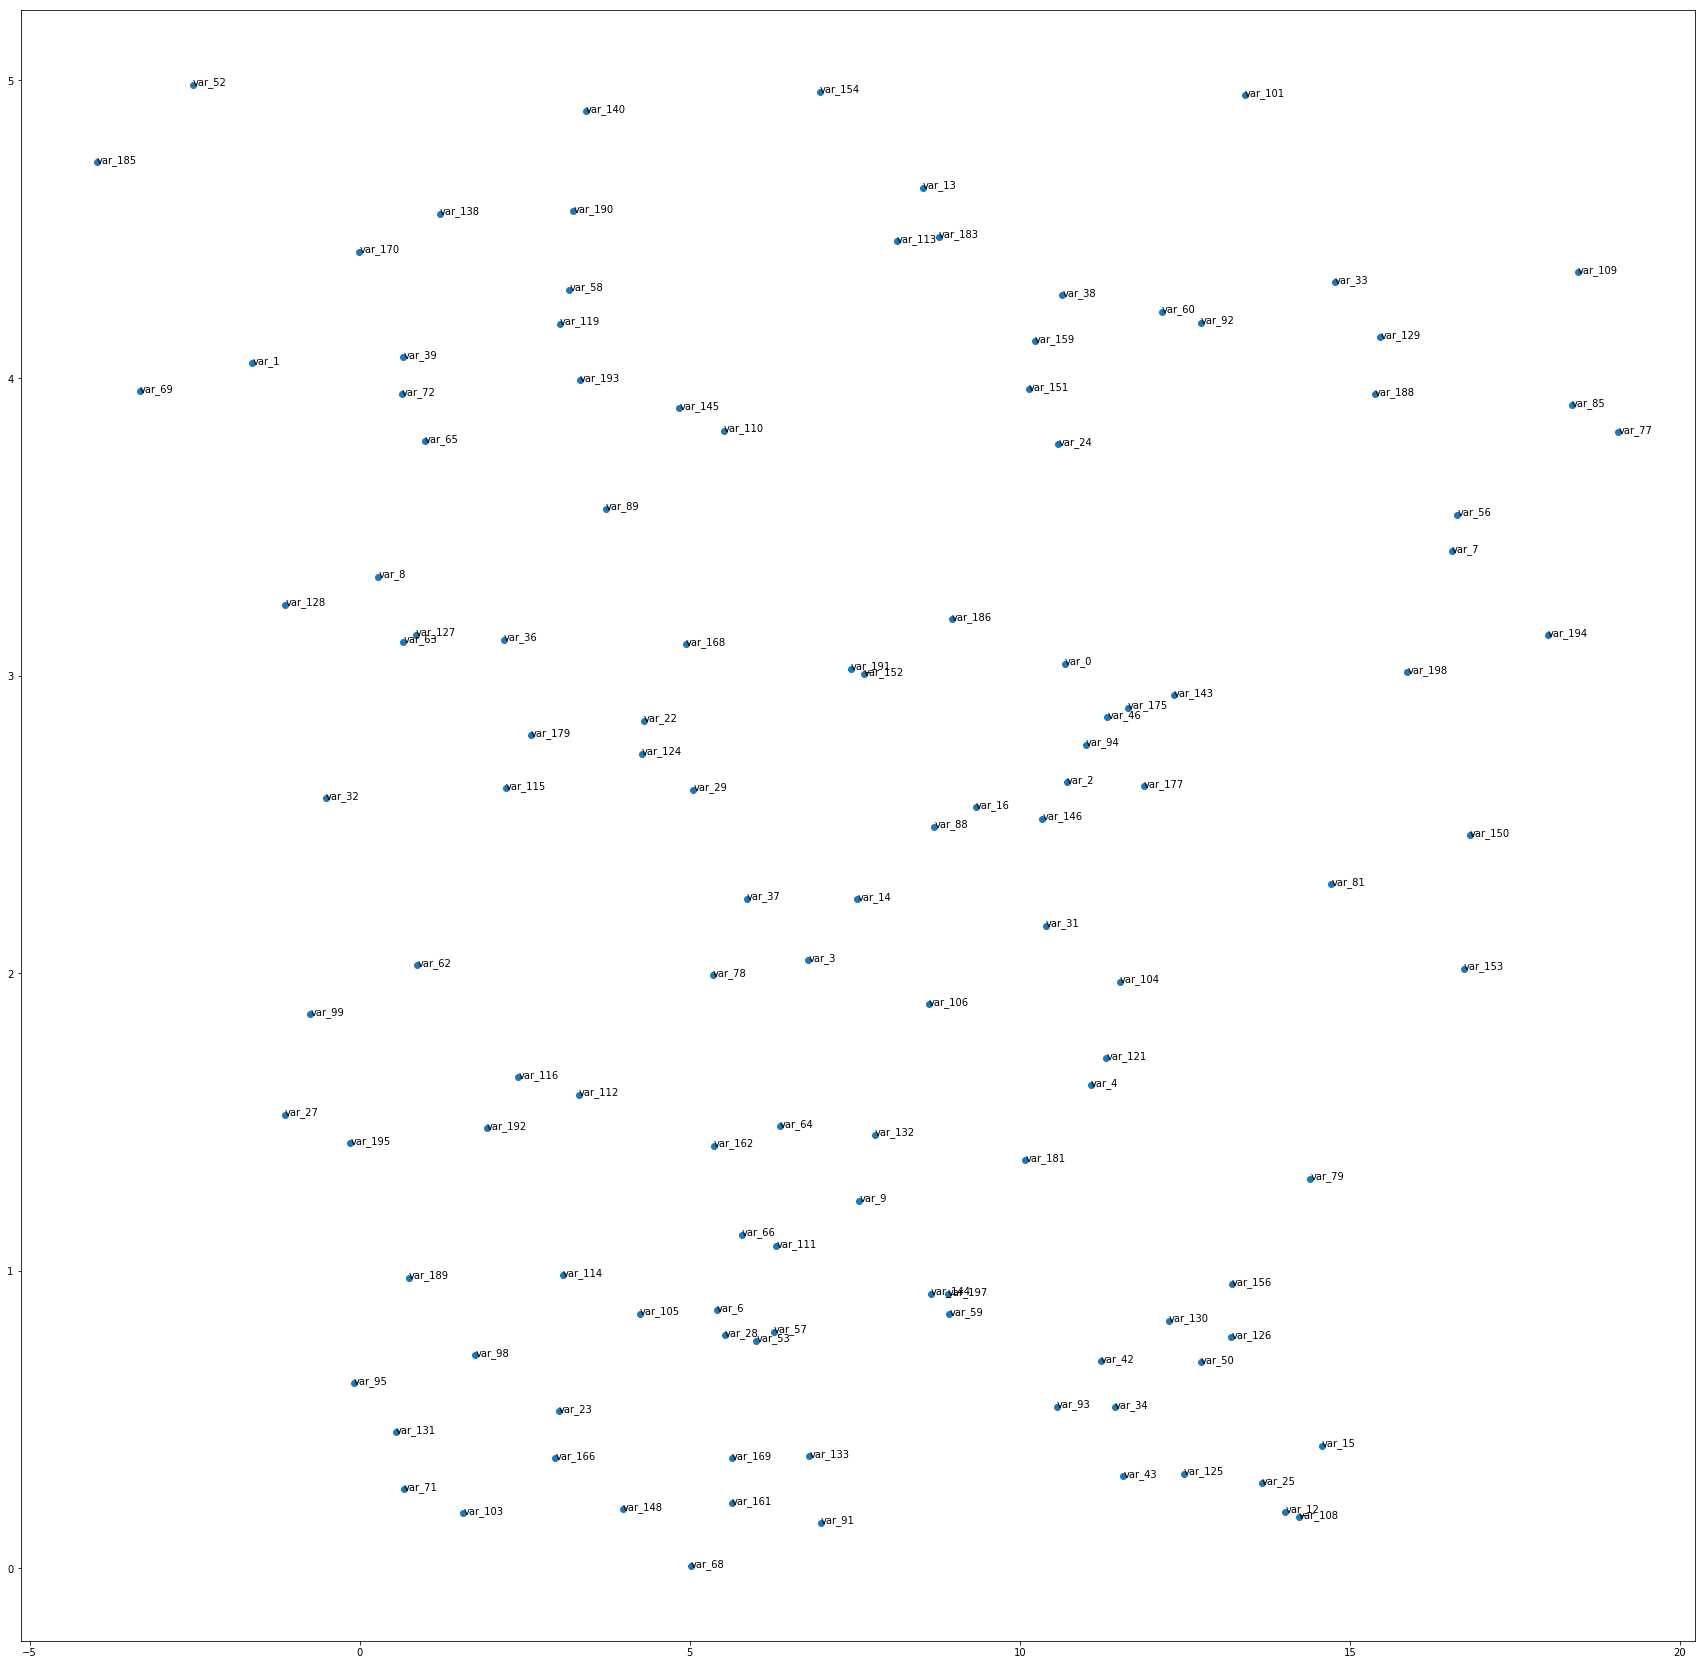

In [15]:
descr = train[data_cols].describe().transpose()
descr  =descr[descr['std'] < 5]
x = descr['mean']
y = descr['std']
n = list( descr.index)
fig, ax = plt.subplots(figsize=(30,30))

ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

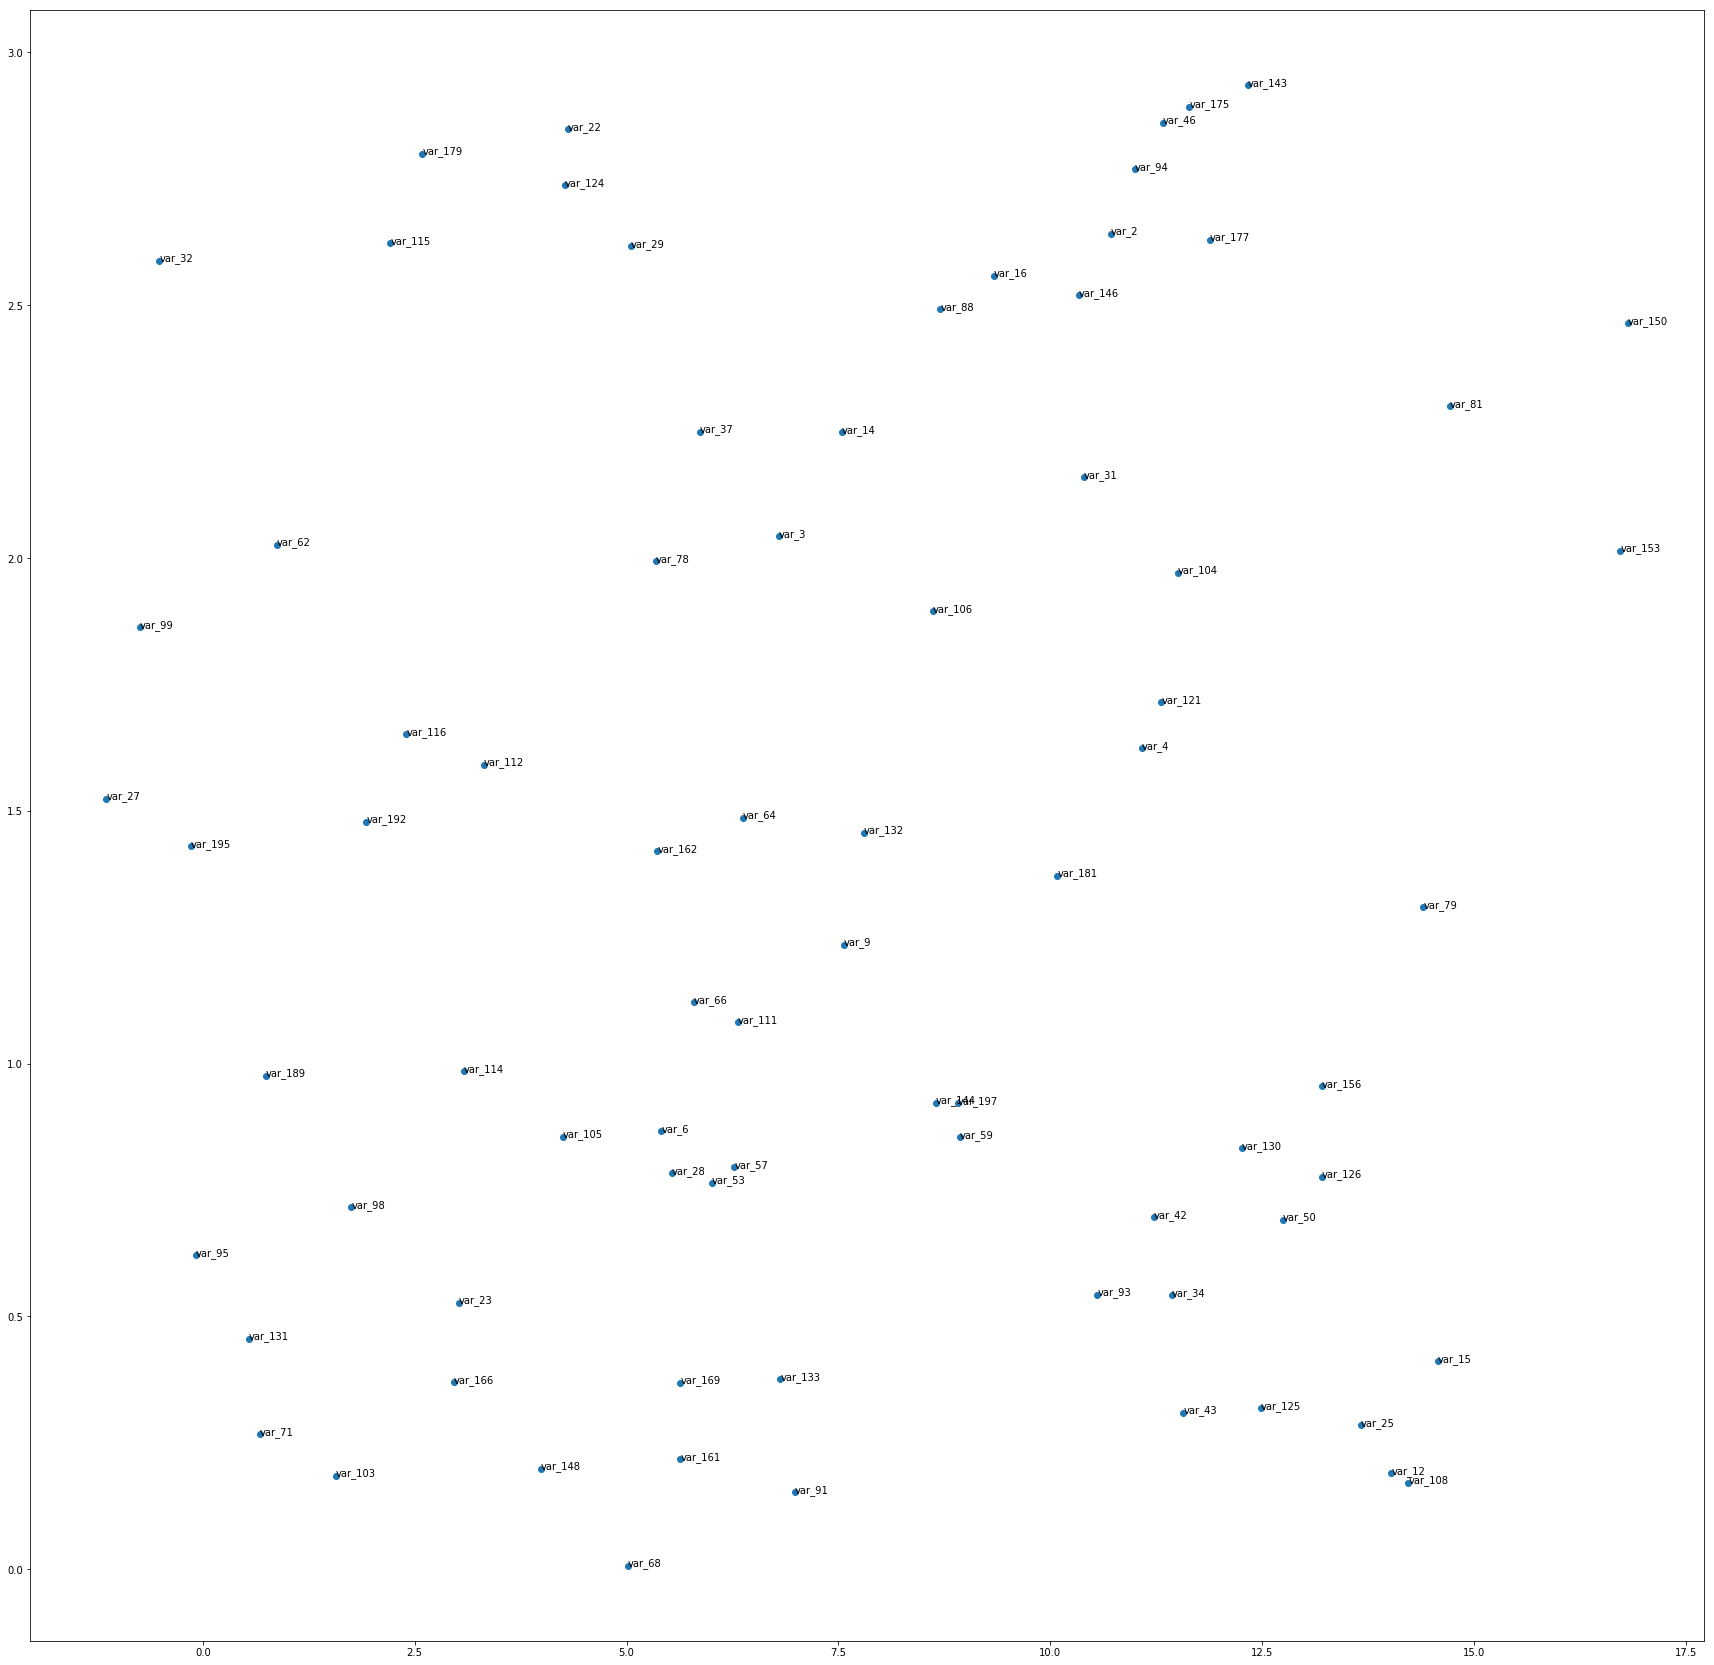

In [16]:
descr = train[data_cols].describe().transpose()
descr  =descr[descr['std'] < 3]
x = descr['mean']
y = descr['std']
n = list( descr.index)
fig, ax = plt.subplots(figsize=(30,30))

ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

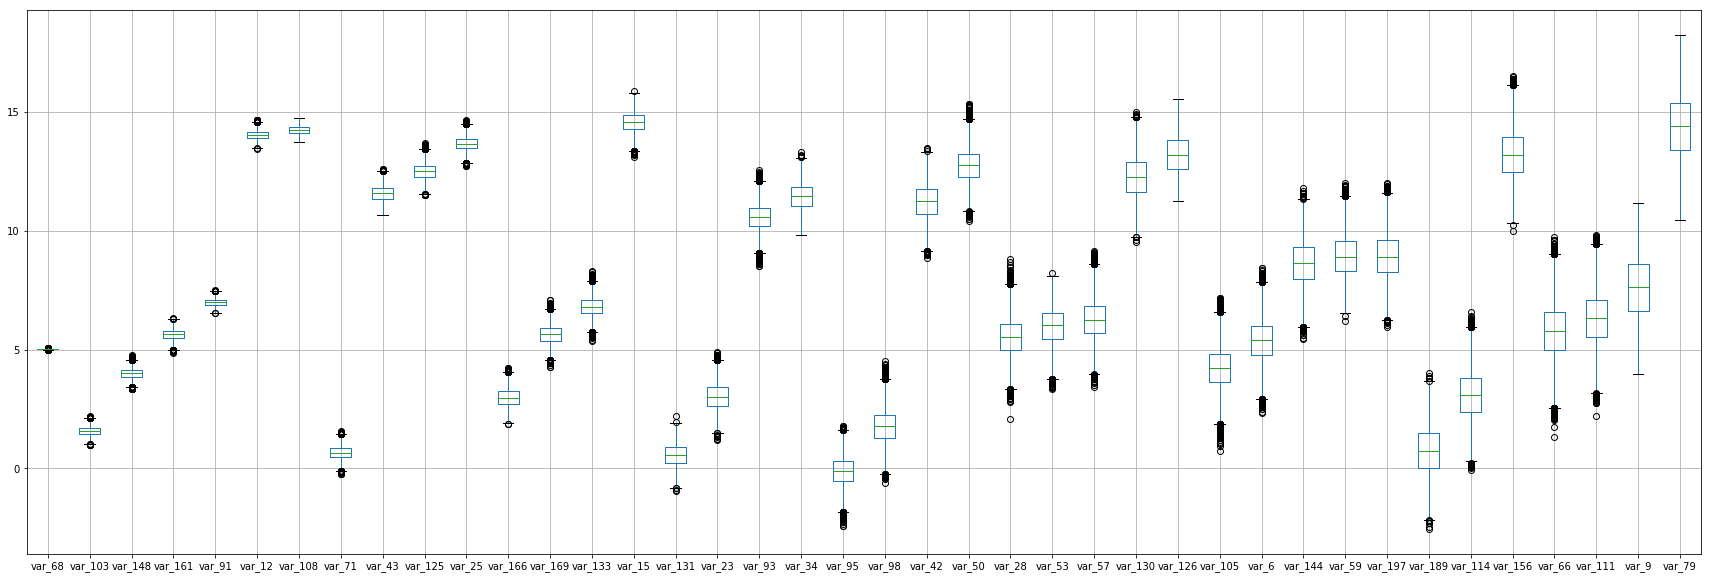

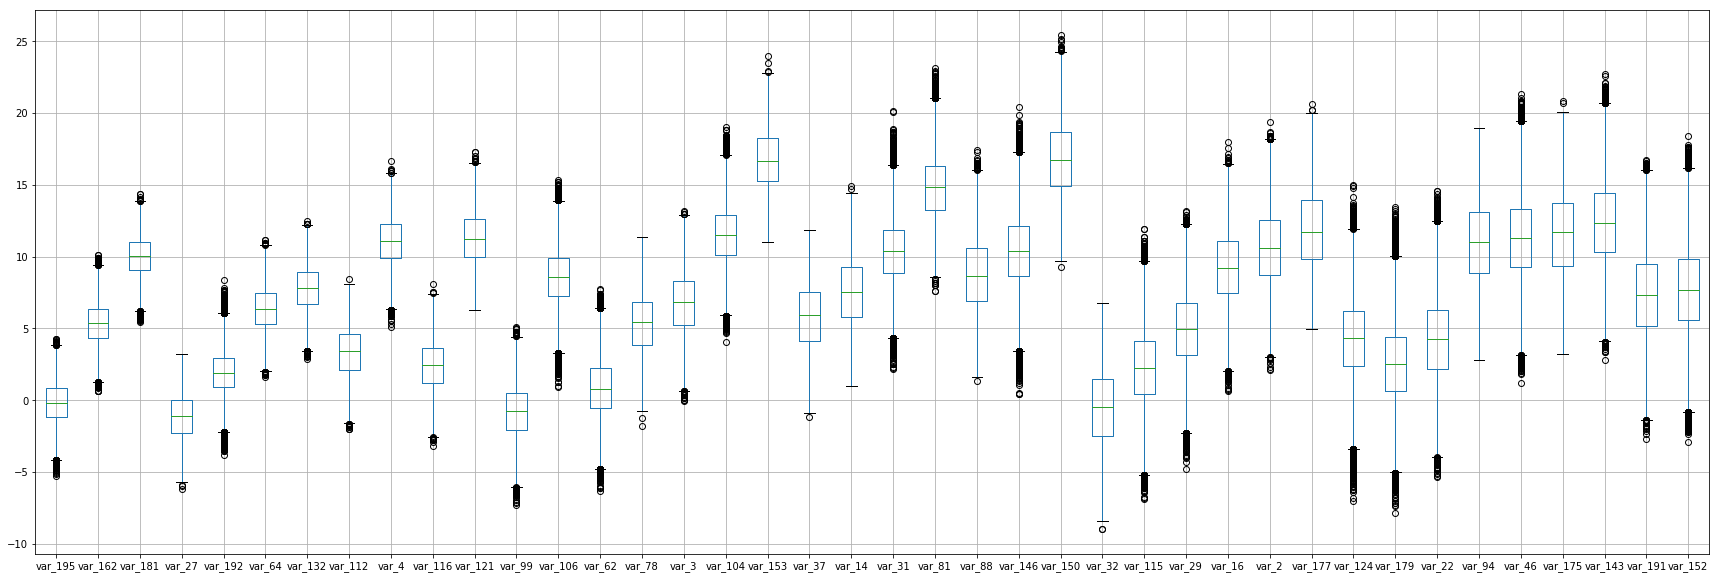

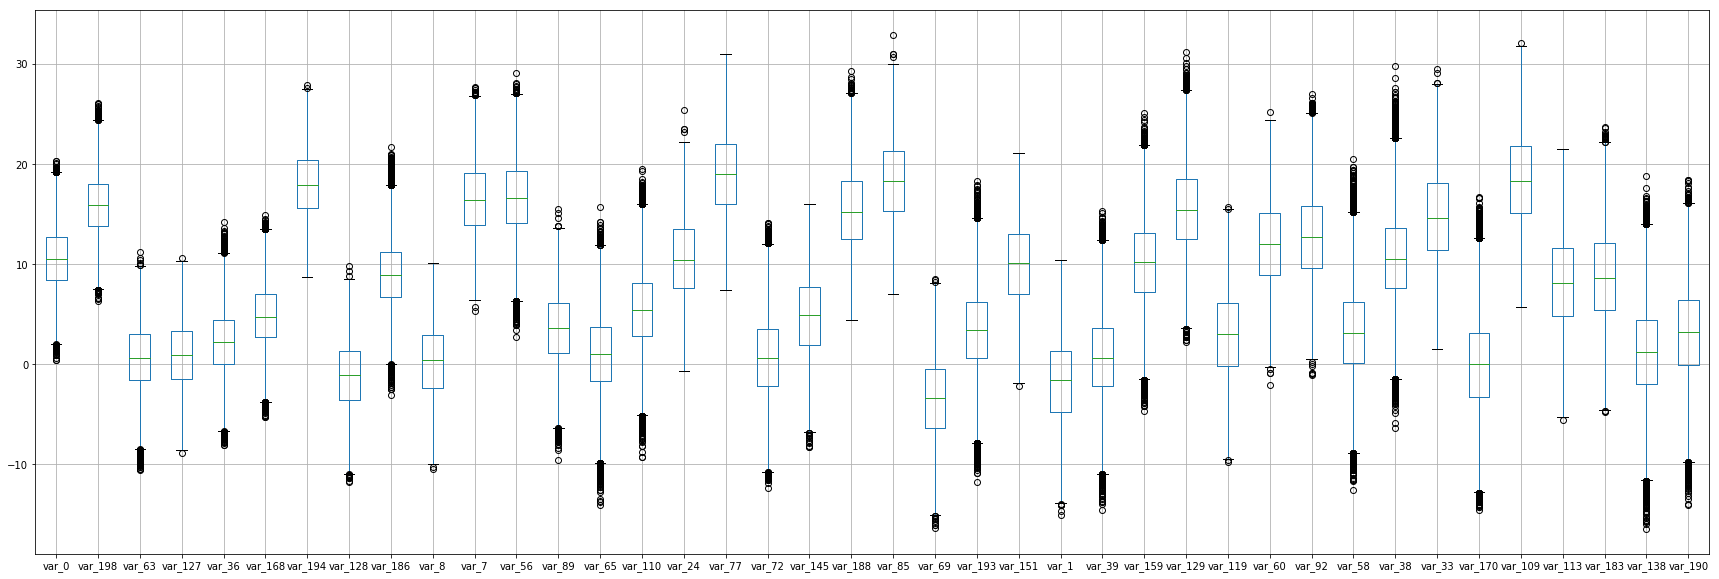

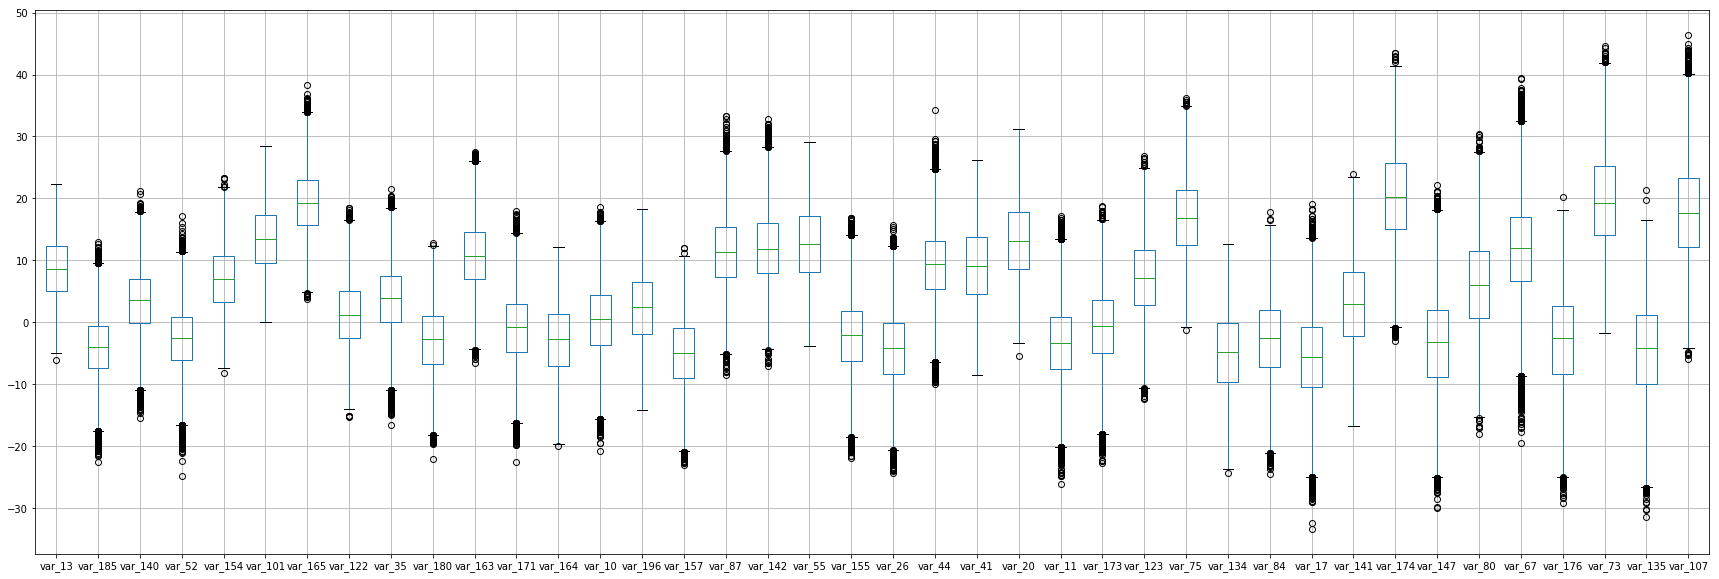

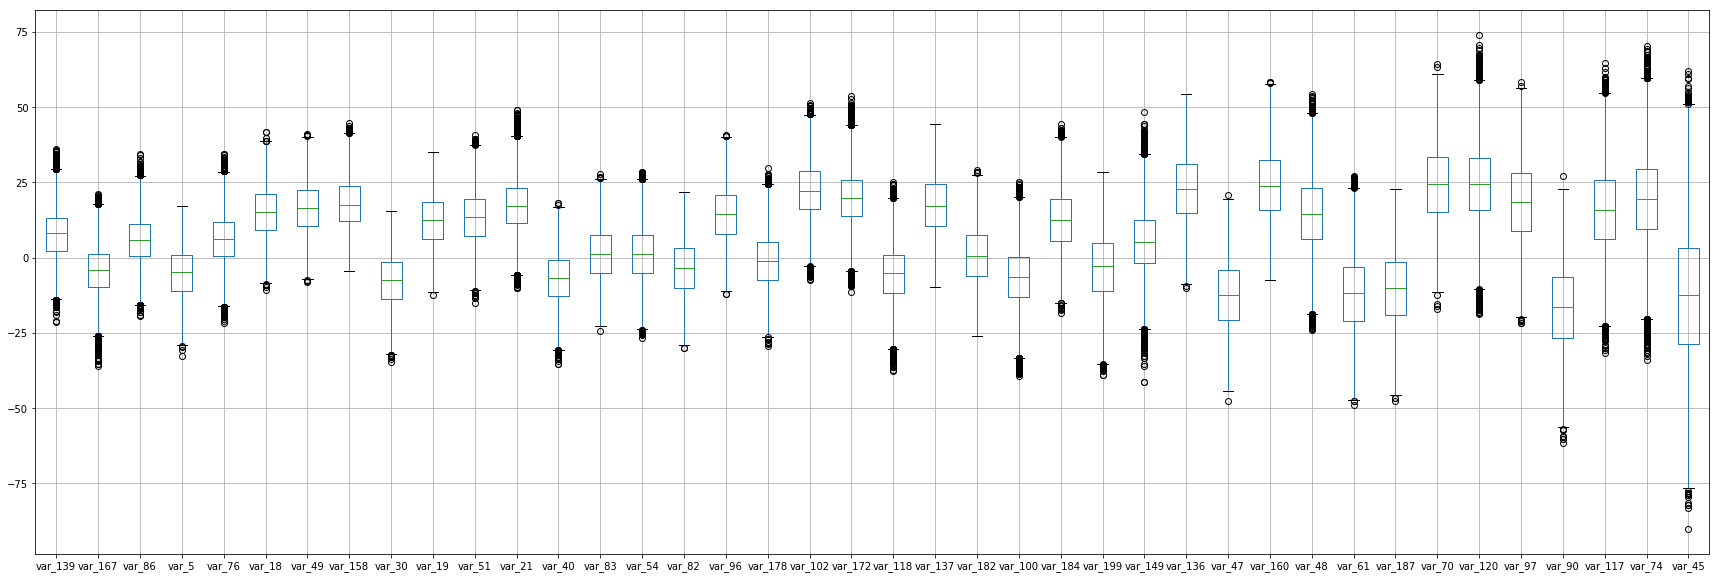

In [17]:
descr = train[data_cols].describe().transpose()

#sort1 
descr['meanround2'] = descr['mean'].round(1)
descr['stdround2'] = descr['std'].round(1)
descr = descr.sort_values(['stdround2', 'meanround2',])
sorted_cols = list( descr.index )    
    
for i in range(5):
    plt.figure(figsize = (30,10))
    train[sorted_cols[i * 40:(i+1) *40]].boxplot(figsize = (30,10))




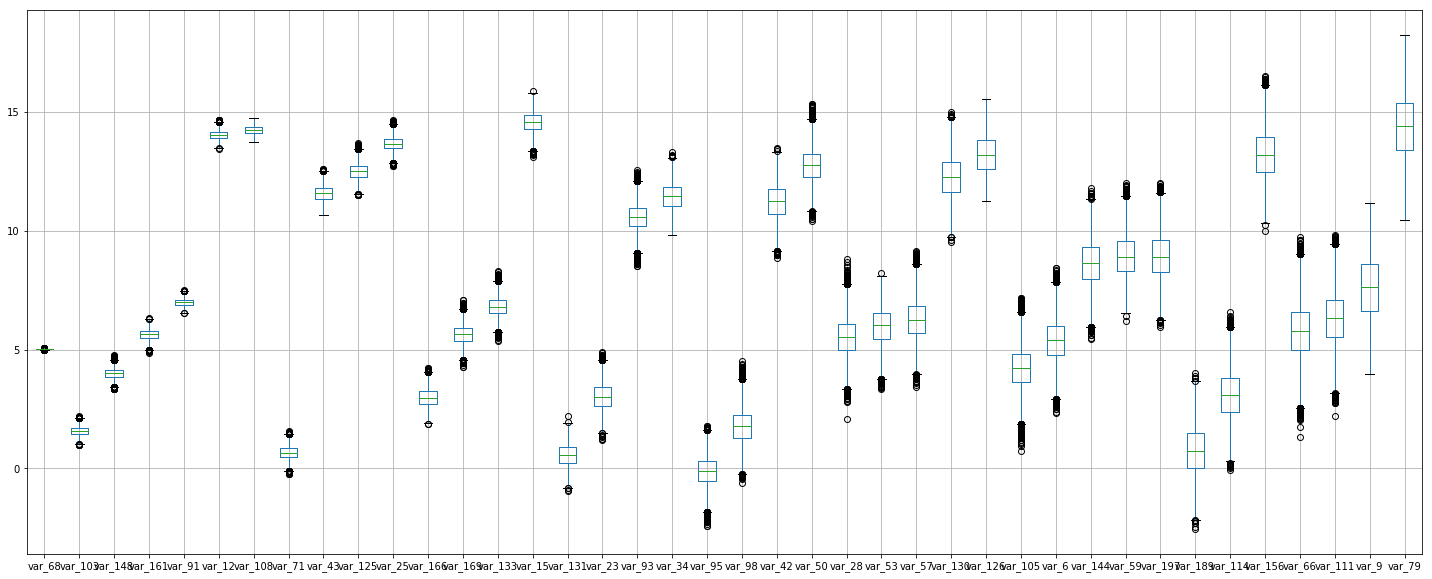

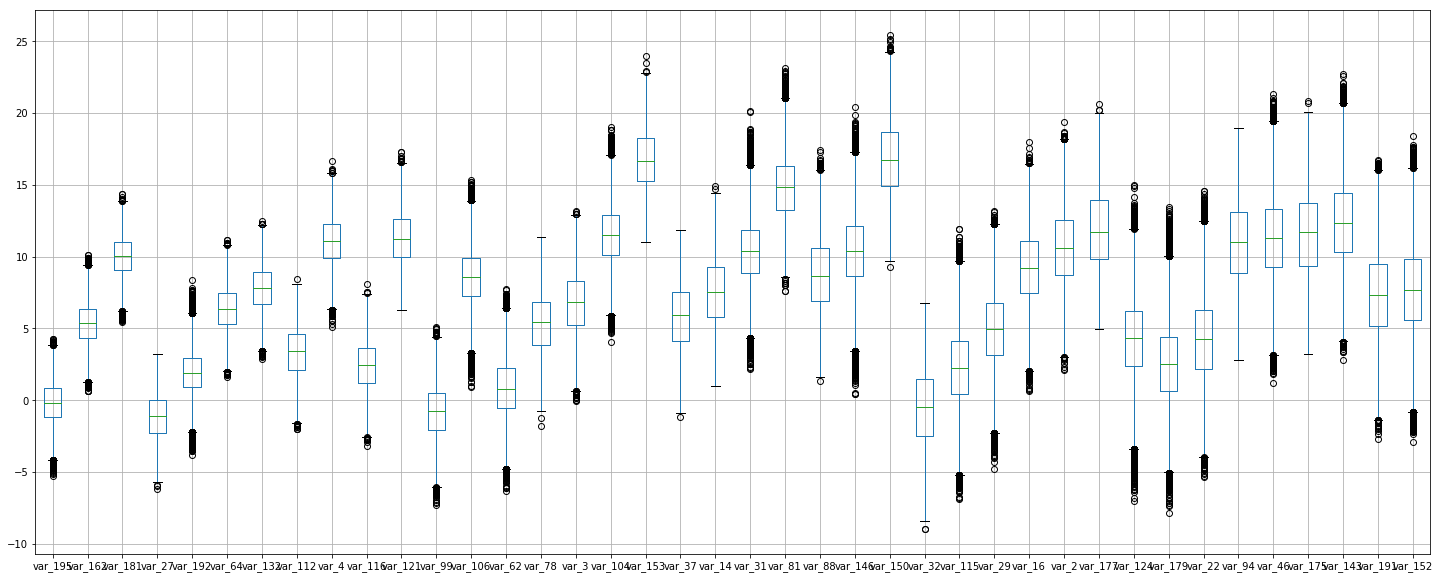

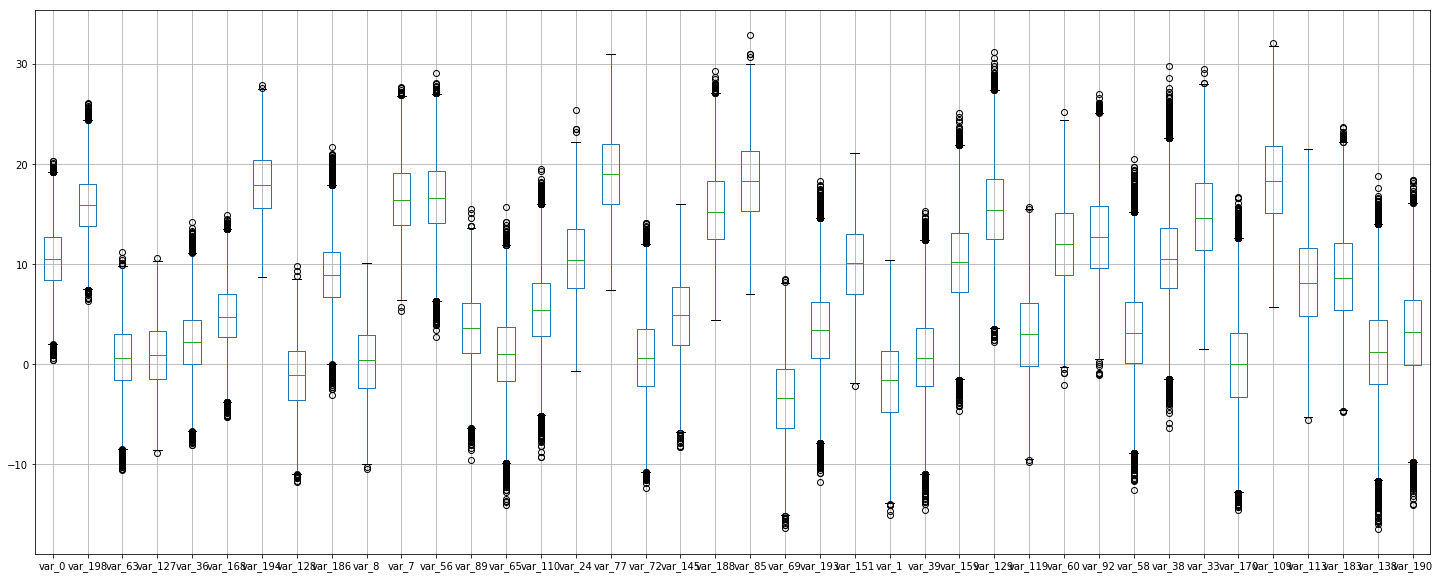

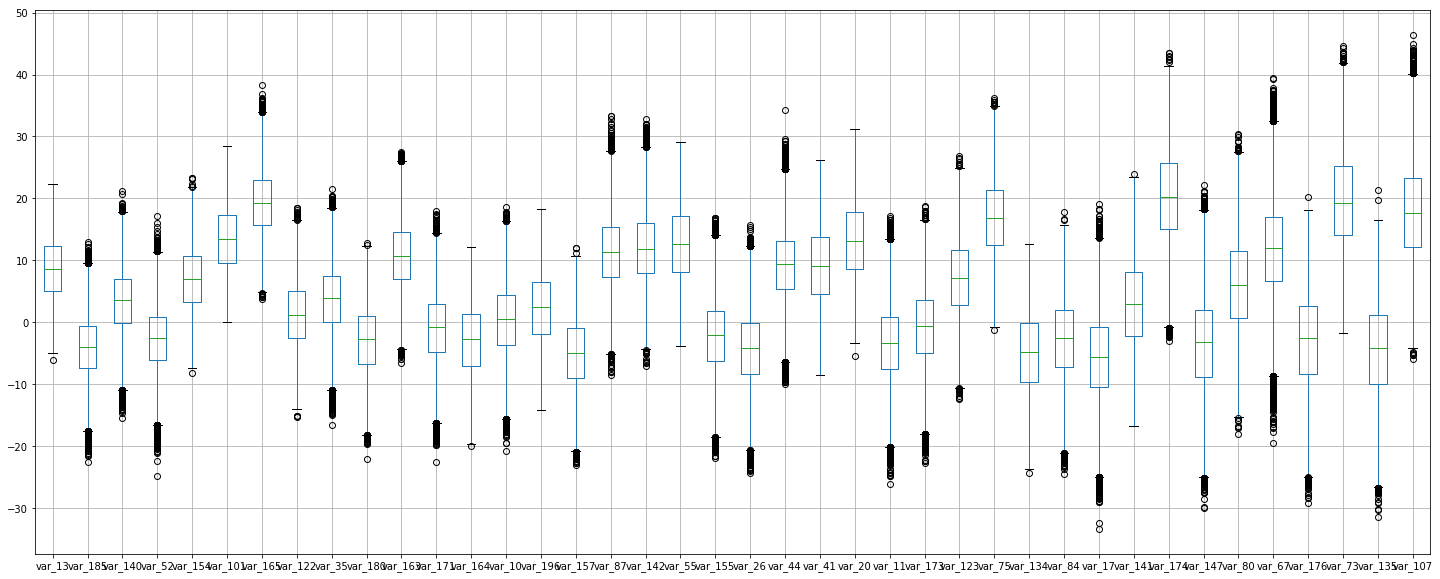

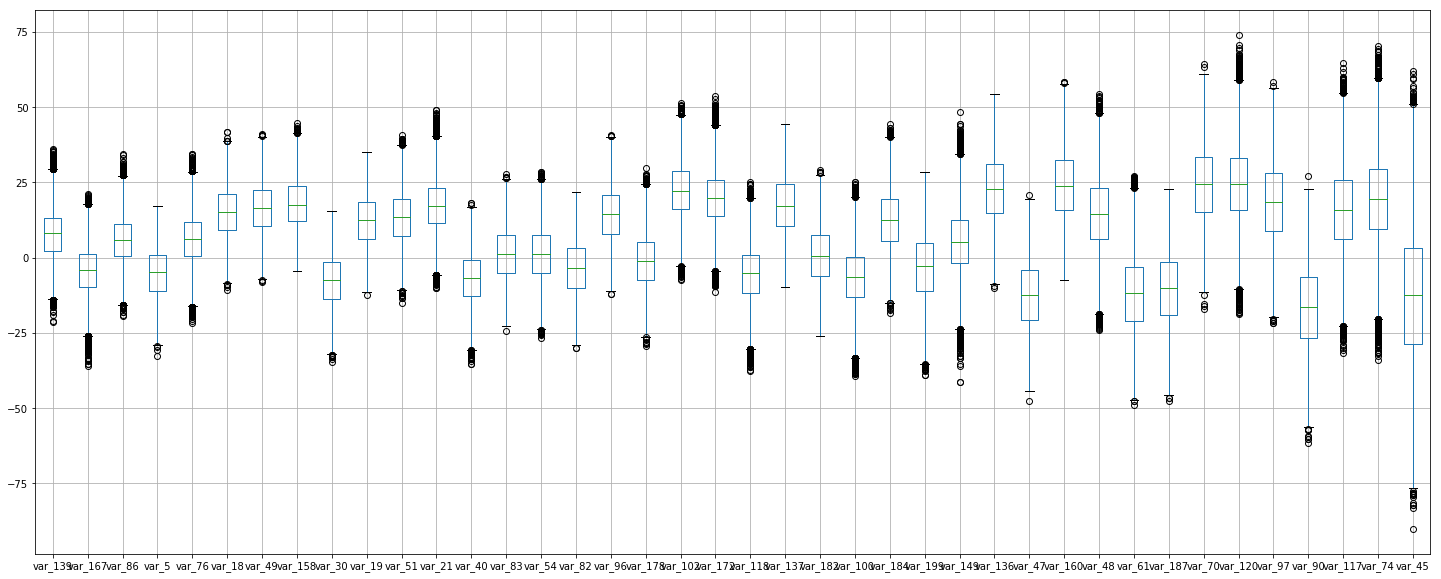

In [18]:
#sort2
descr['mean_std'] = descr['mean'] + descr['std']
descr = descr.sort_values(['stdround2', 'mean_std'])
sorted_cols = list( descr.index )    
for i in range(5):
    plt.figure(figsize = (25,10))
    train[sorted_cols[i * 40:(i+1) *40]].boxplot(figsize = (25,10))


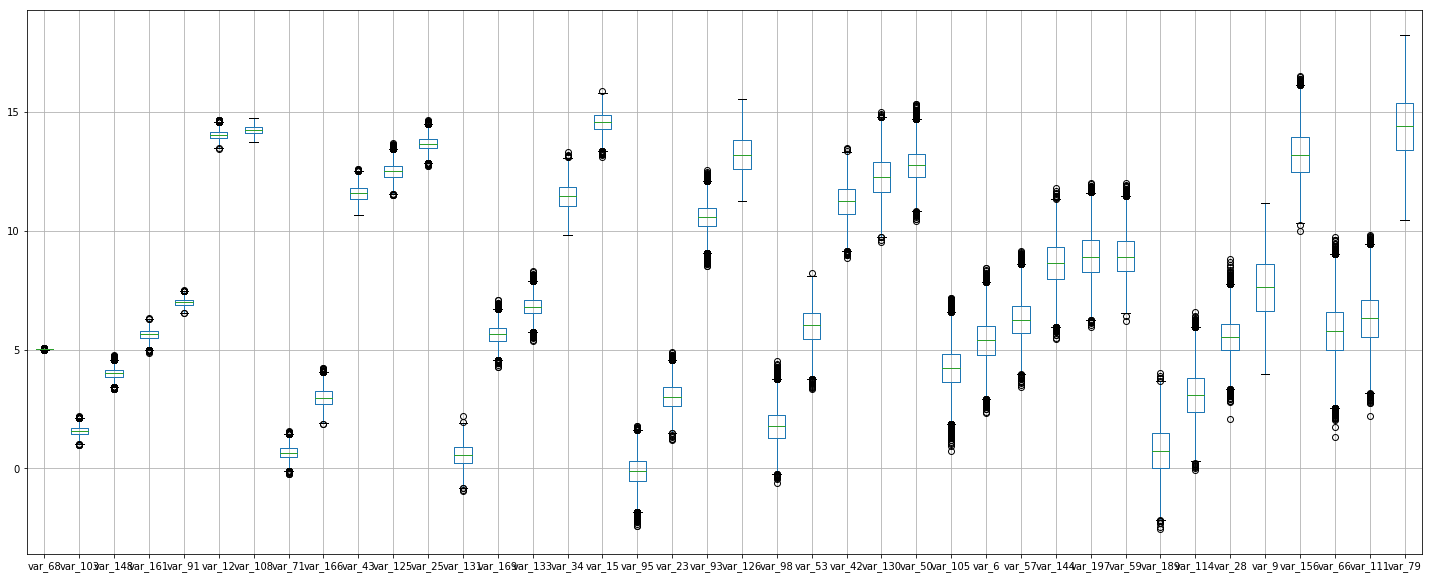

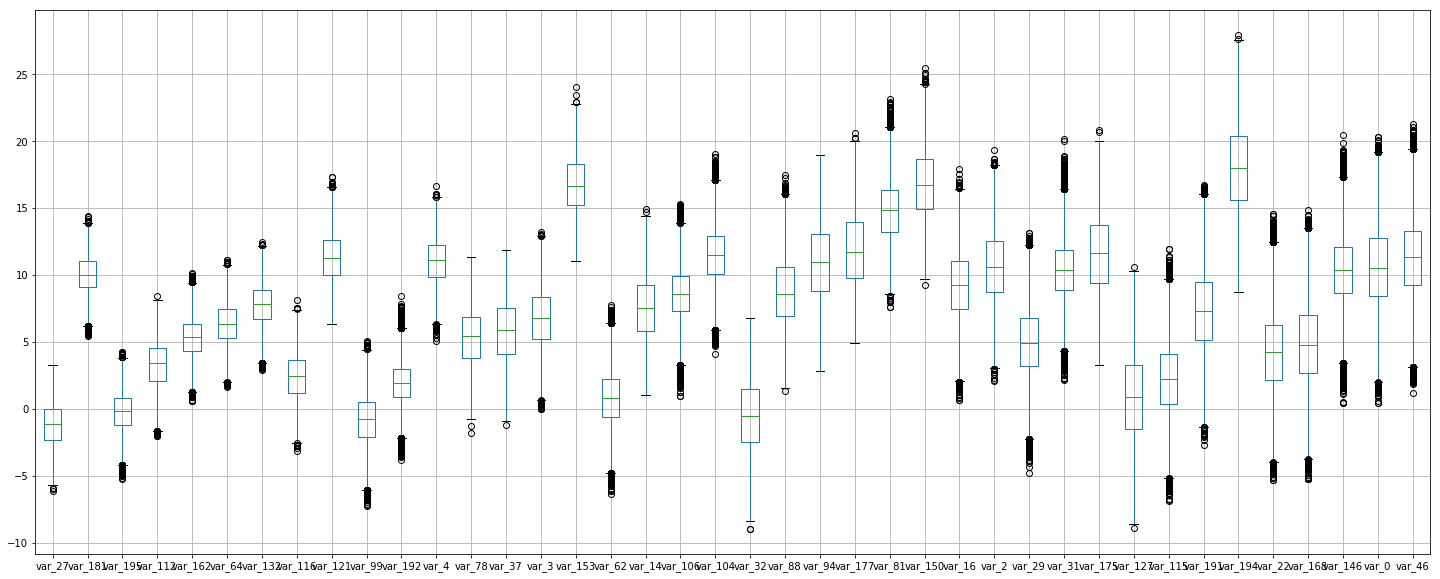

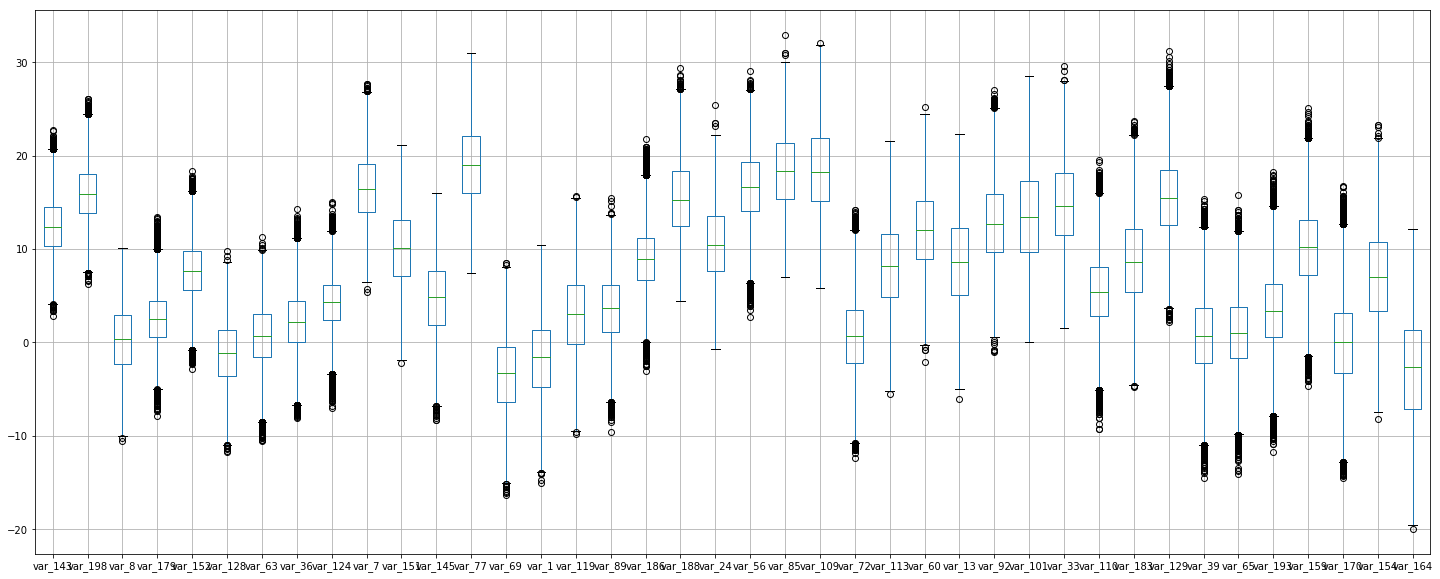

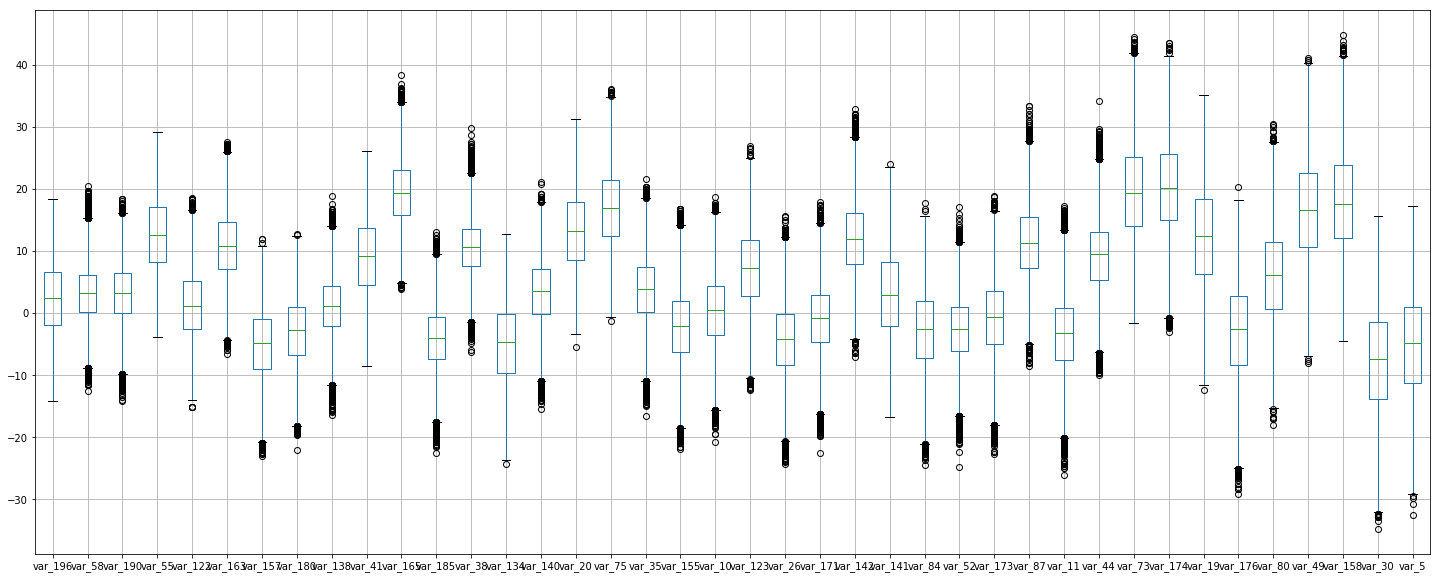

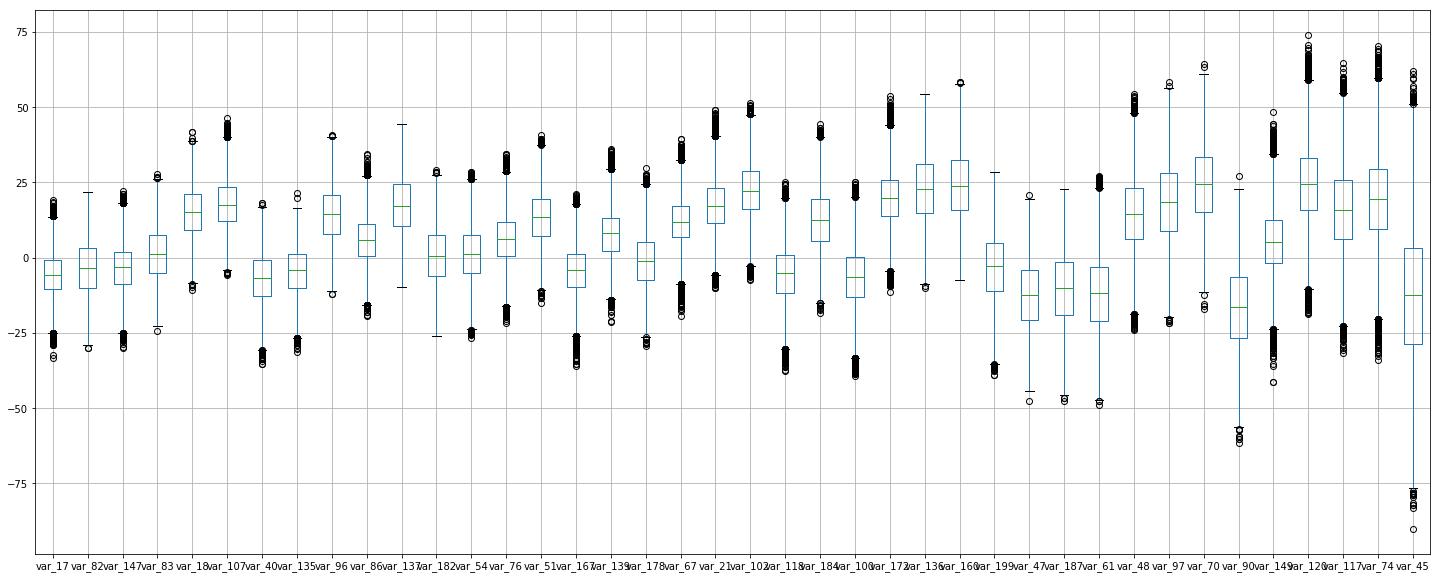

In [19]:
#sort3 
descr['range'] = descr['max'] - descr['min']
descr['range'] = descr['range'].round(0)
descr = descr.sort_values(['range', 'mean'])
sorted_cols = list( descr.index )    
for i in range(5):
    plt.figure(figsize = (25,10))
    train[sorted_cols[i * 40:(i+1) *40]].boxplot(figsize = (25,10))

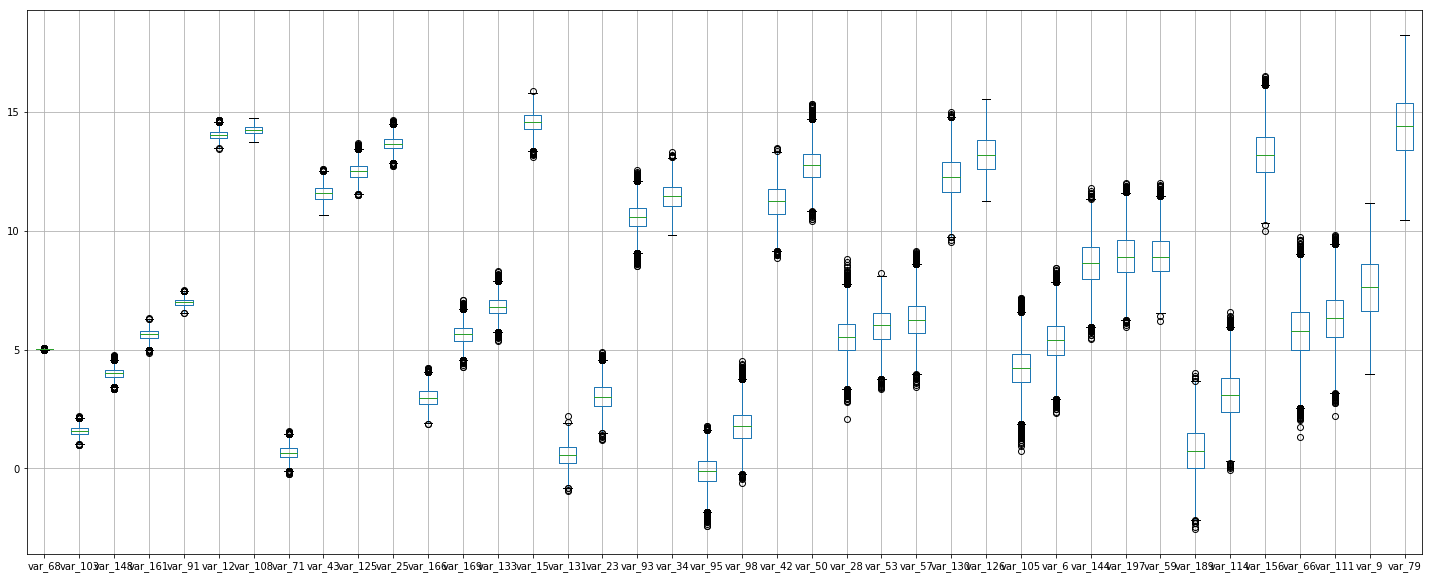

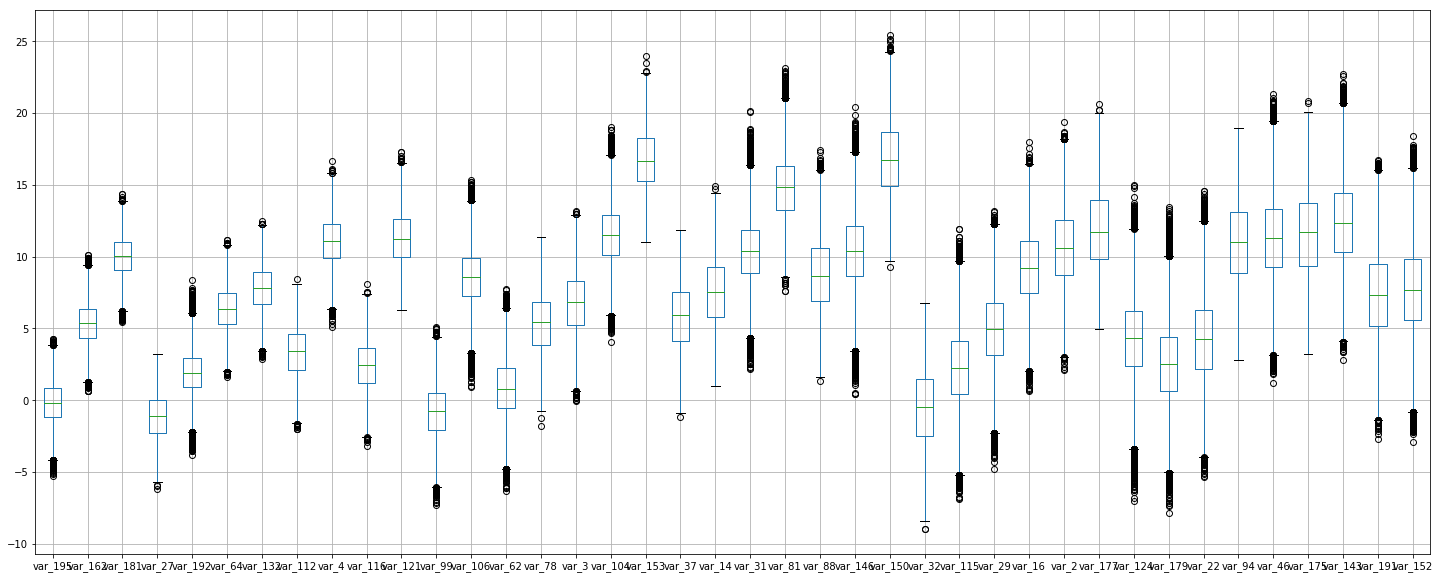

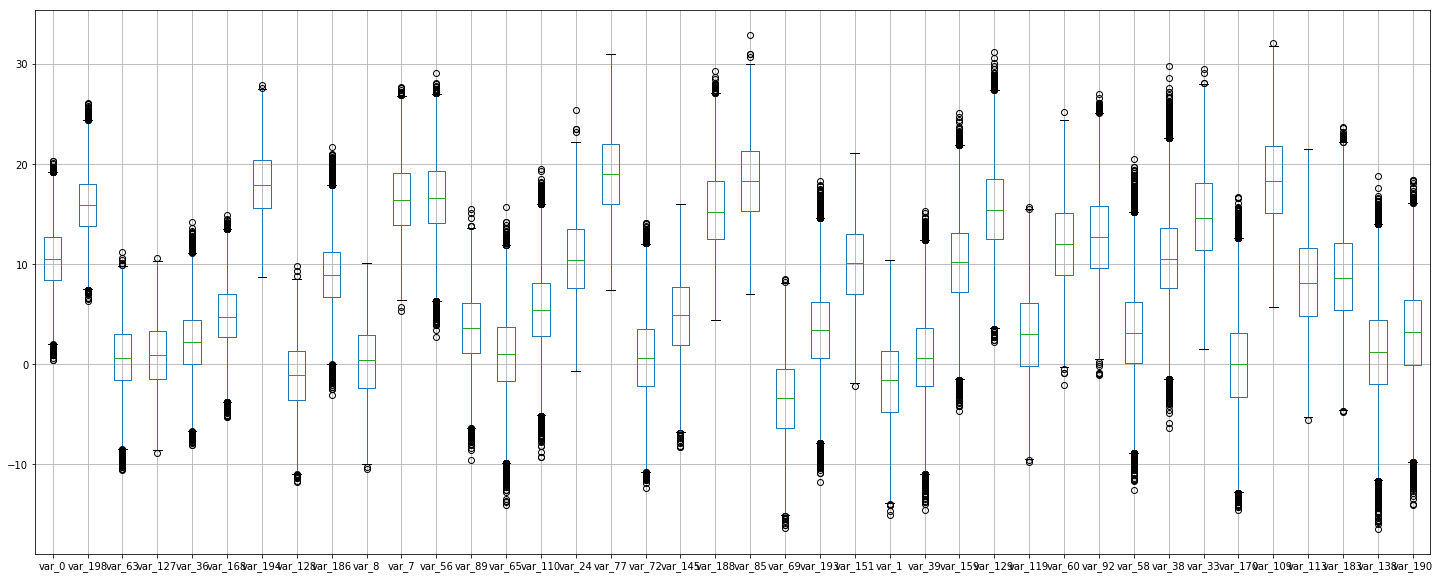

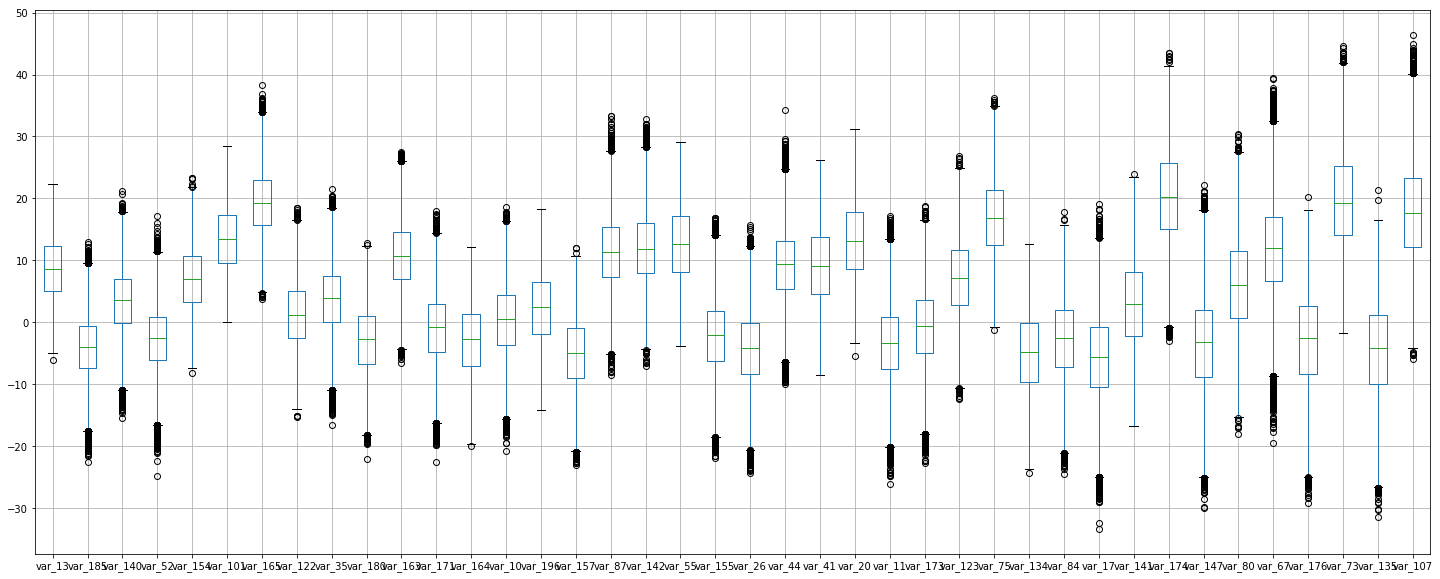

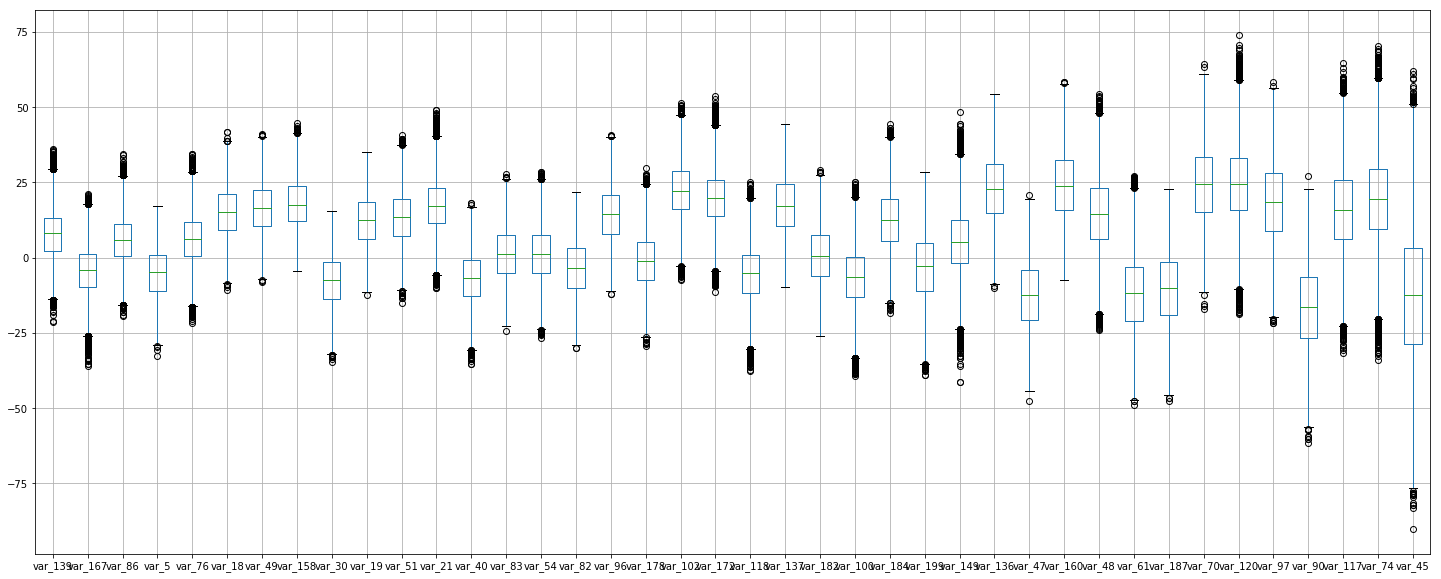

In [20]:
#sort4 
descr['meanround2'] = descr['mean'].round(1)
descr['stdround2'] = descr['std'].round(1)
descr = descr.sort_values(['stdround2', 'meanround2'])
# descr = descr.sort_values(['meanround2', 'stdround2'])
sorted_cols = list( descr.index )     
for i in range(5):
    plt.figure(figsize = (25,10))
    train[sorted_cols[i * 40:(i+1) *40]].boxplot(figsize = (25,10))

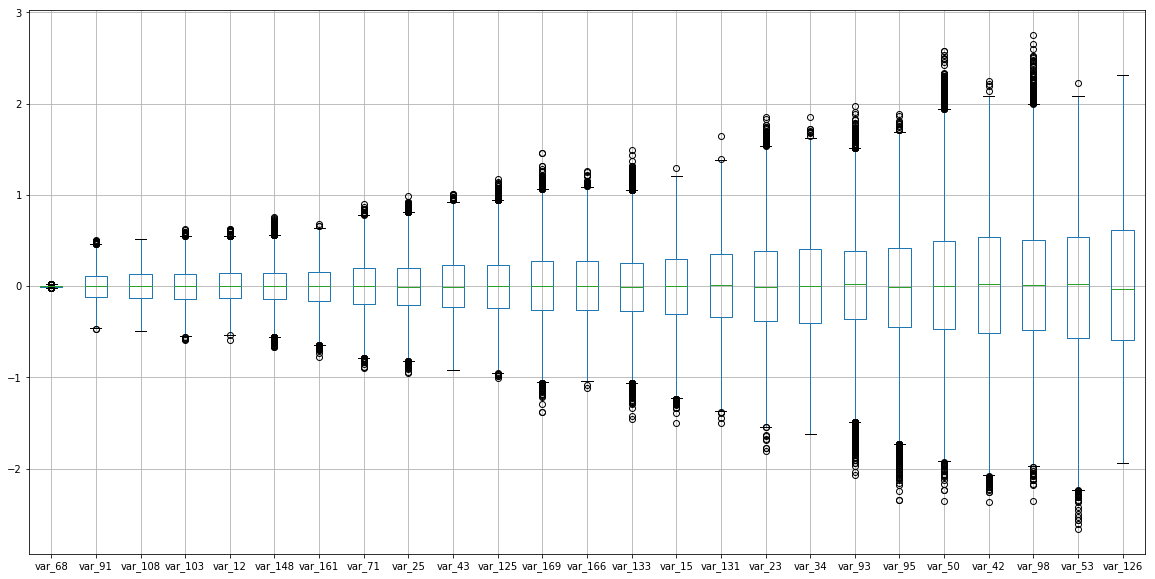

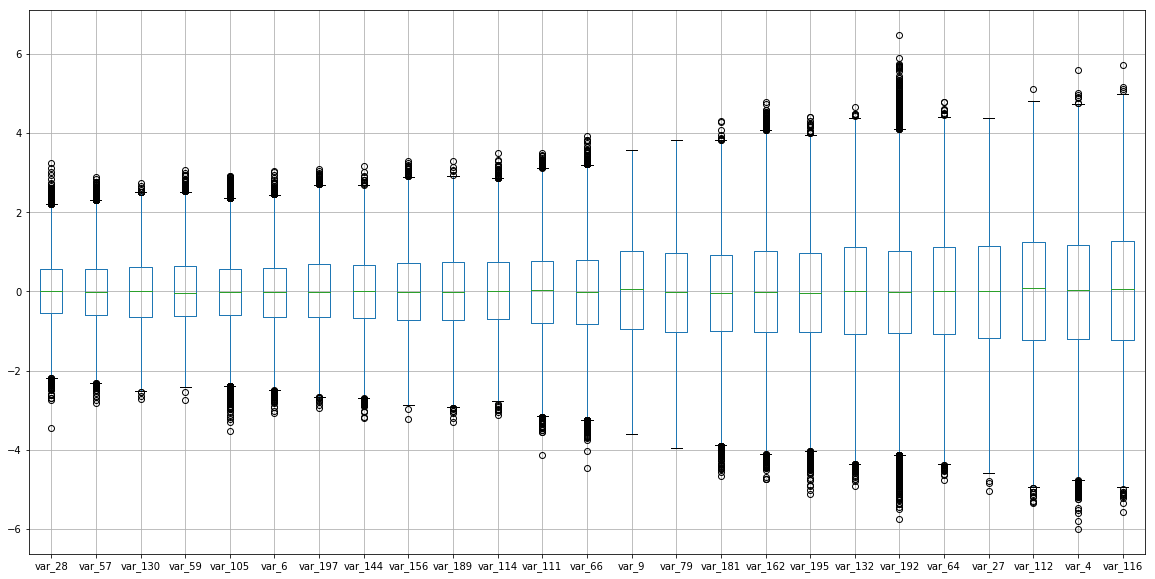

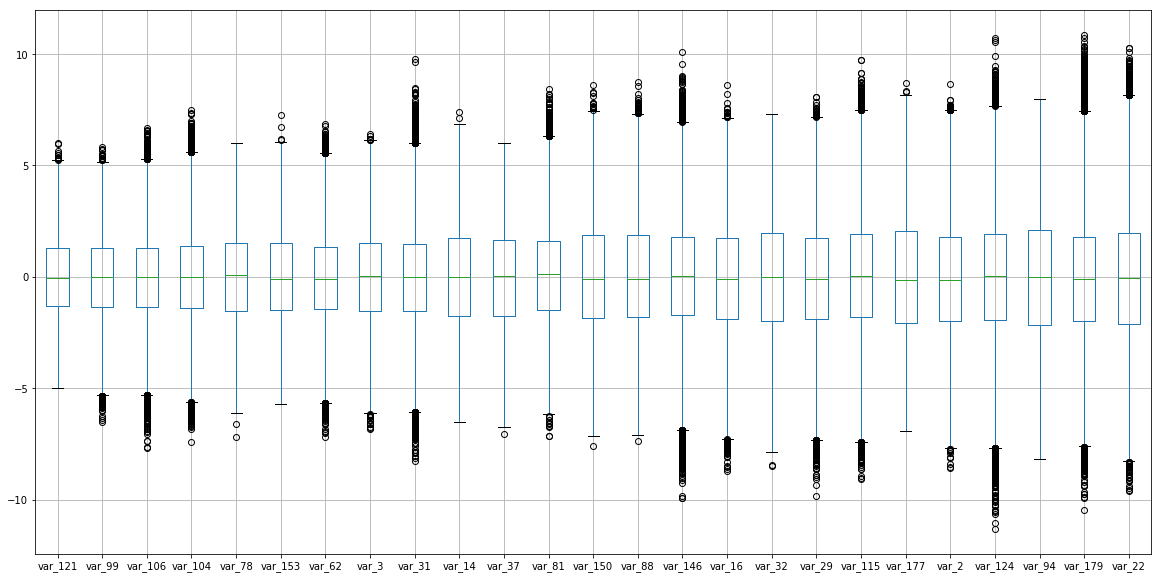

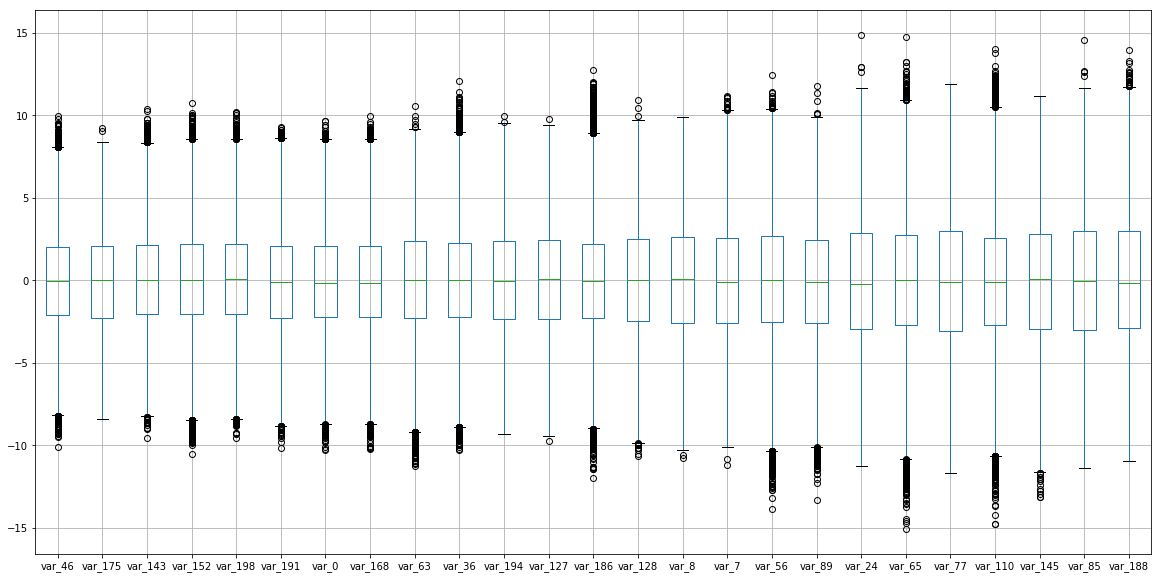

In [21]:
# what if data was only shifted by a value but retains deviations?
temptrain = train[data_cols] - train[data_cols].mean()
descr = temptrain[data_cols].describe().transpose()

#sort5
# descr['stdround2'] = descr['std'].round(1)
descr = descr.sort_values(['std'])
sorted_cols = list( descr.index )     
for i in range(4):
    plt.figure(figsize = (20,10))
    temptrain[sorted_cols[i * 25:(i+1) *25]].boxplot(figsize = (20,10))

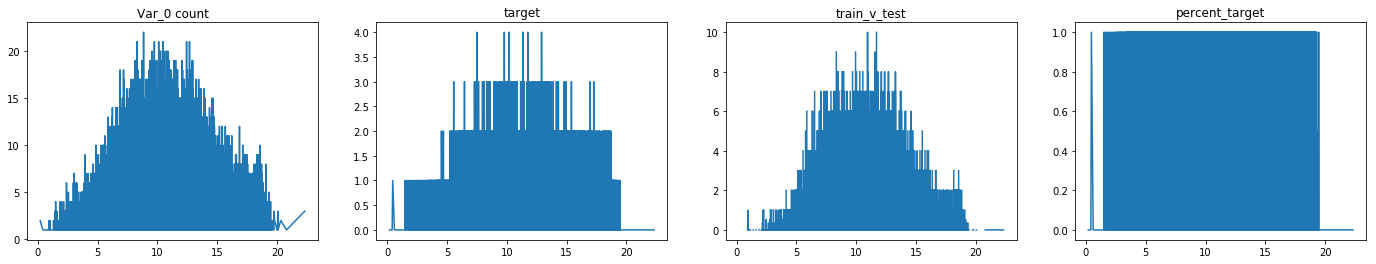

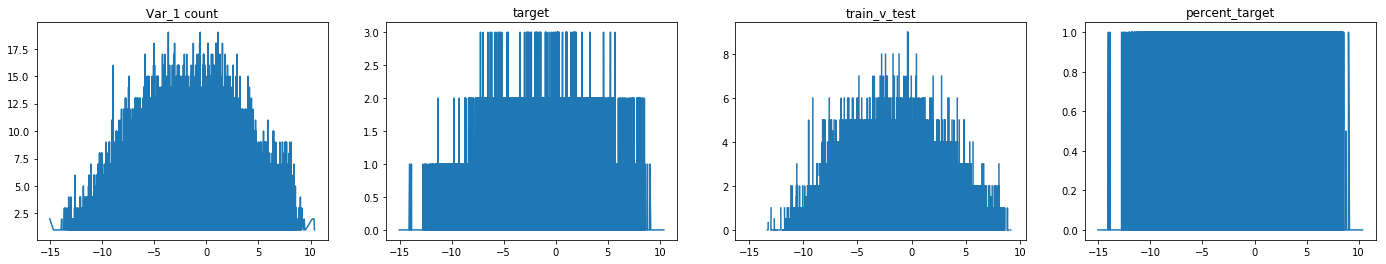

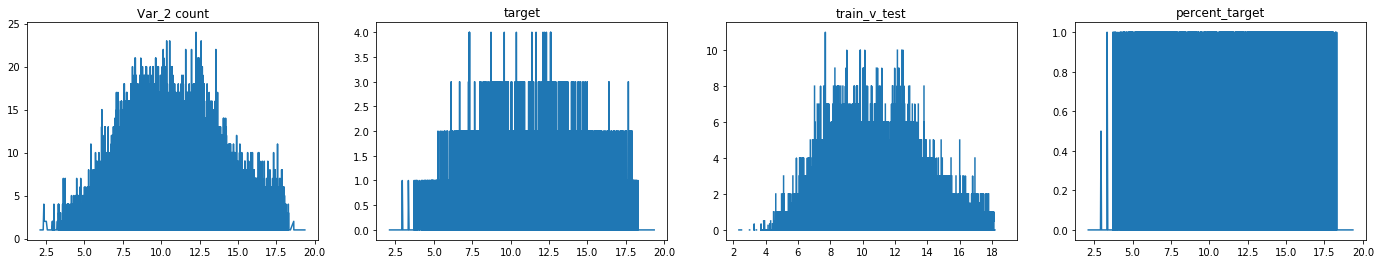

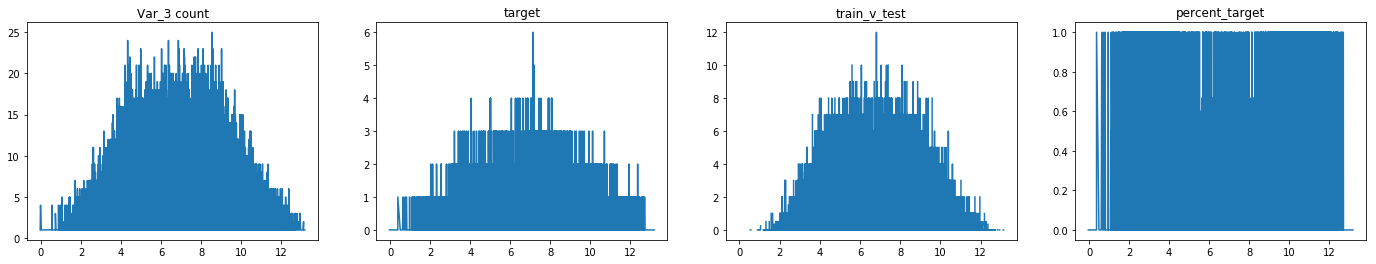

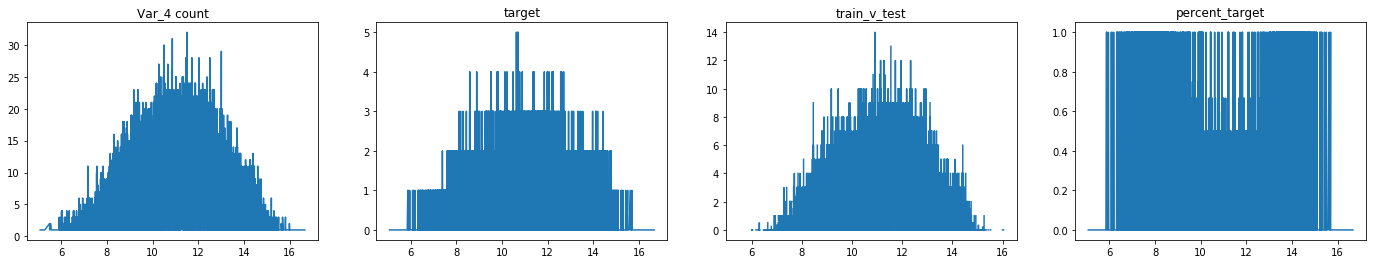

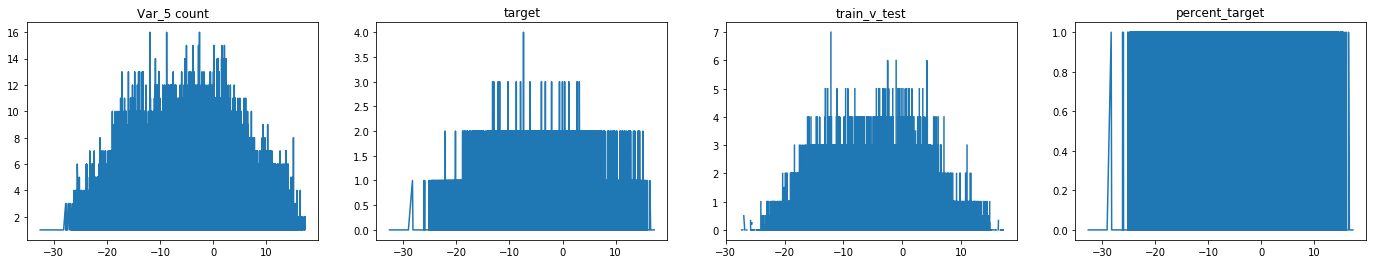

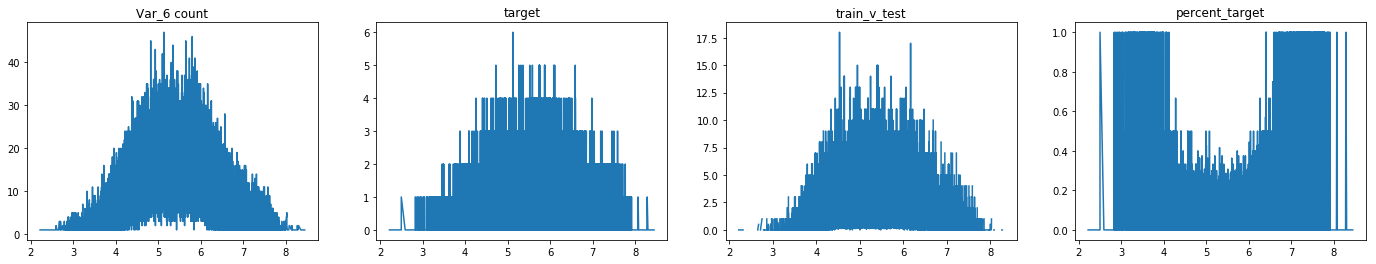

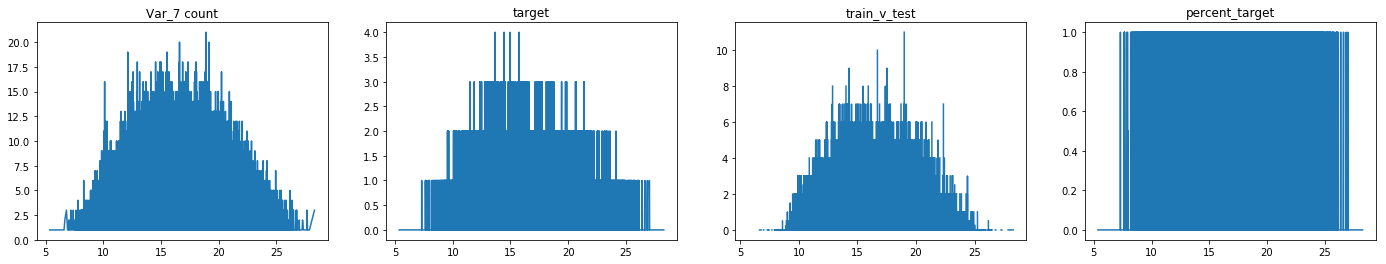

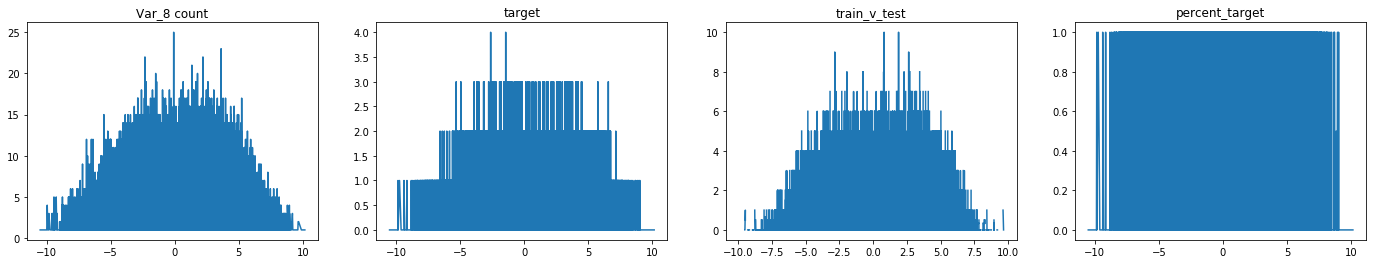

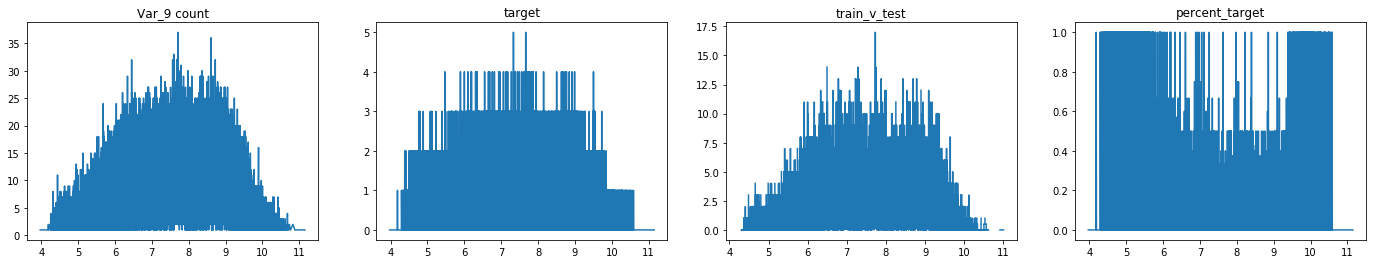

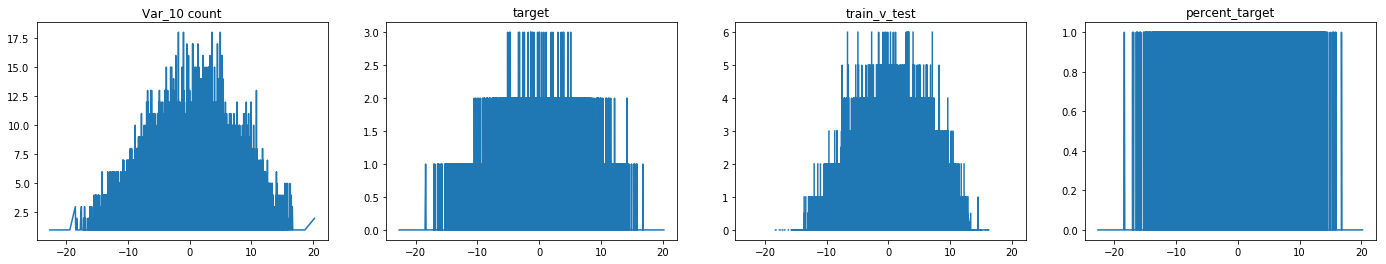

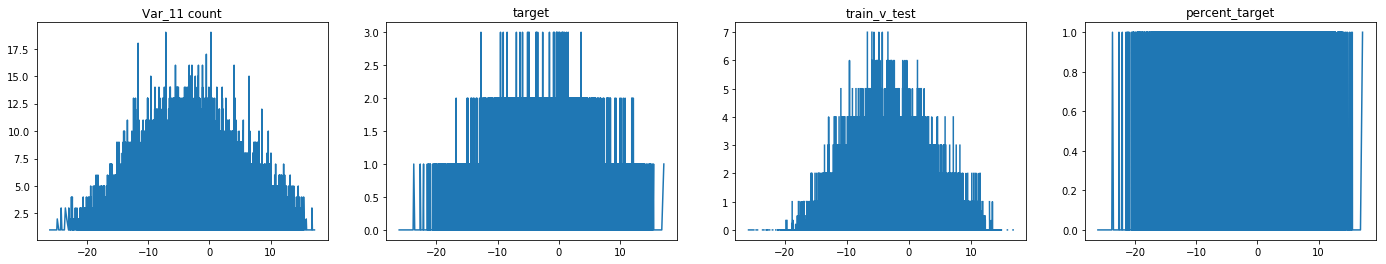

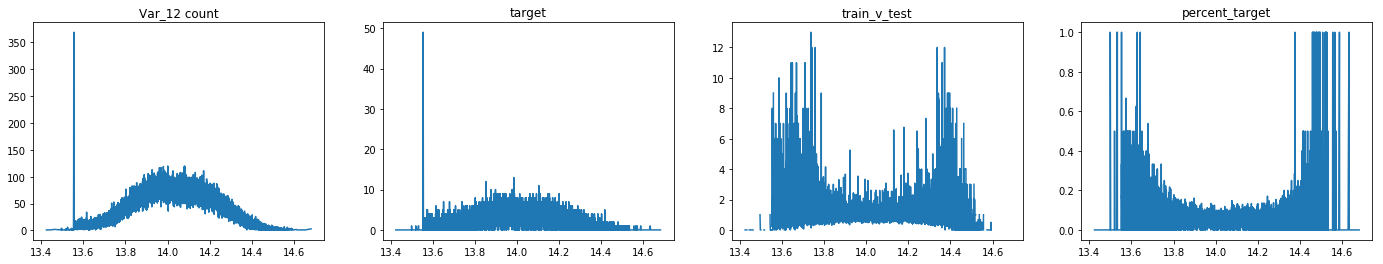

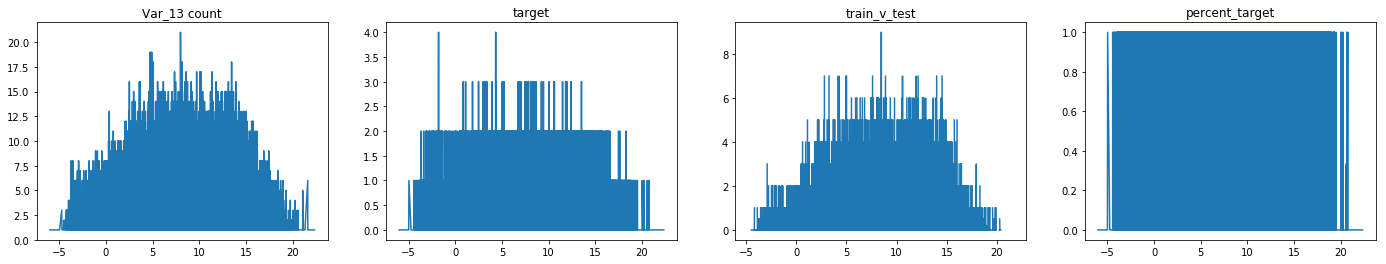

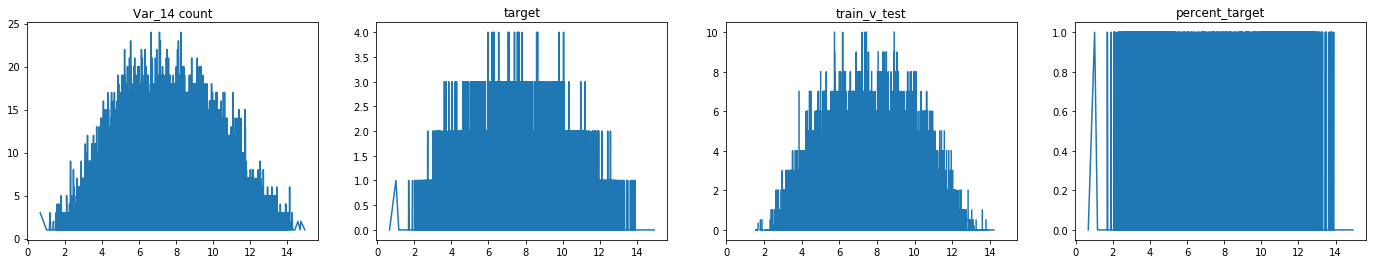

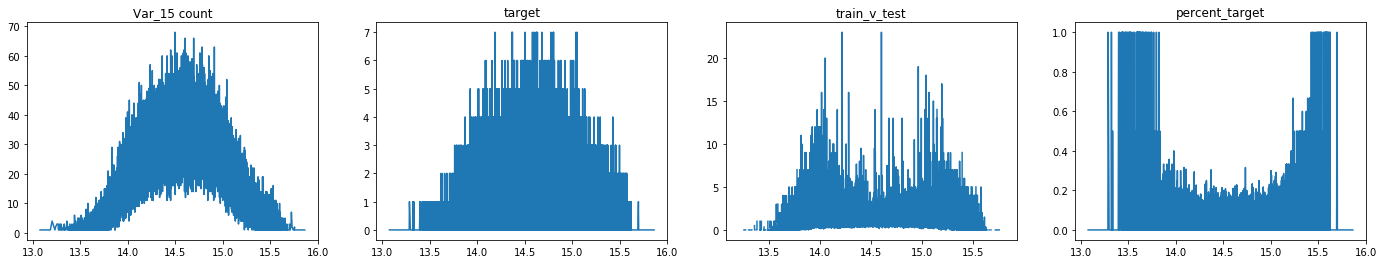

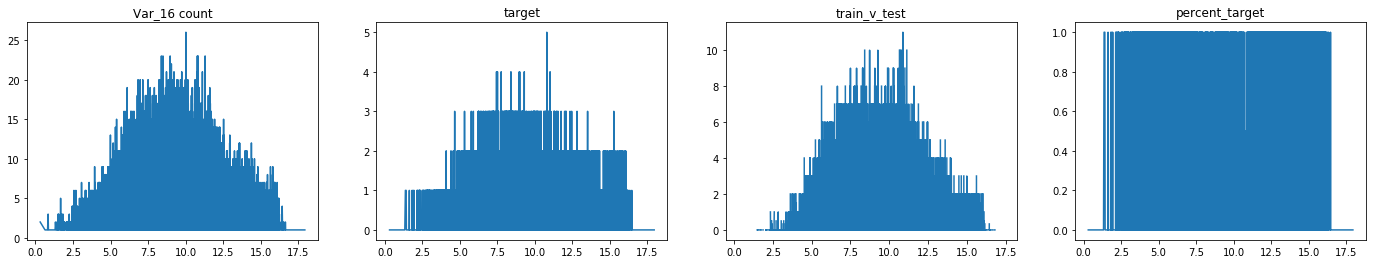

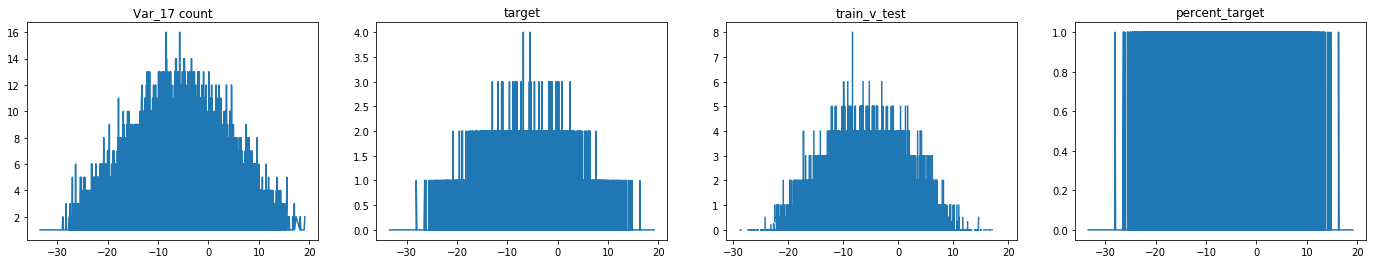

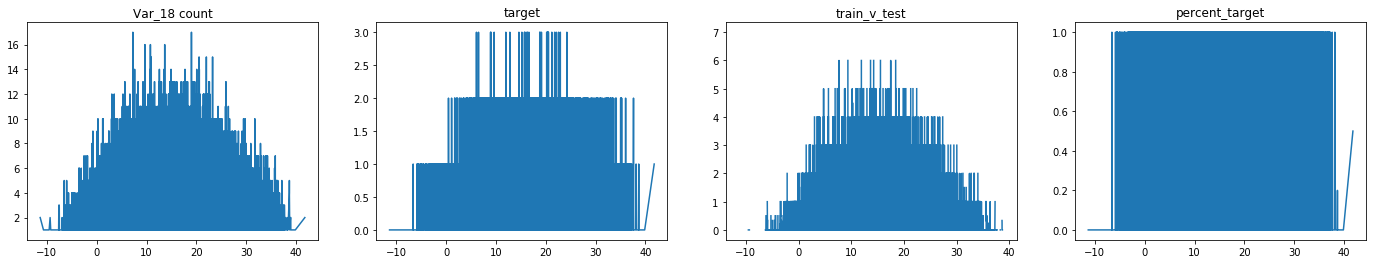

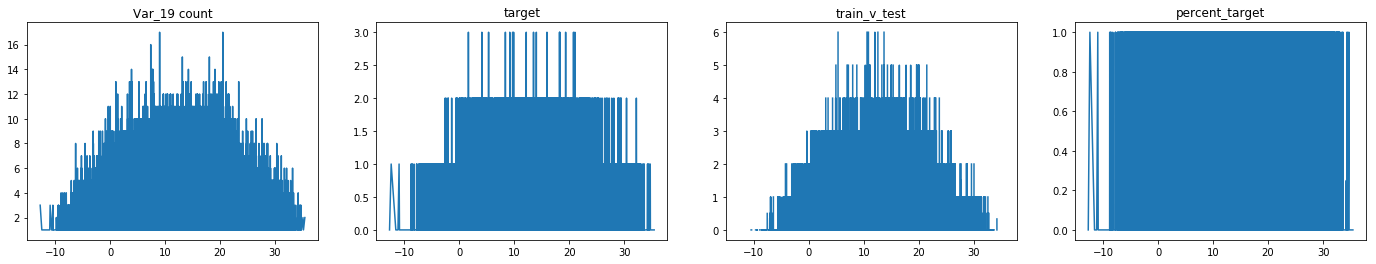

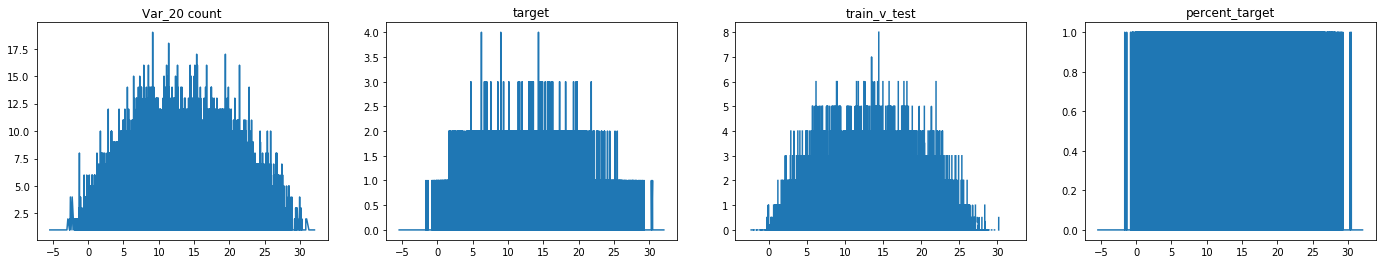

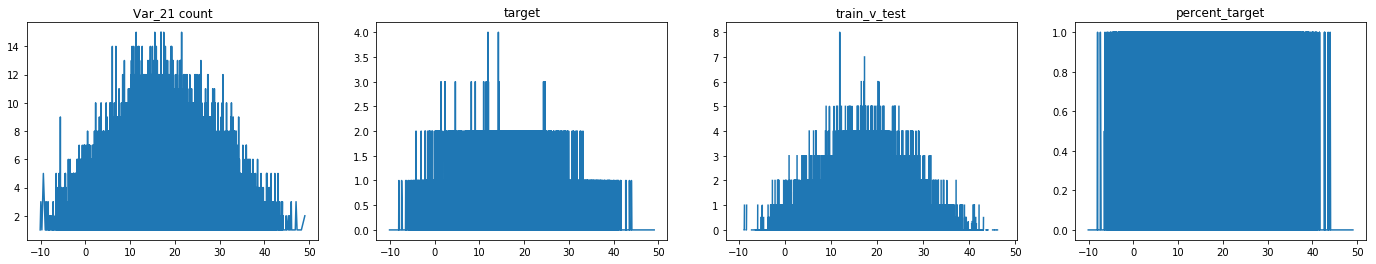

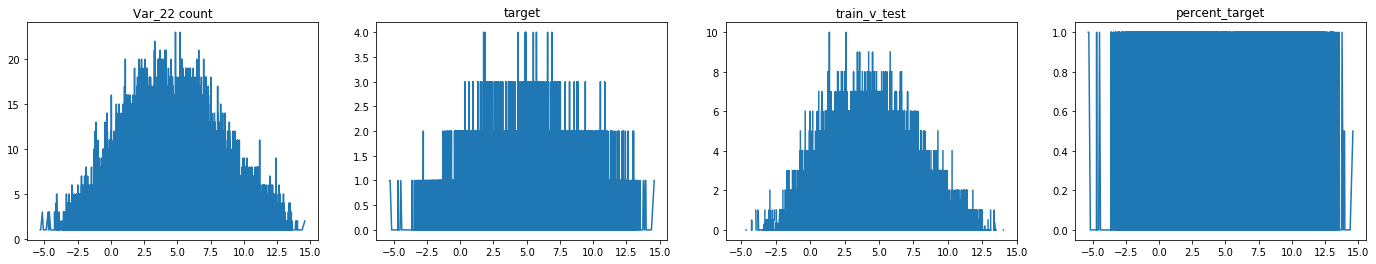

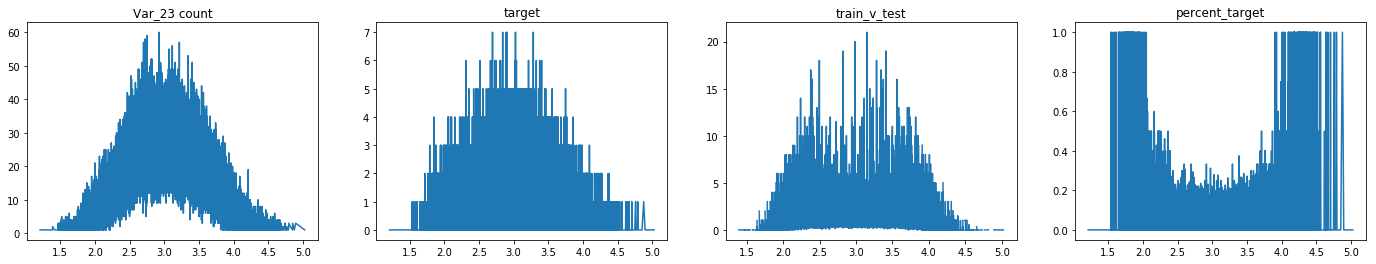

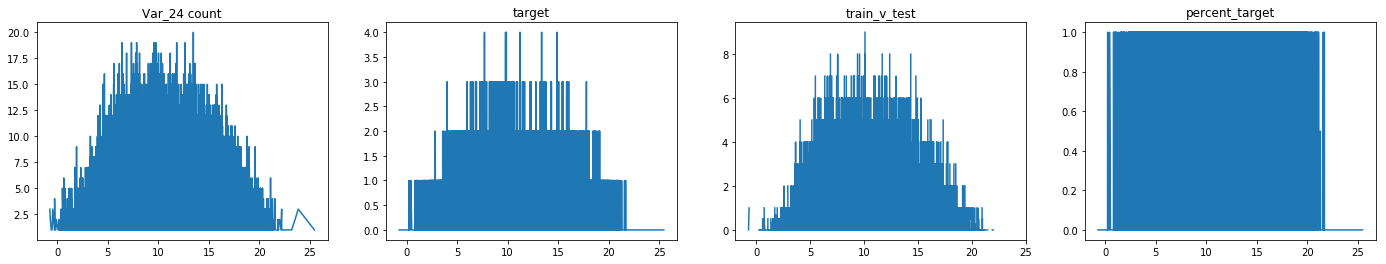

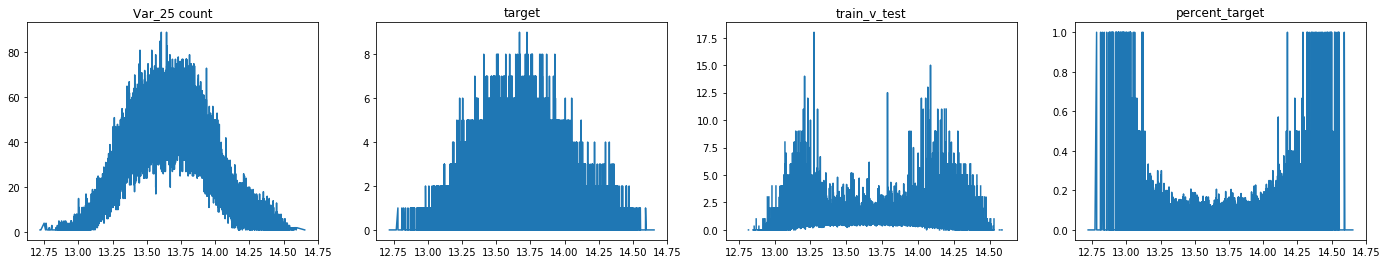

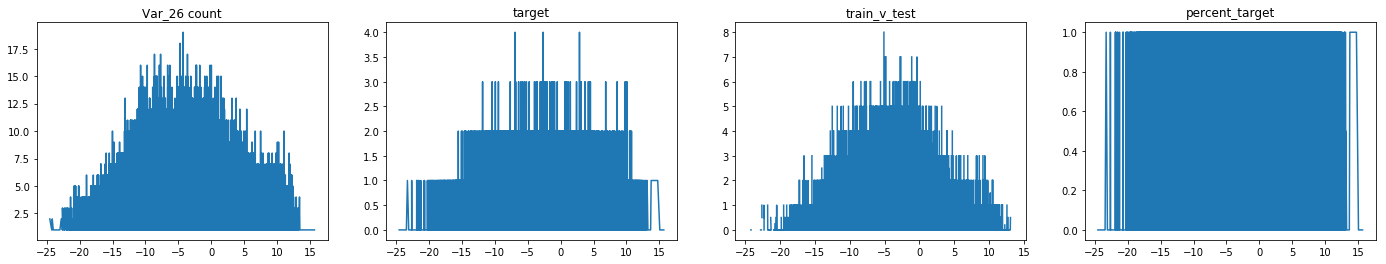

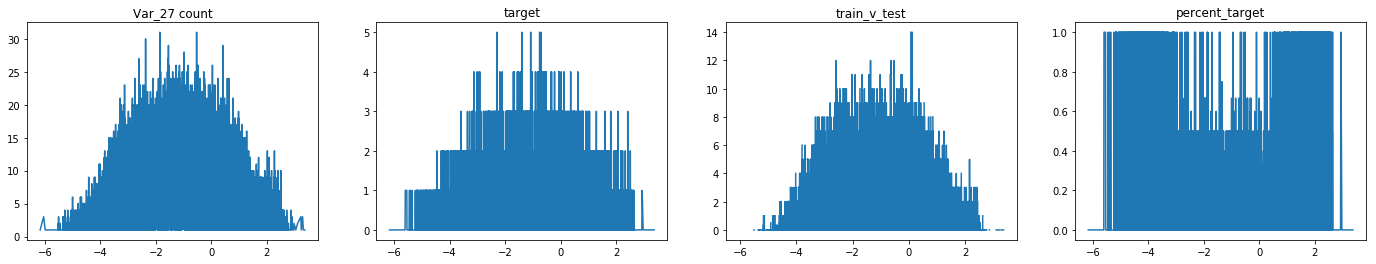

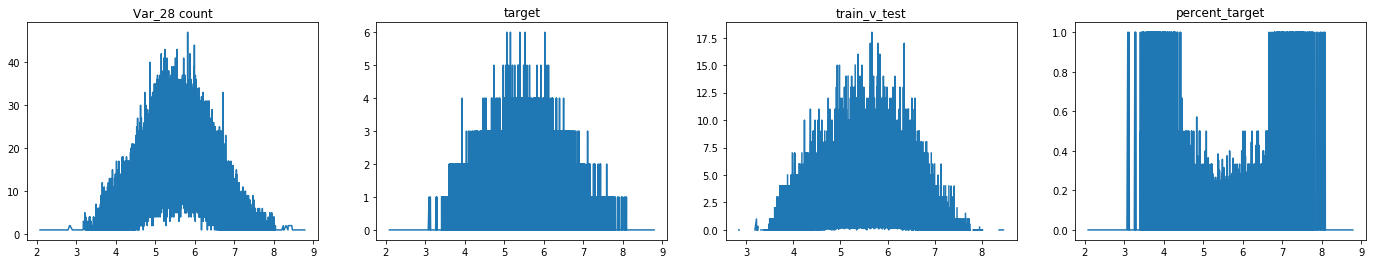

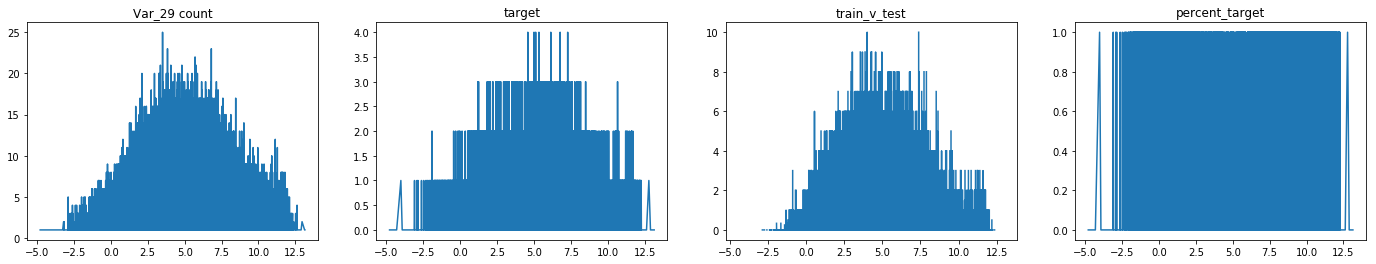

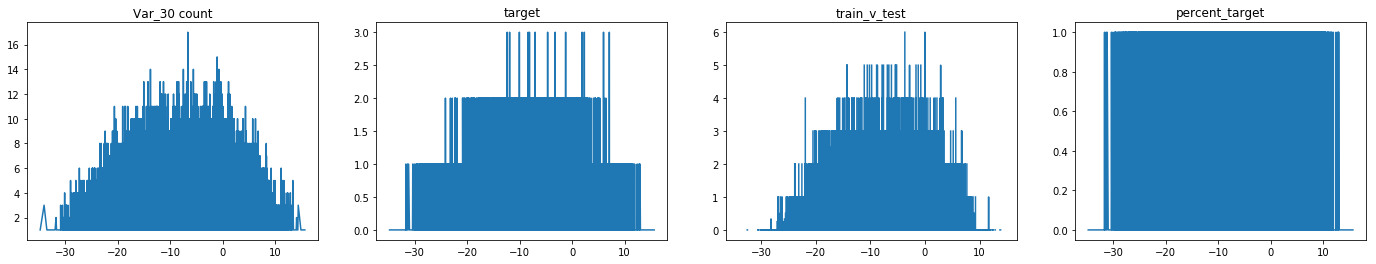

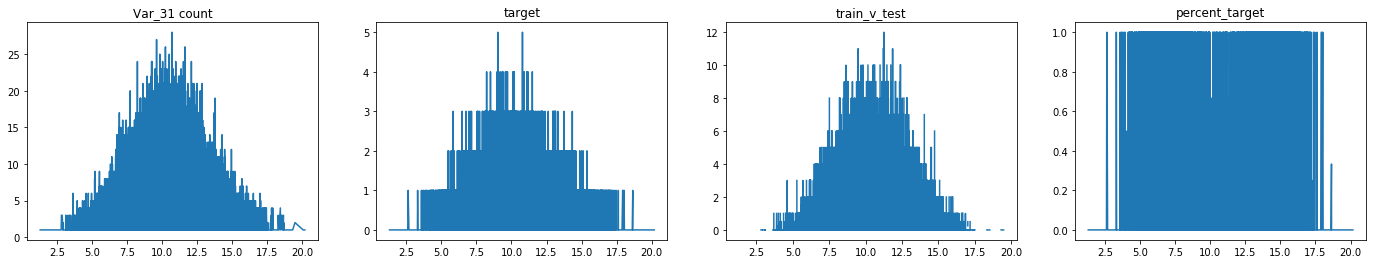

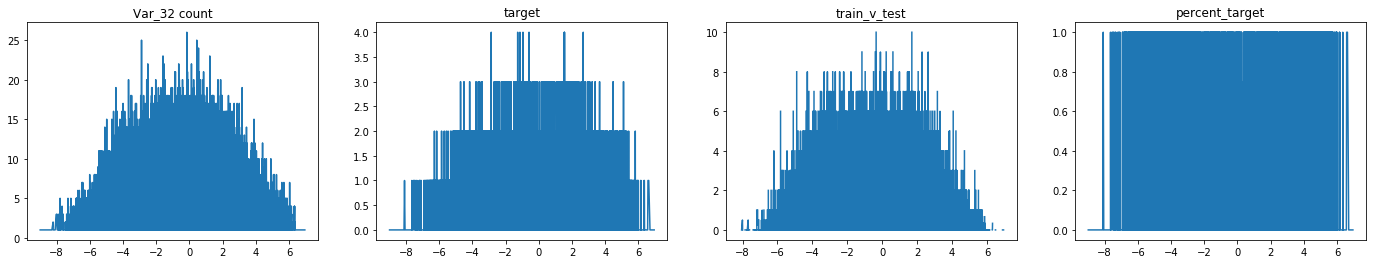

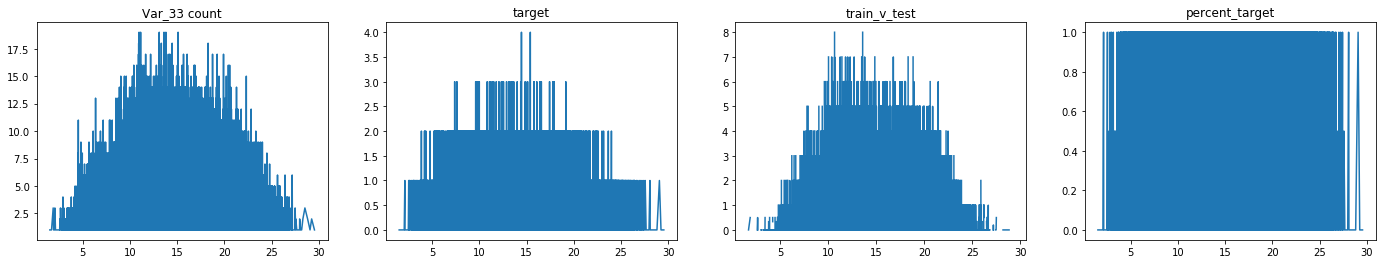

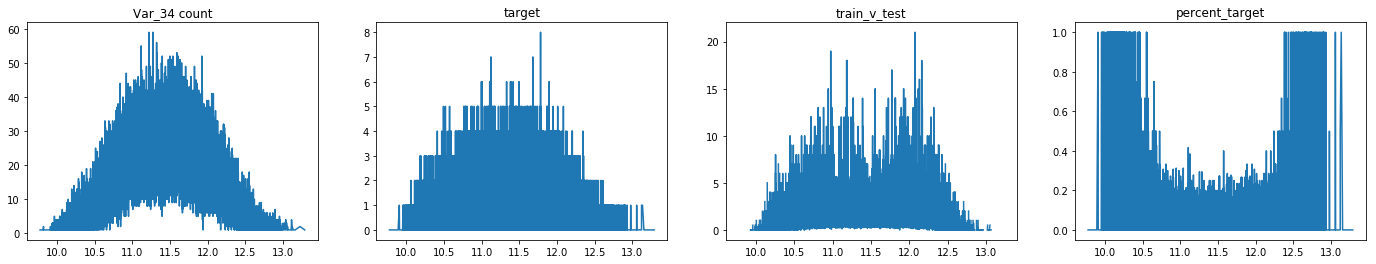

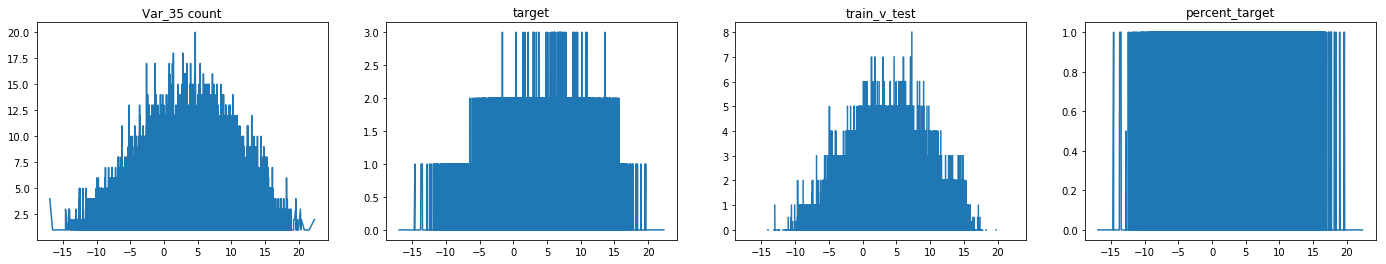

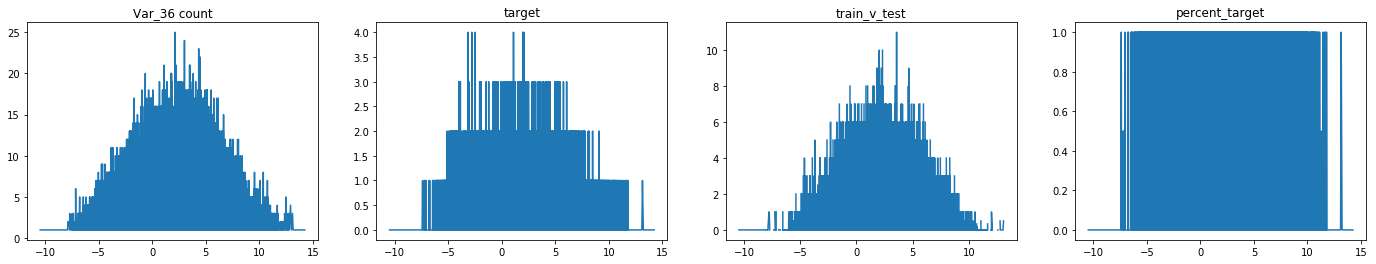

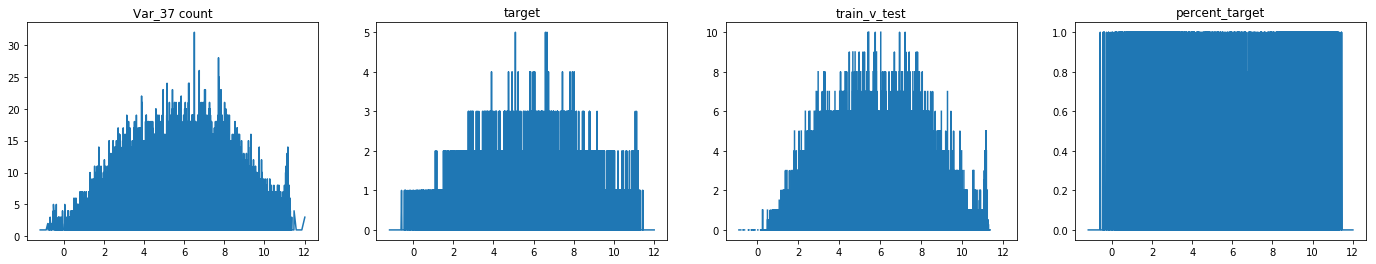

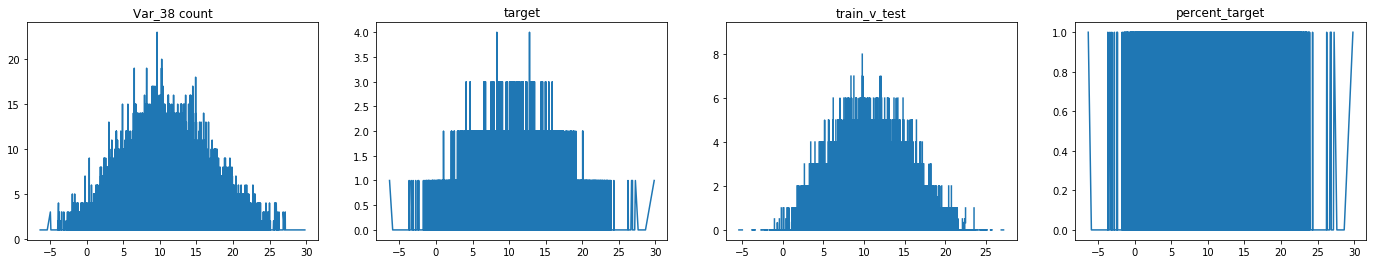

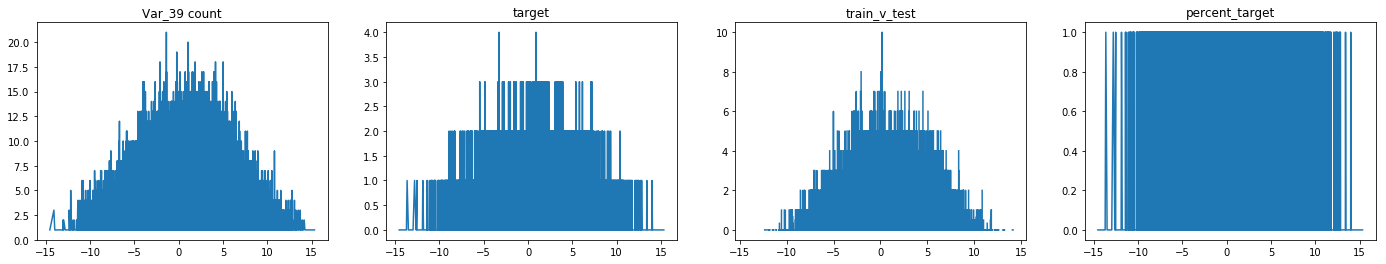

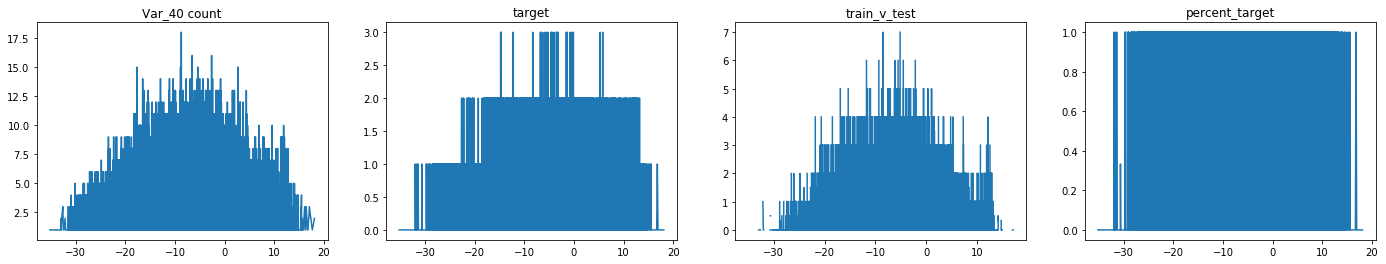

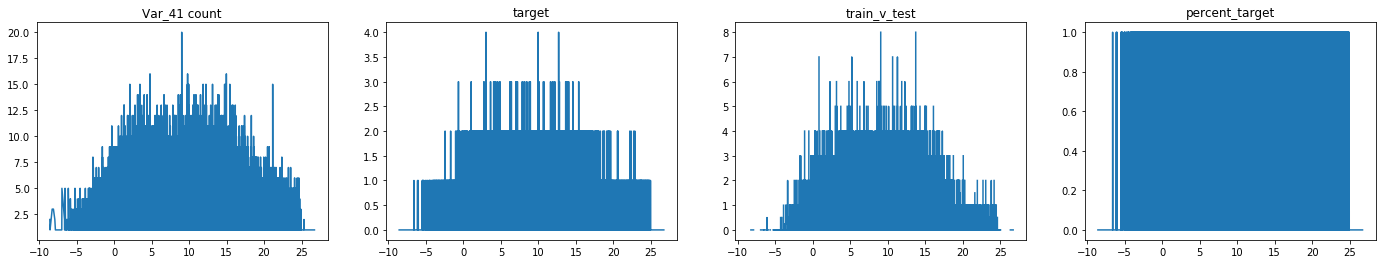

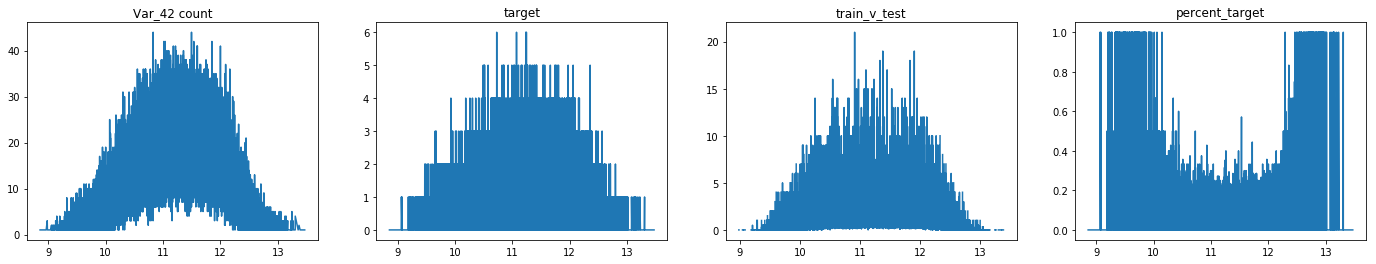

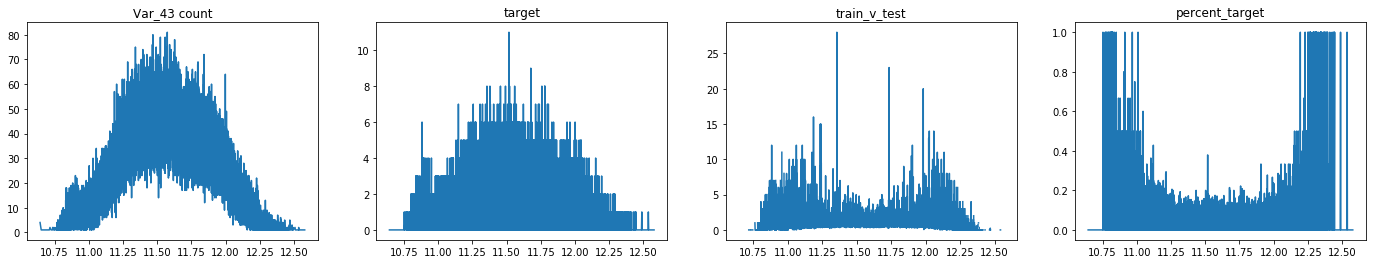

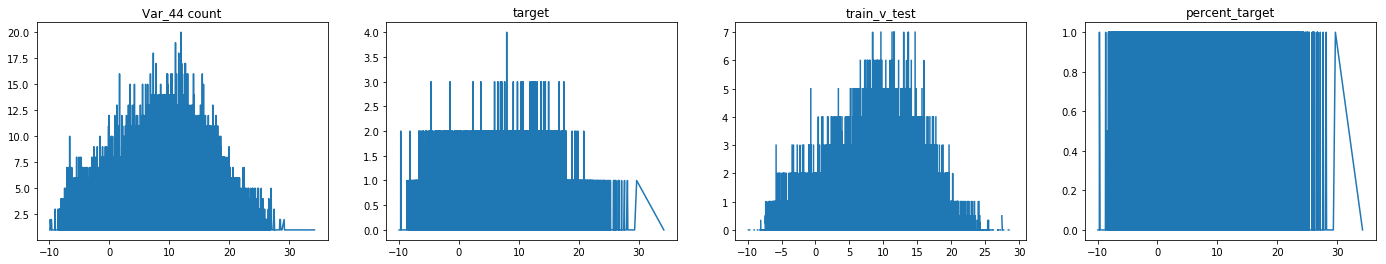

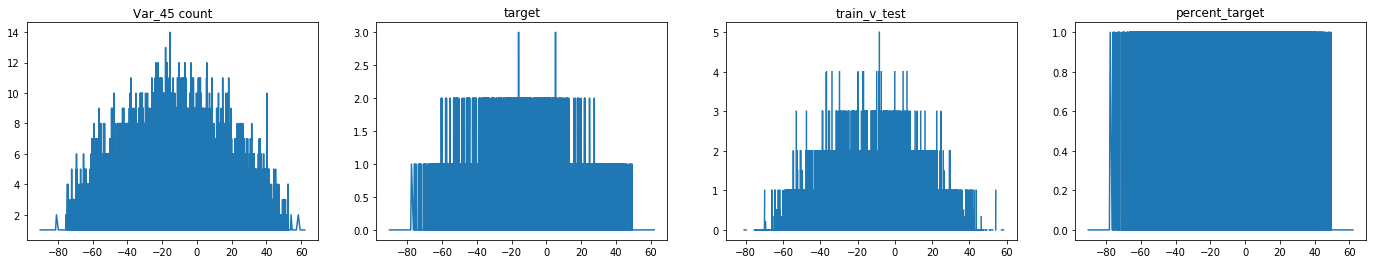

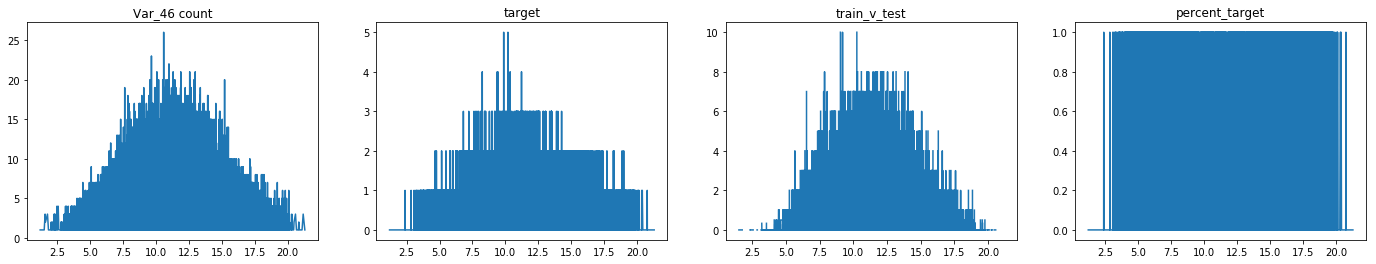

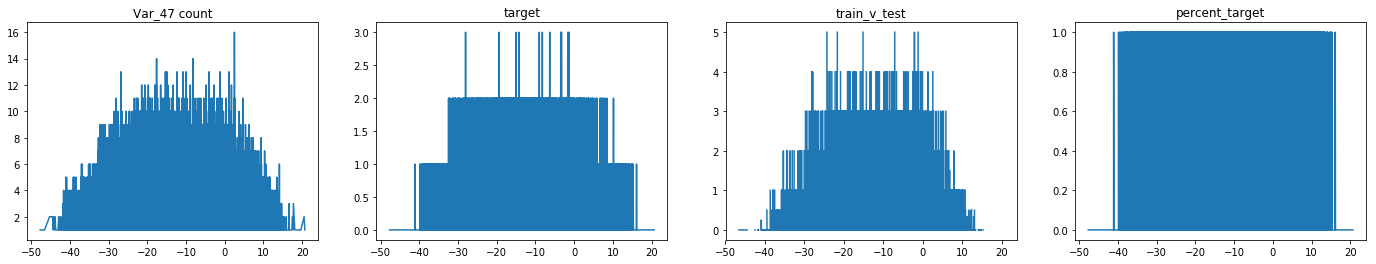

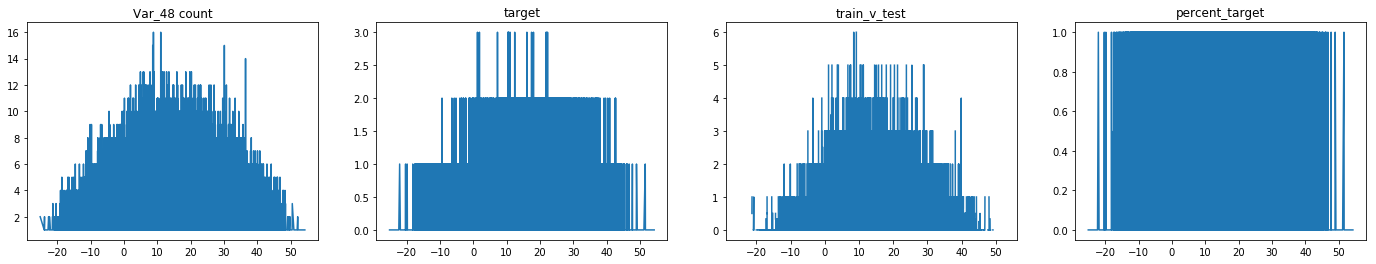

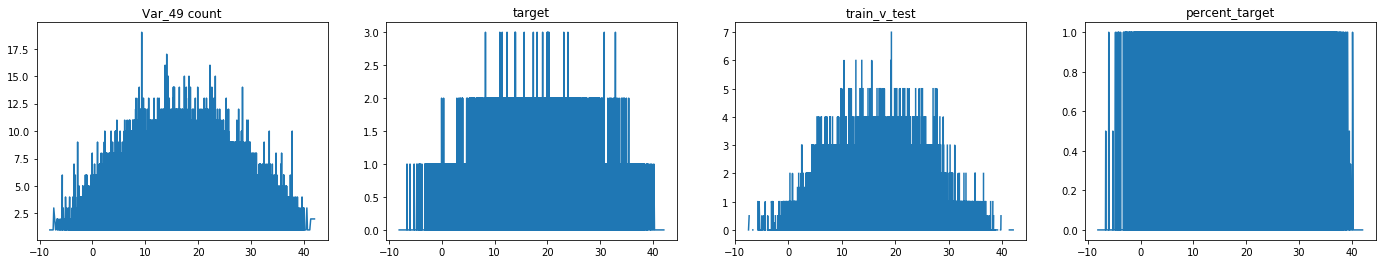

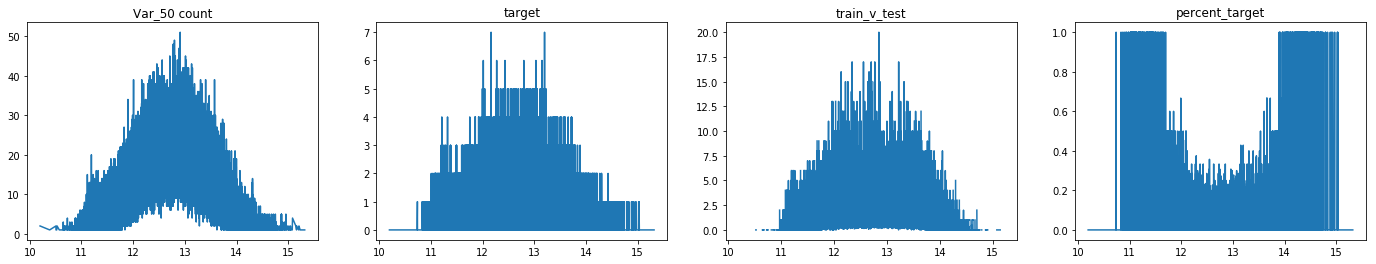

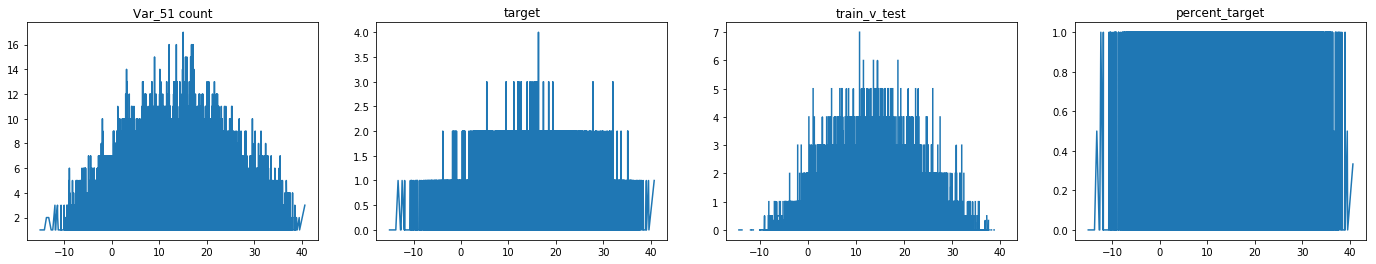

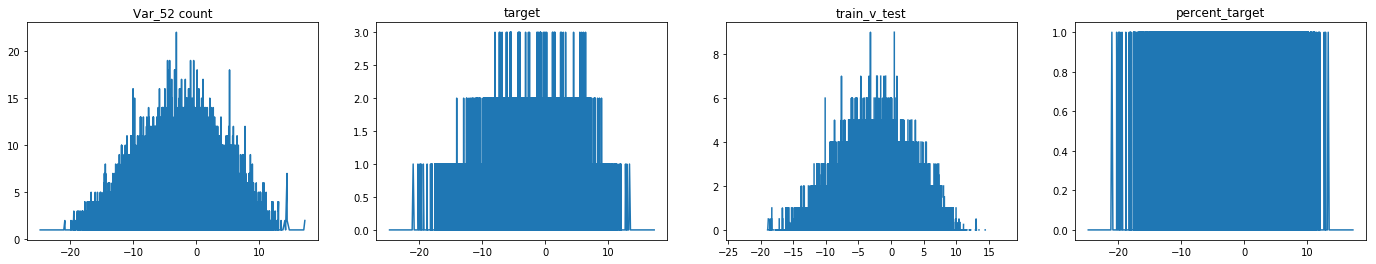

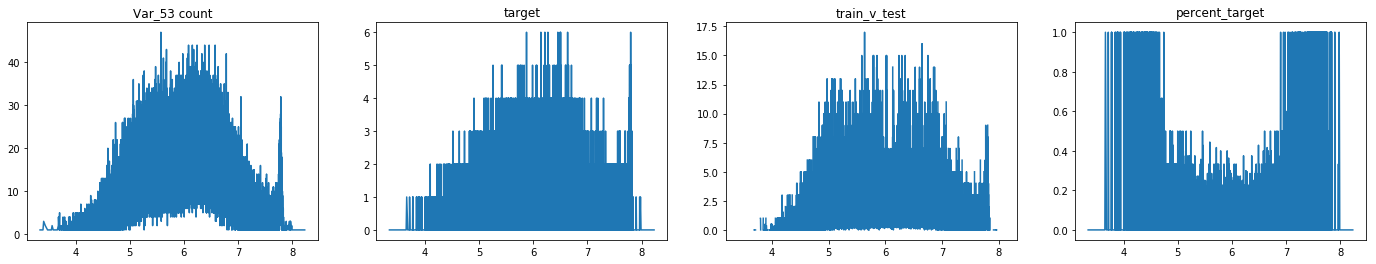

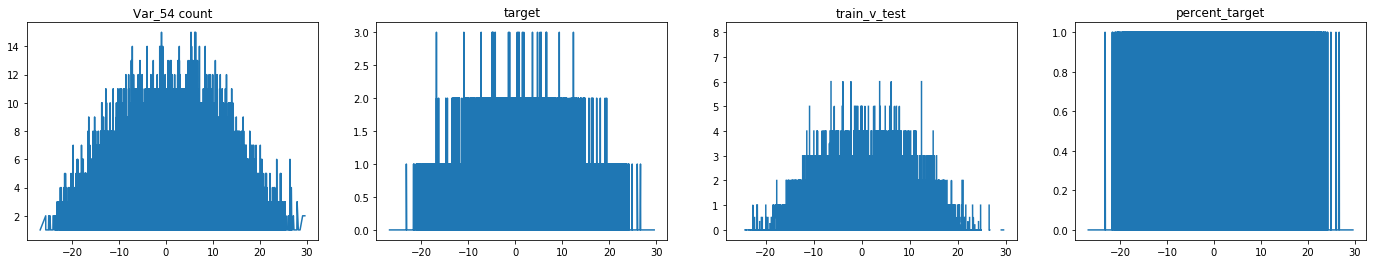

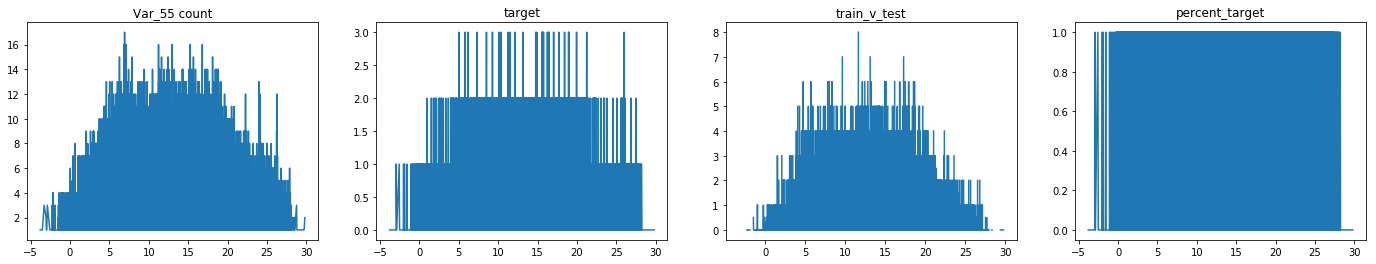

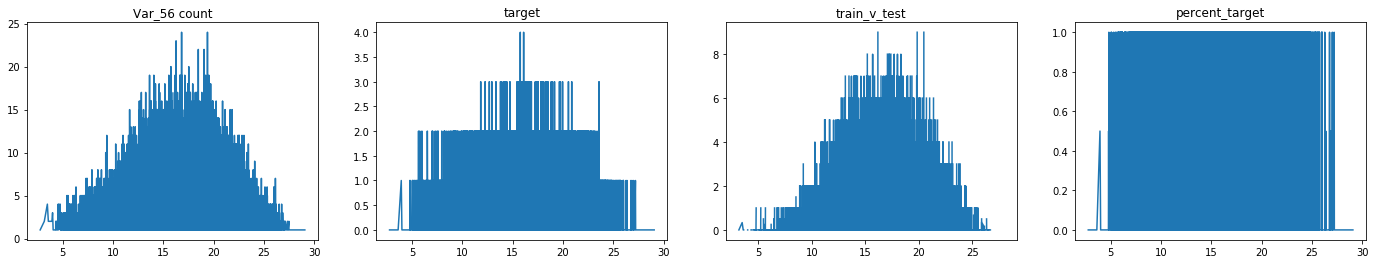

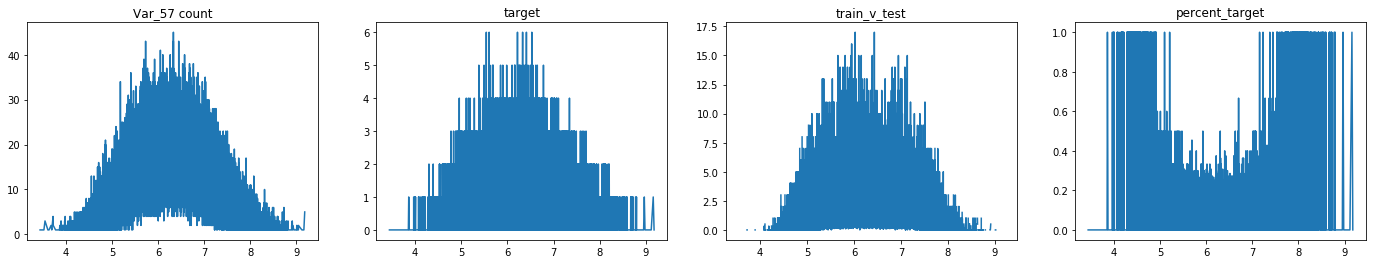

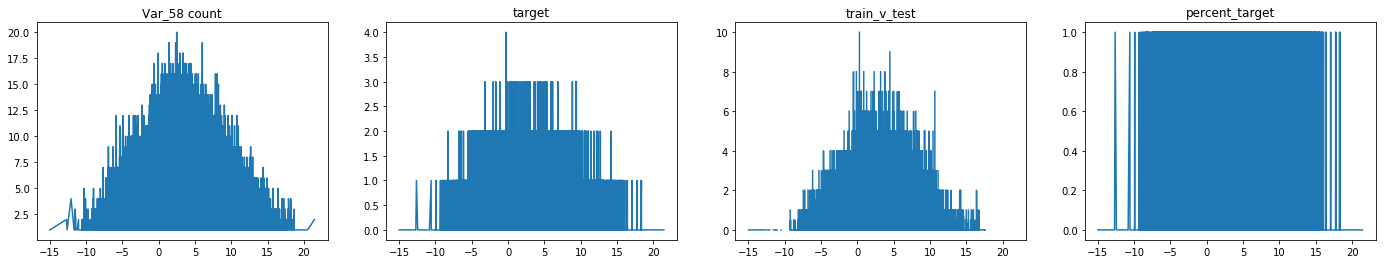

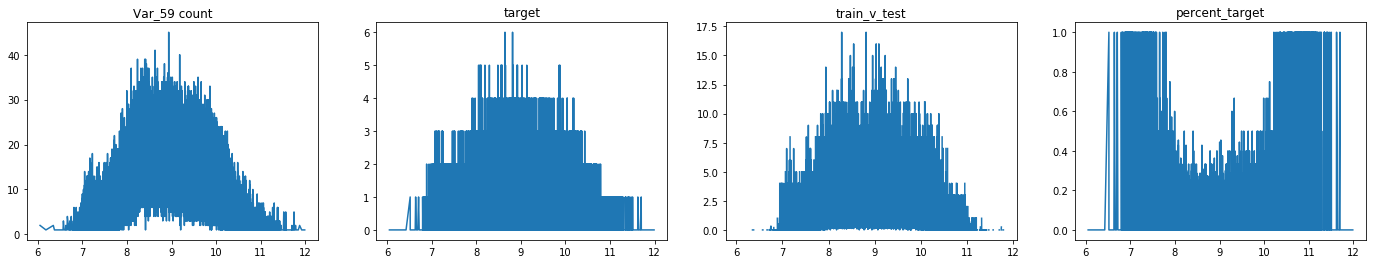

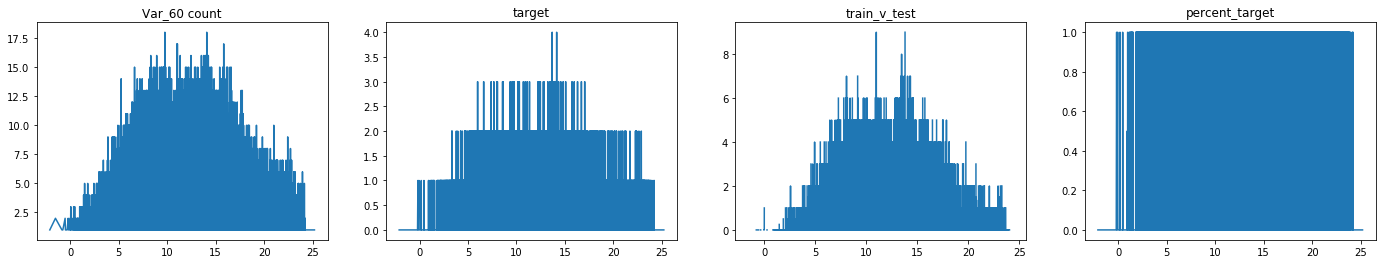

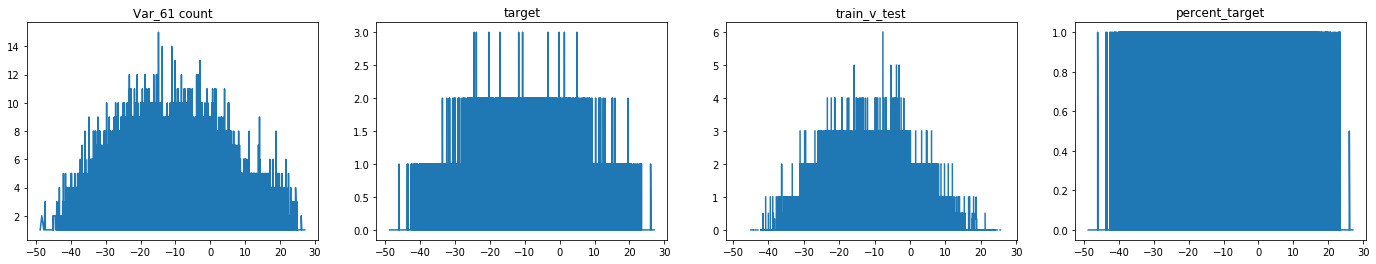

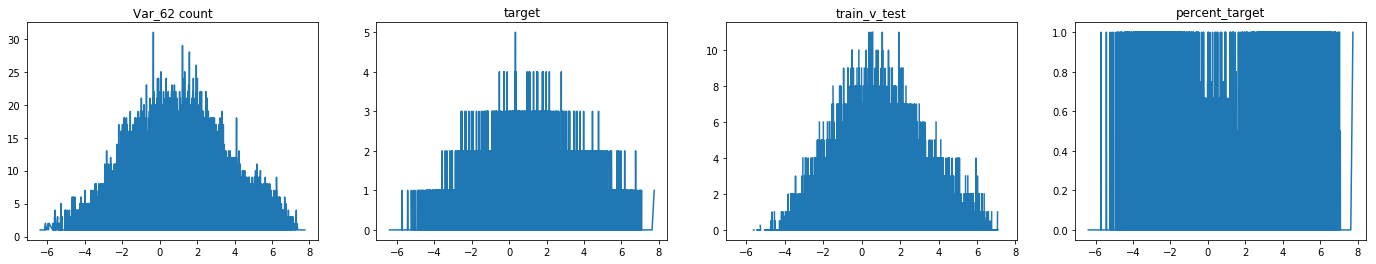

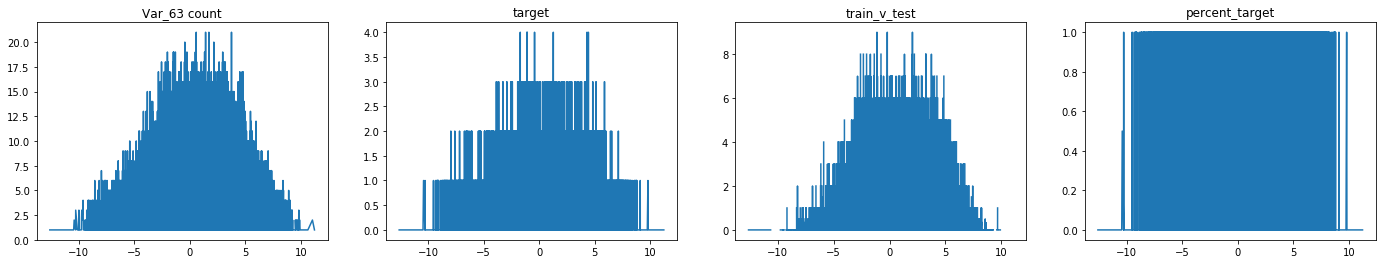

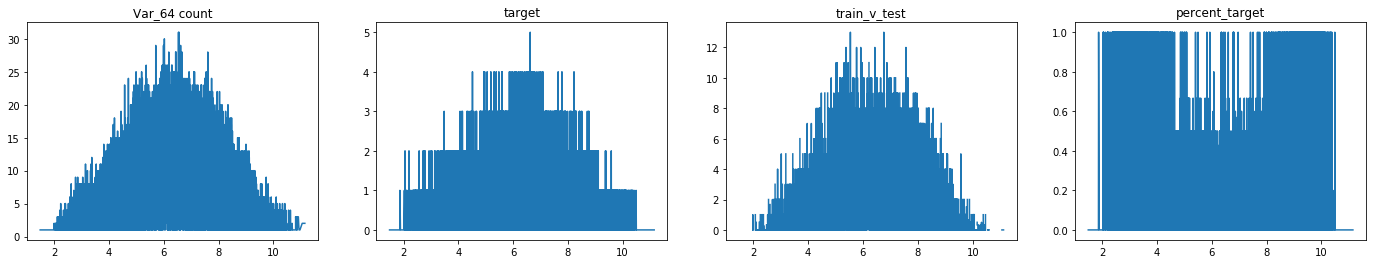

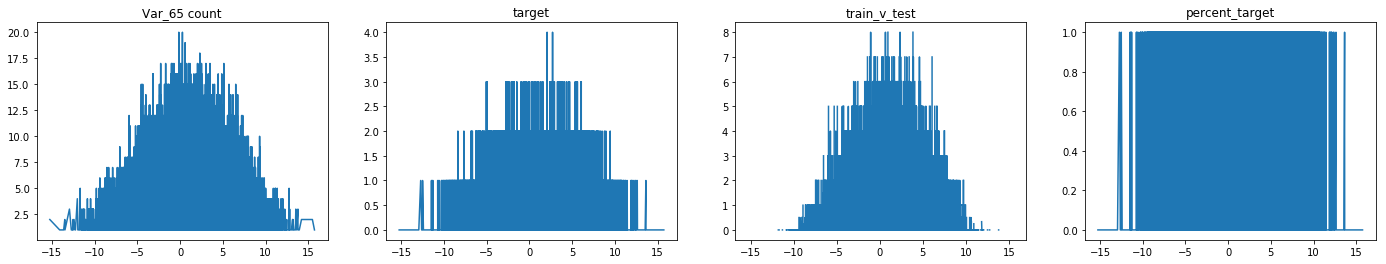

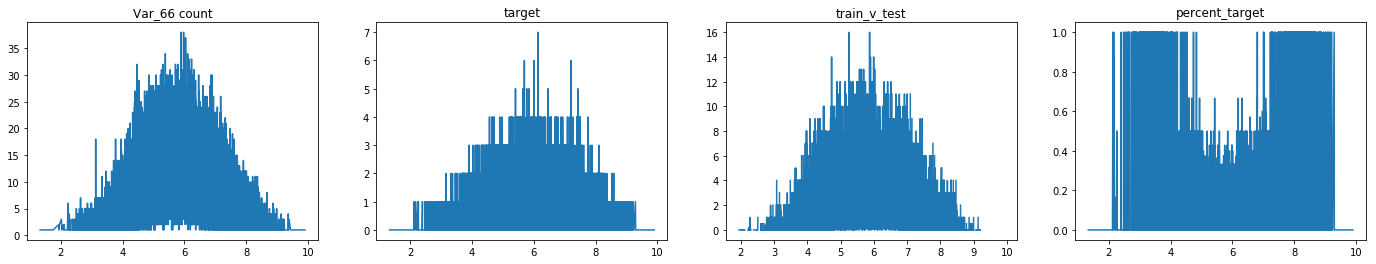

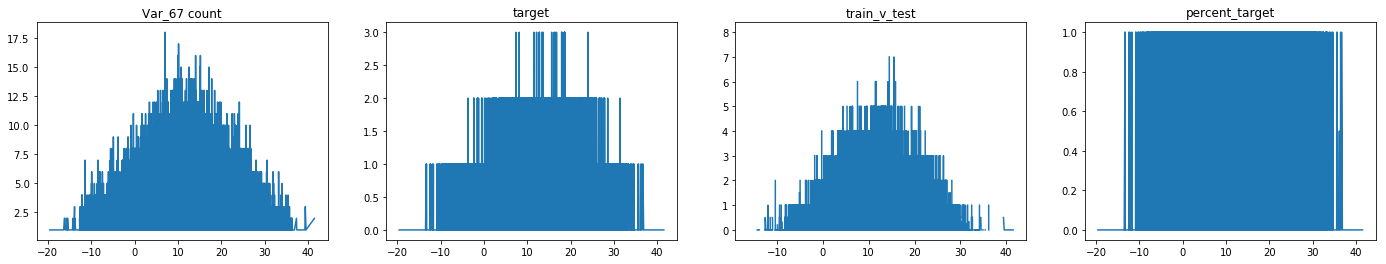

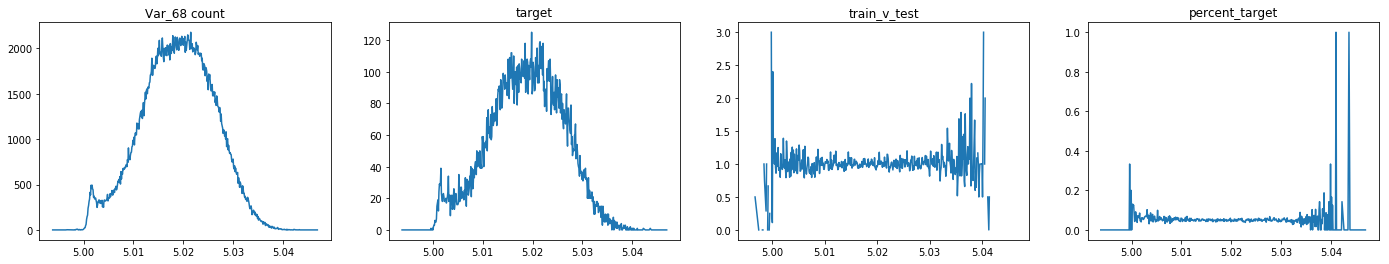

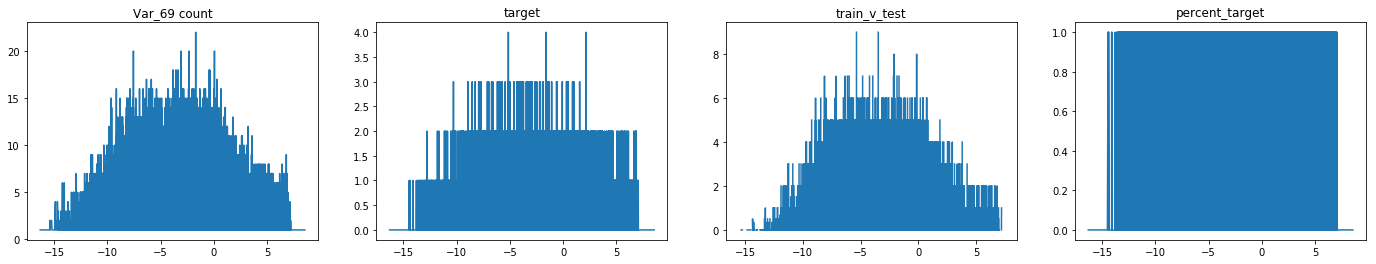

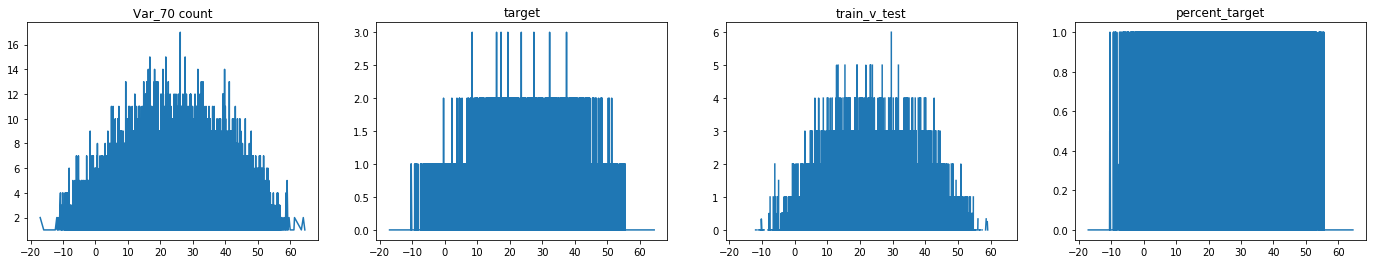

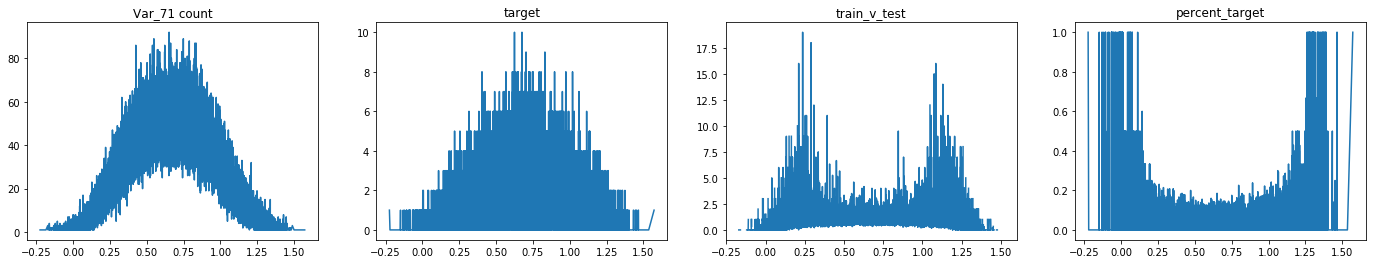

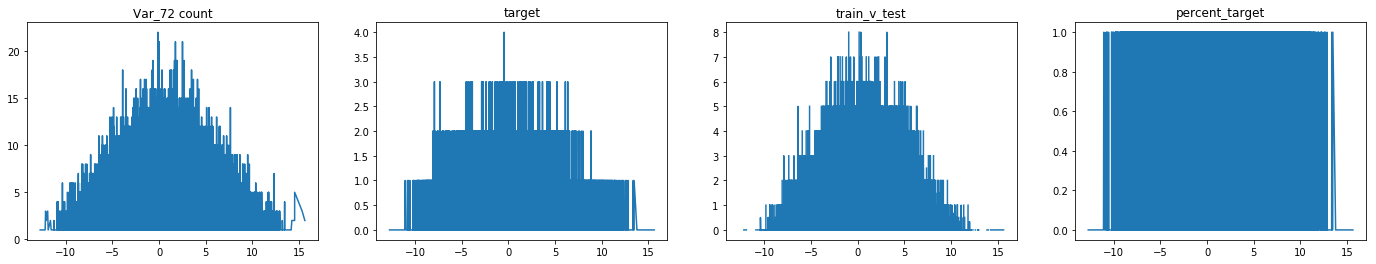

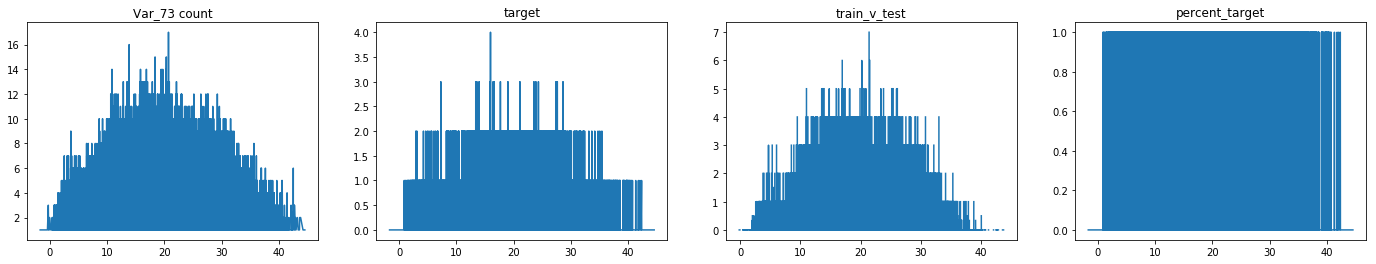

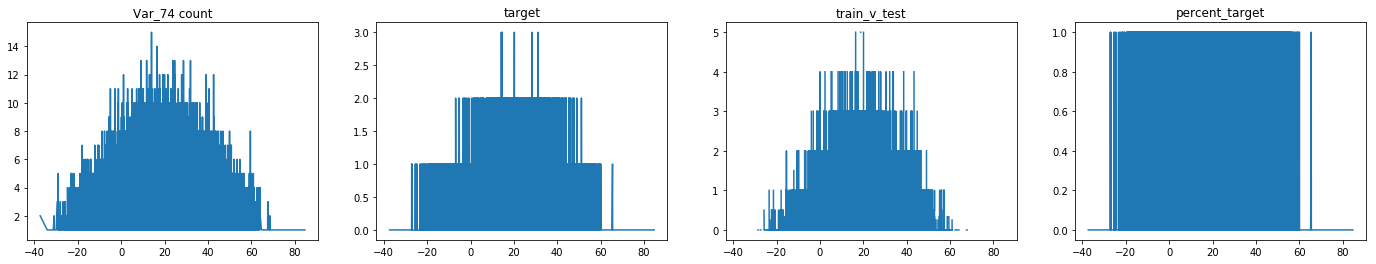

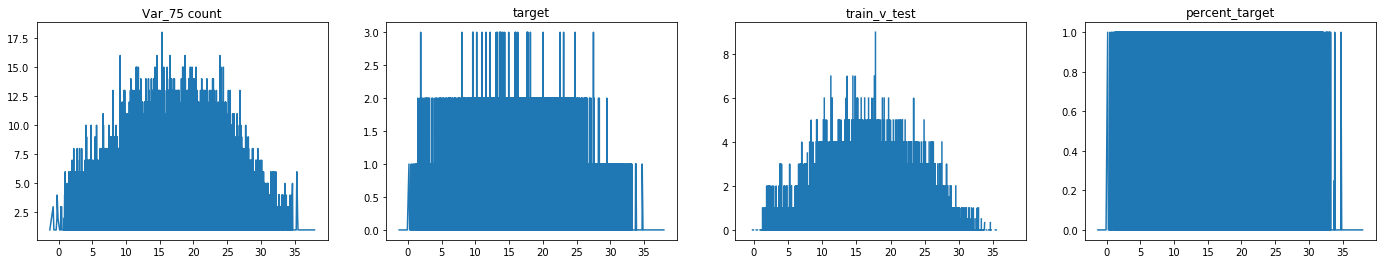

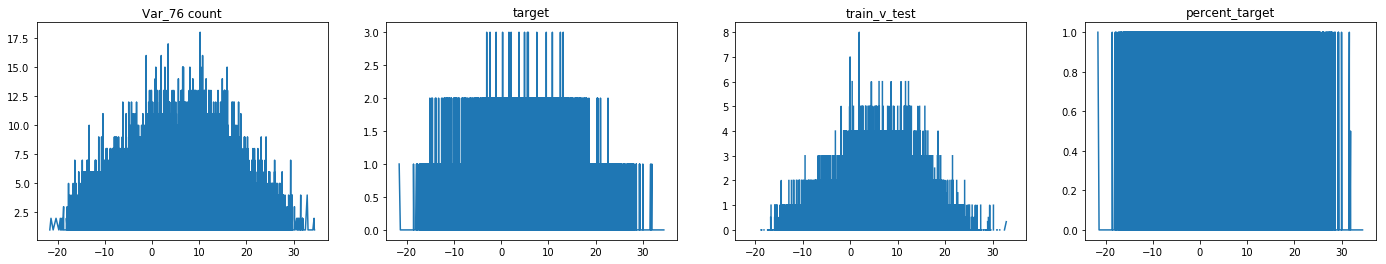

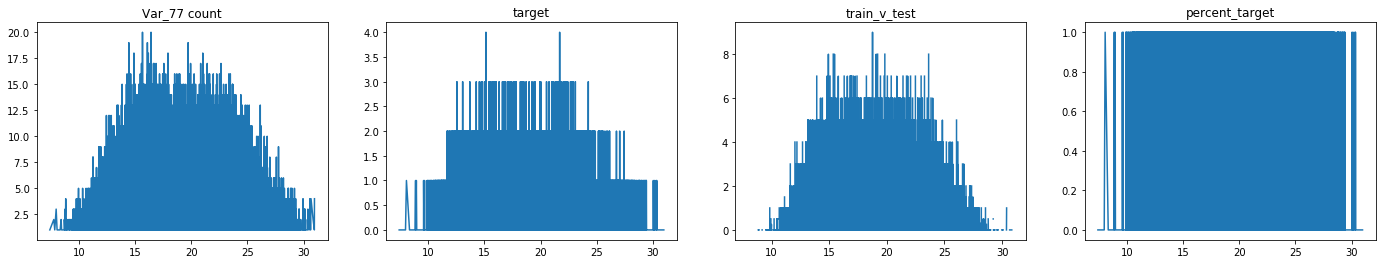

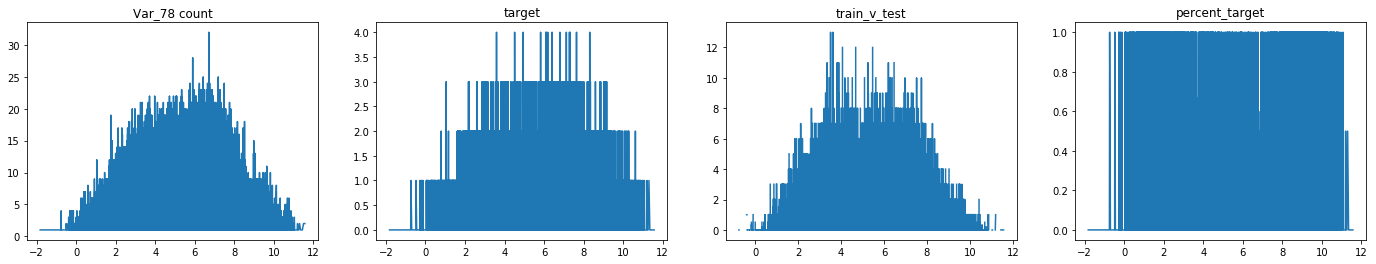

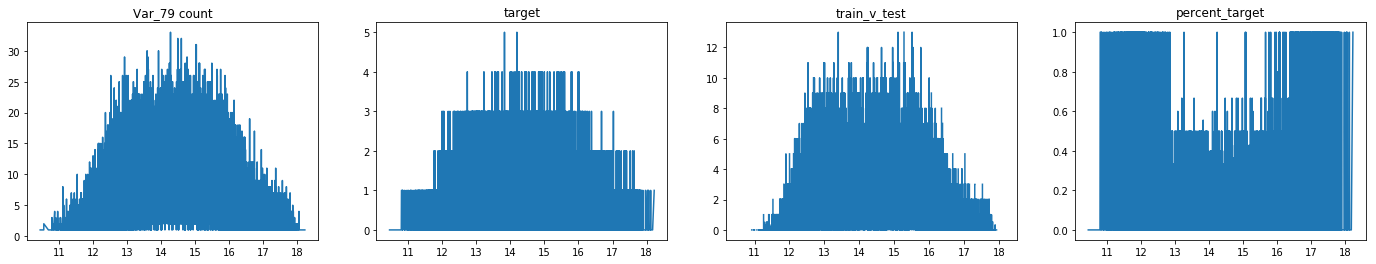

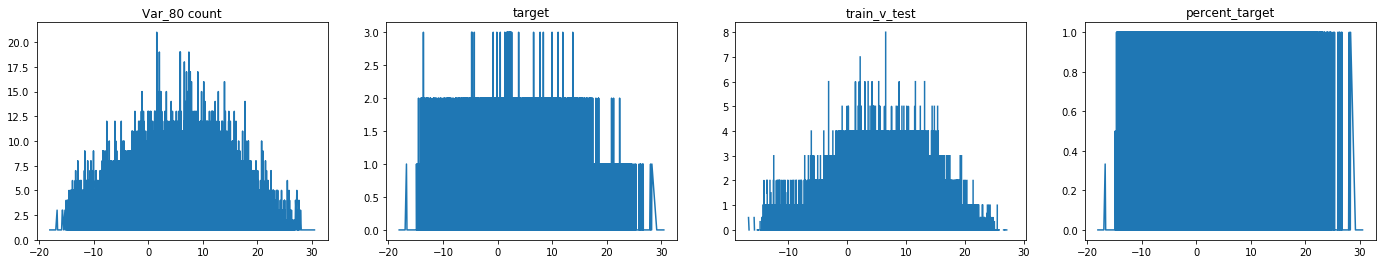

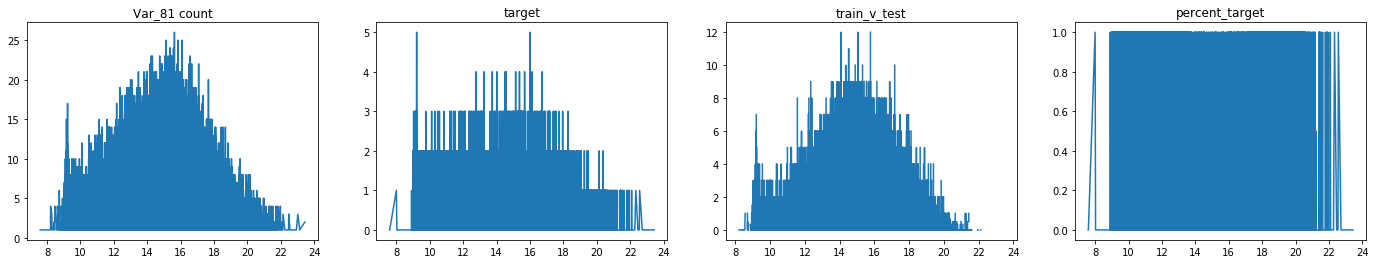

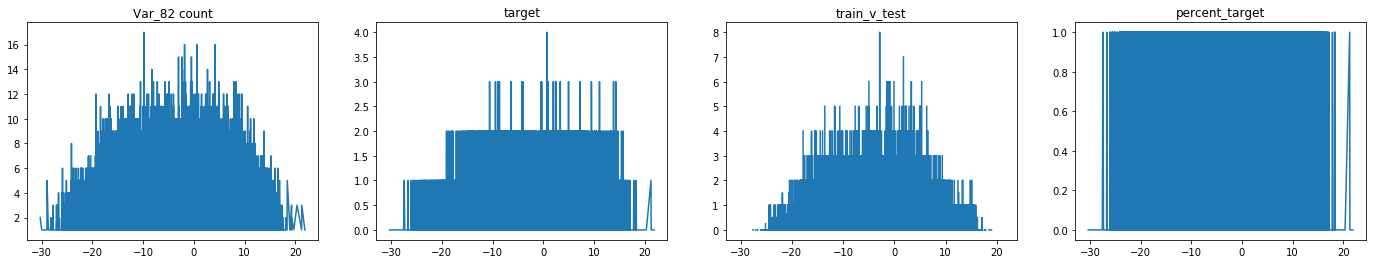

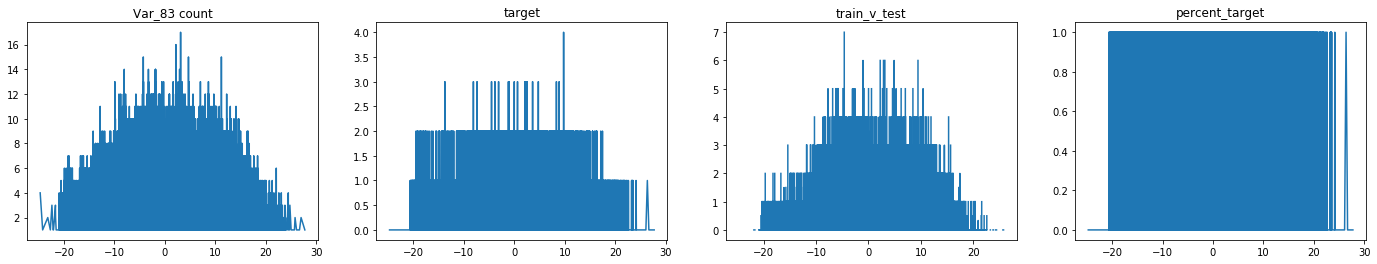

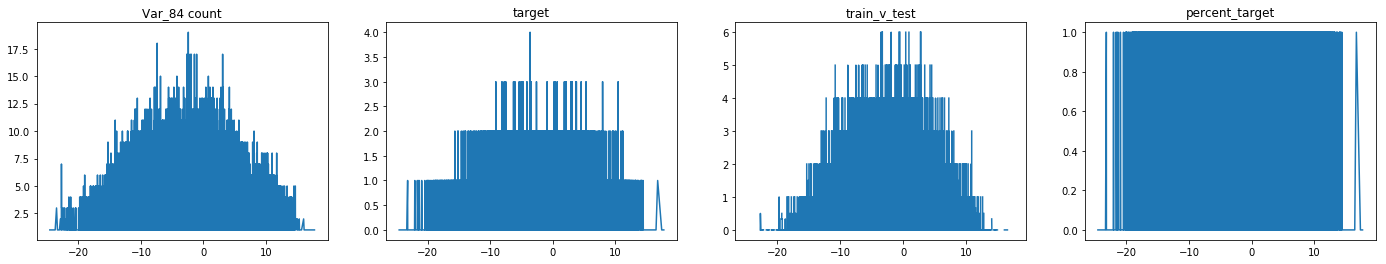

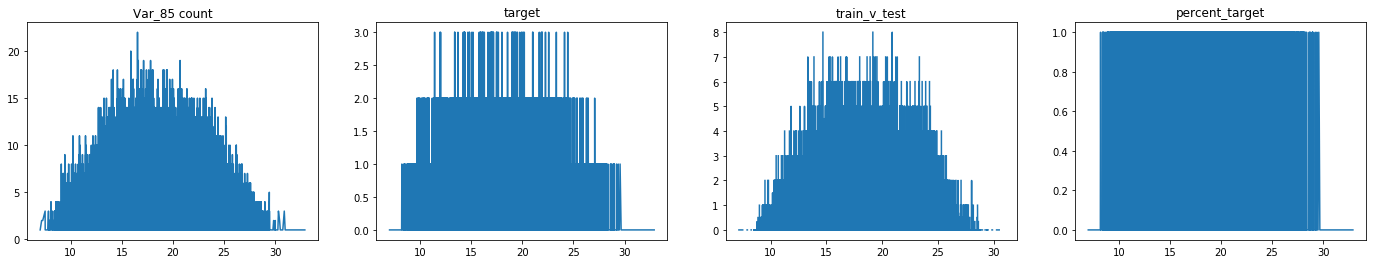

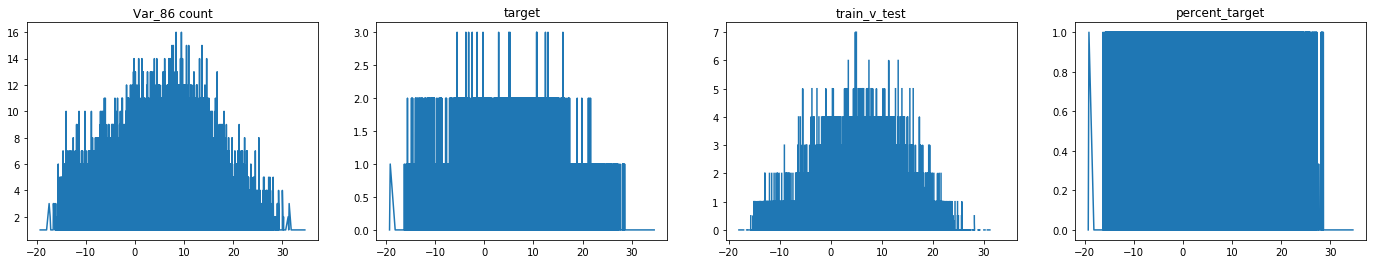

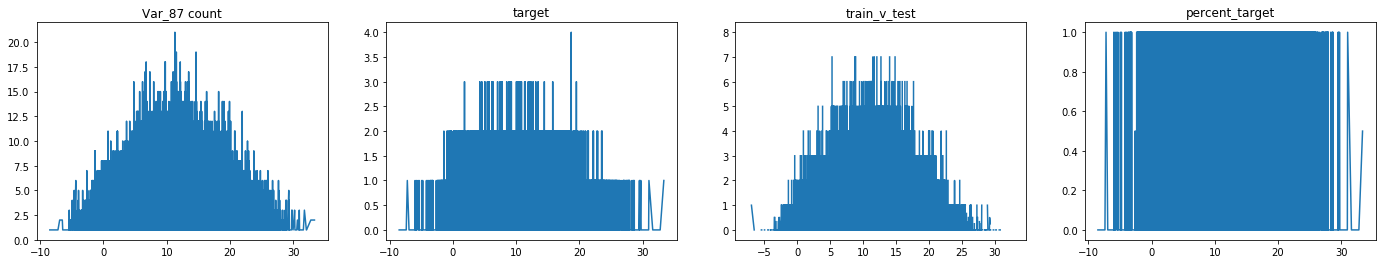

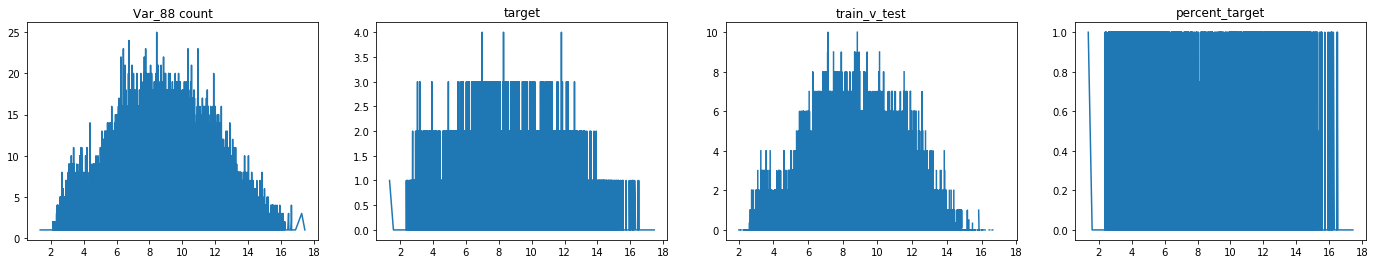

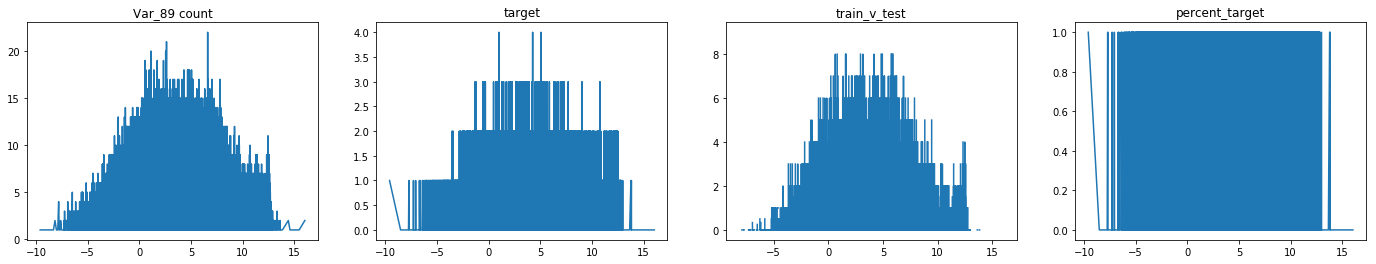

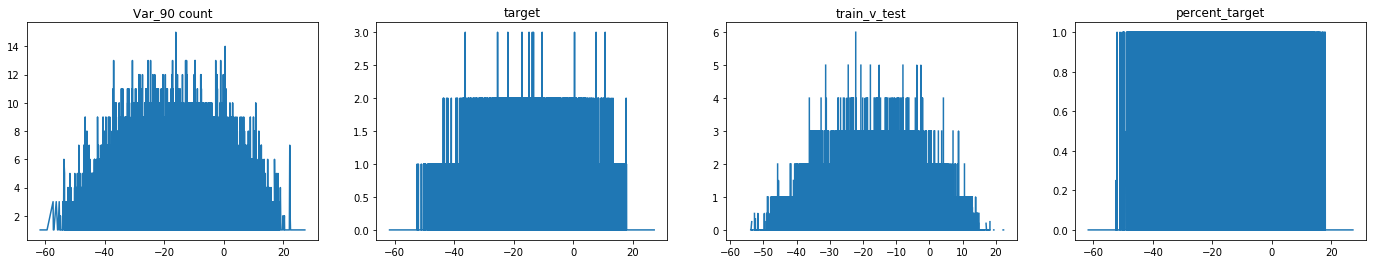

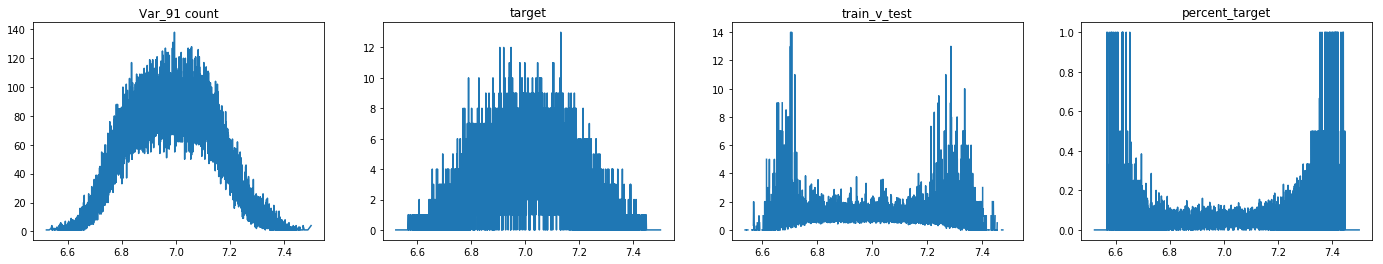

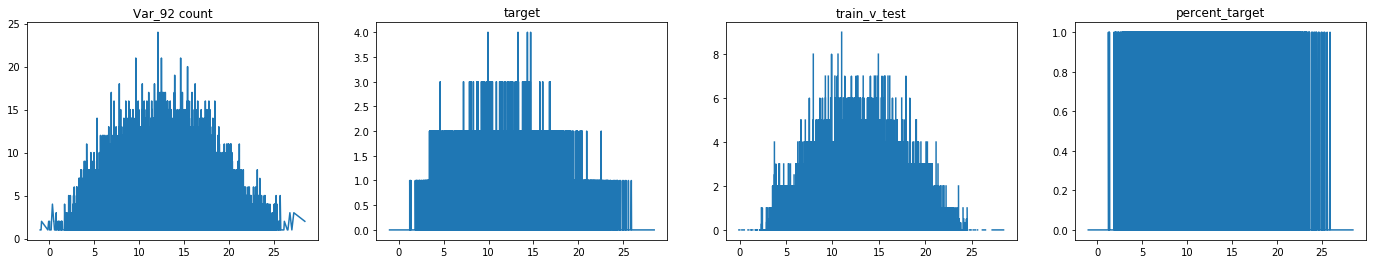

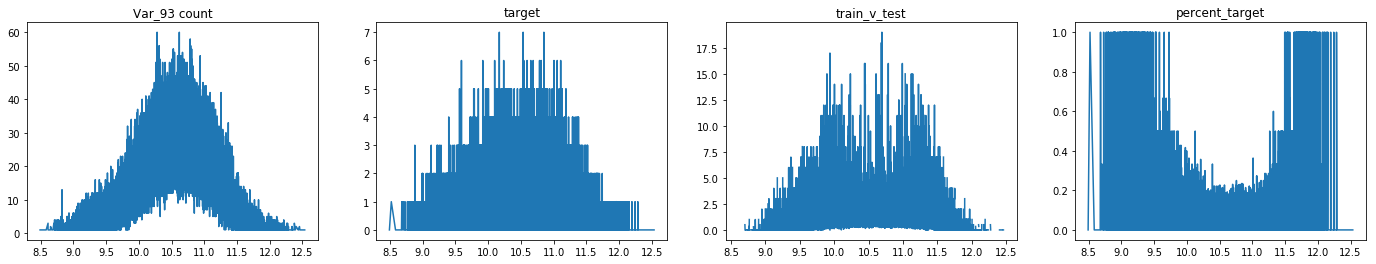

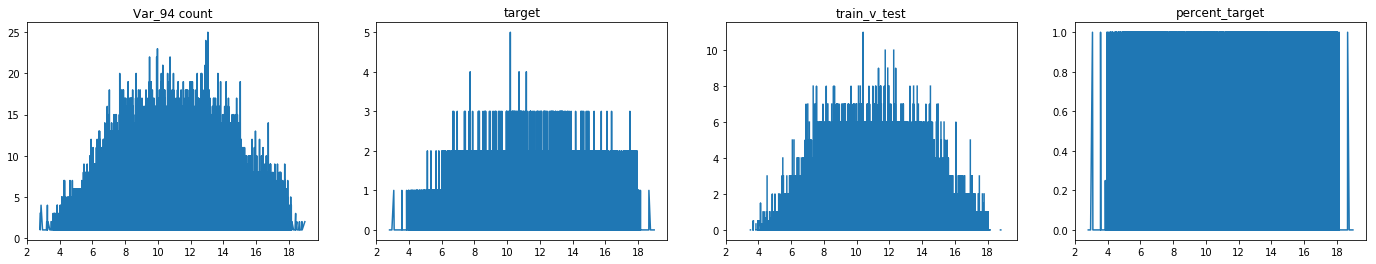

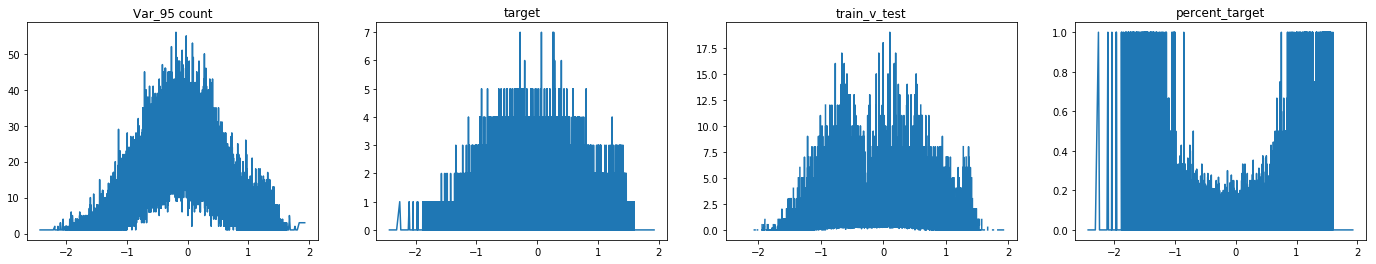

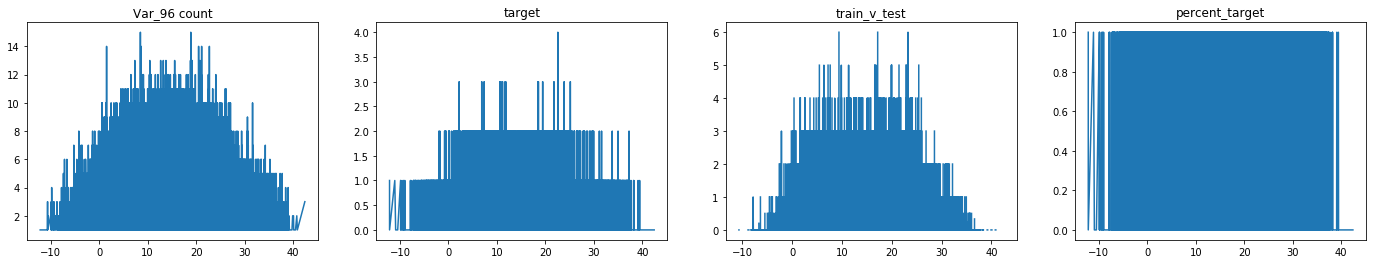

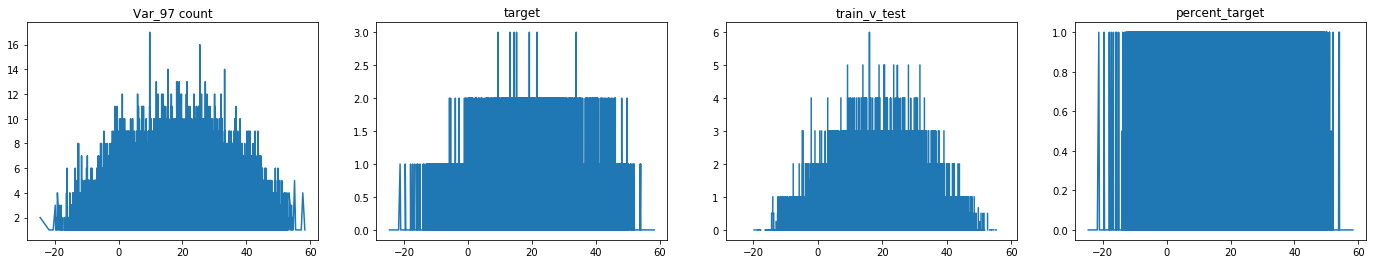

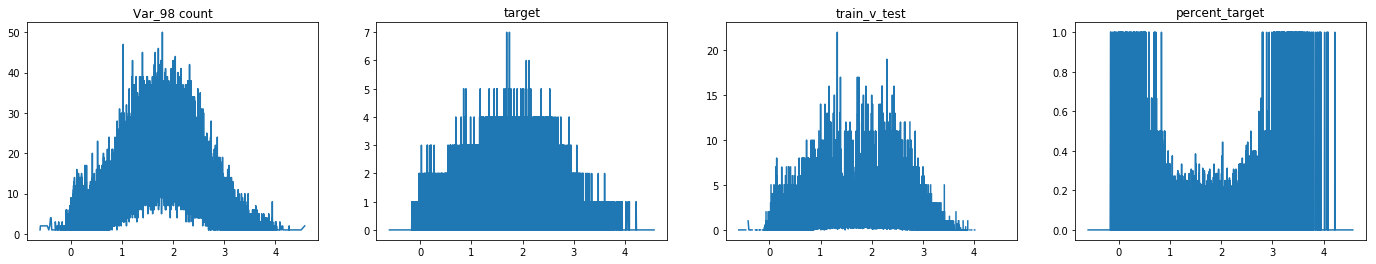

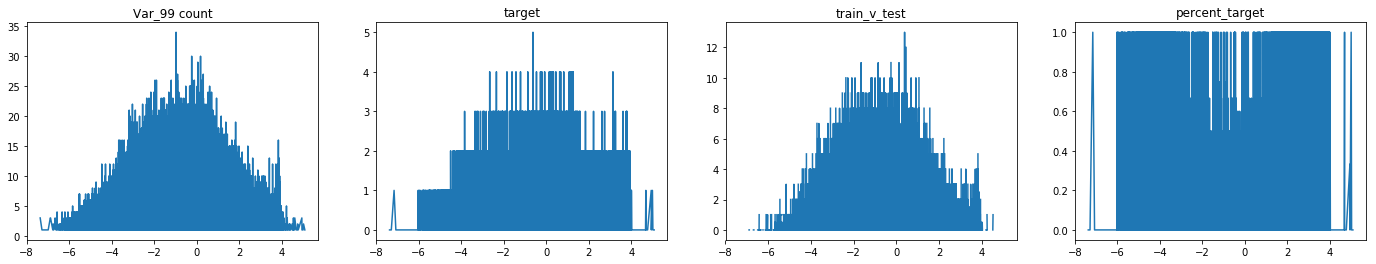

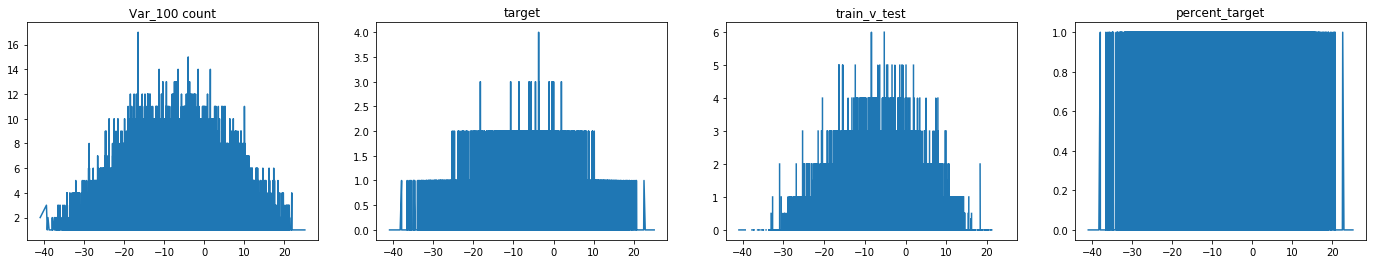

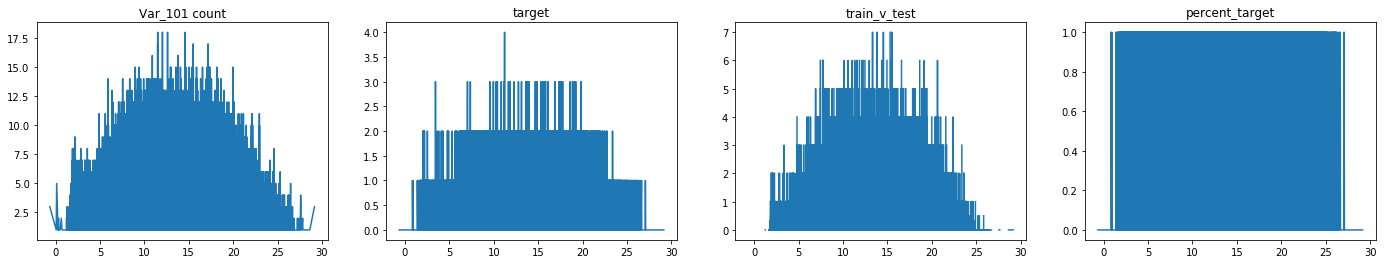

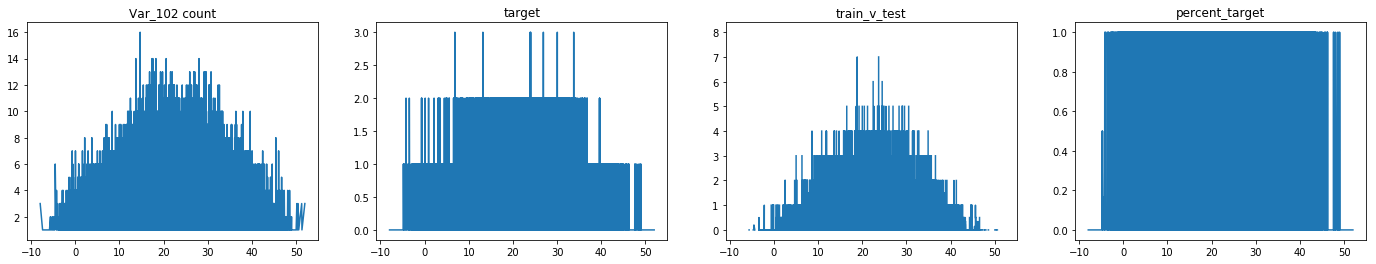

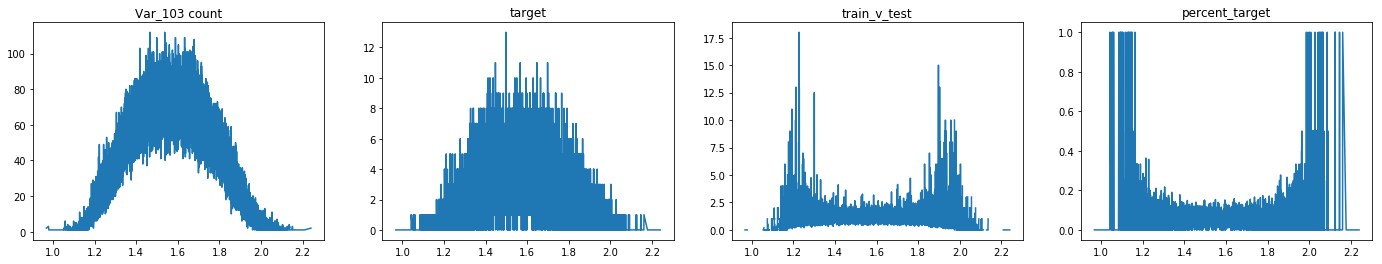

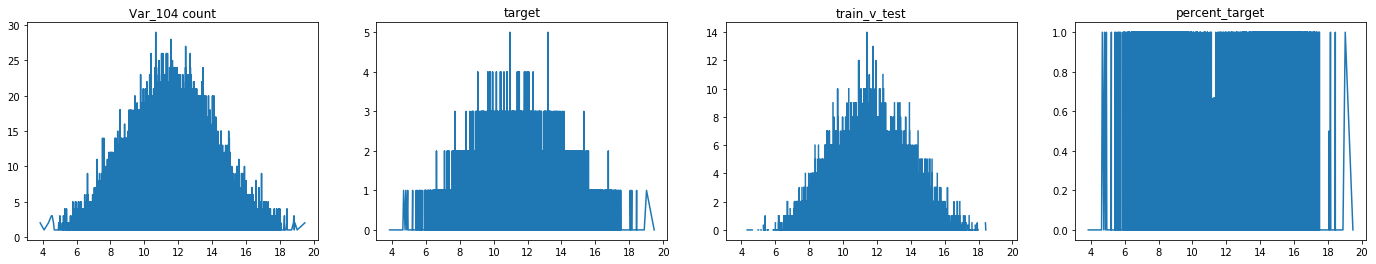

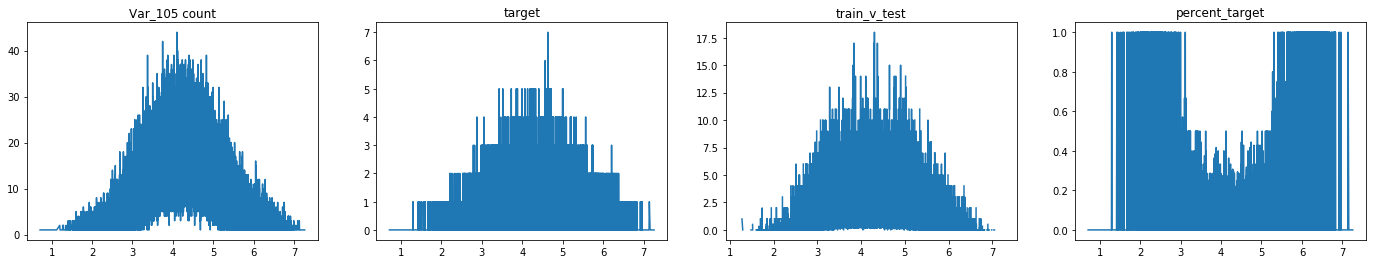

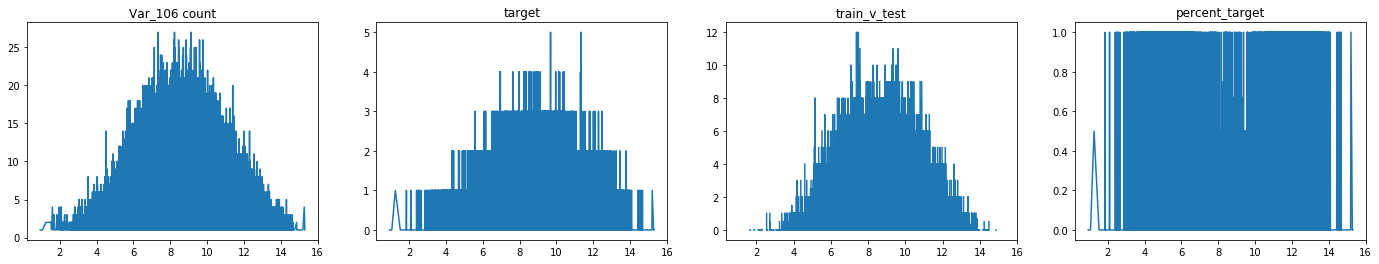

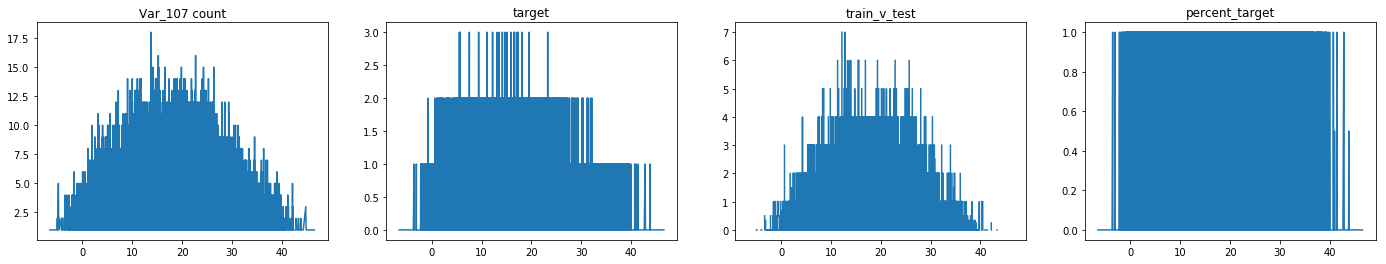

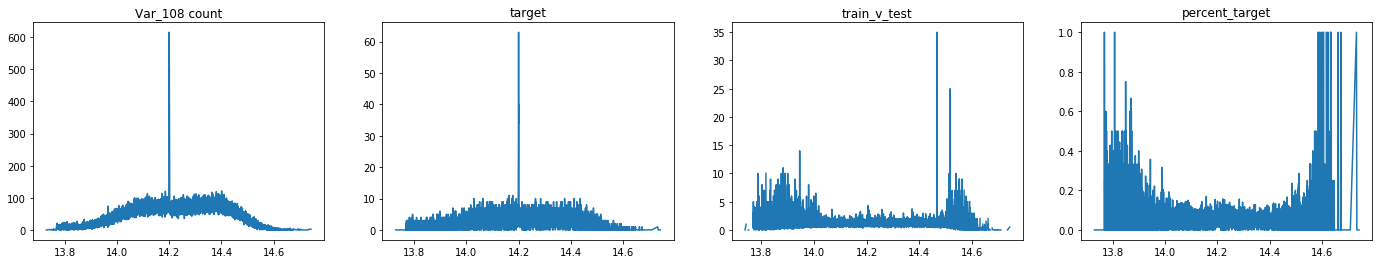

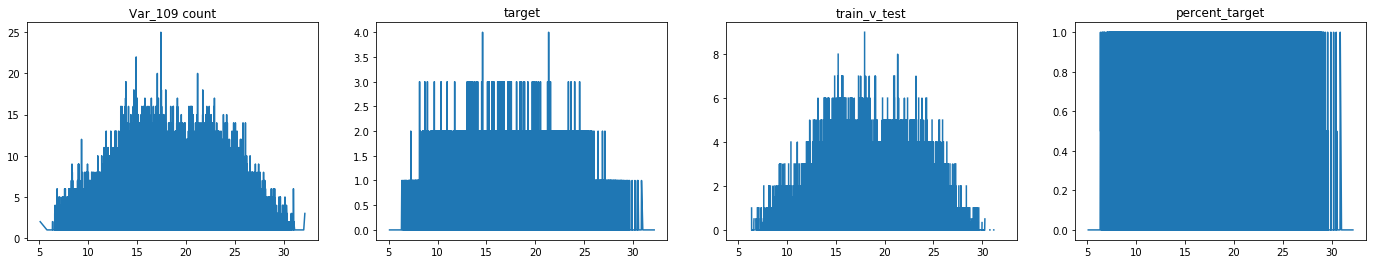

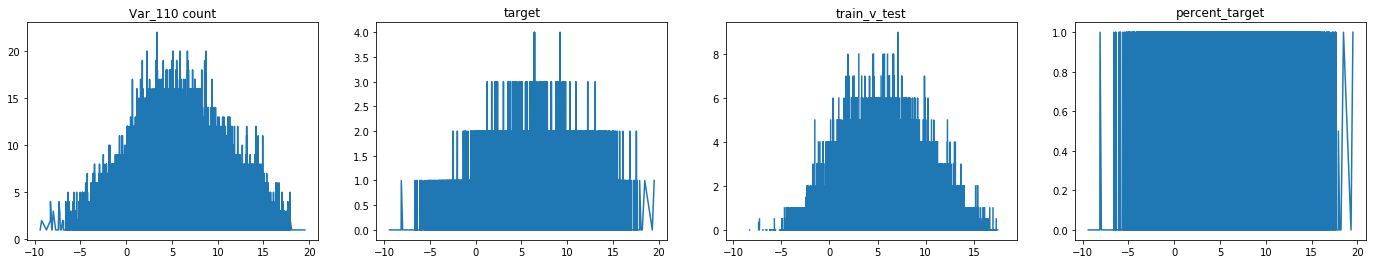

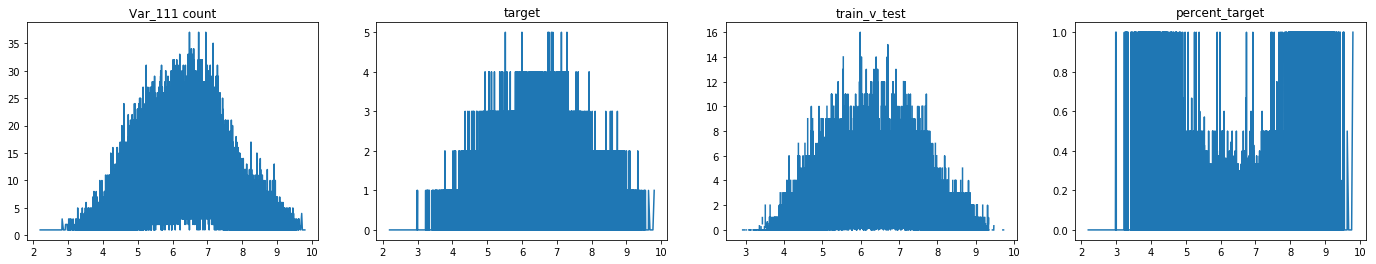

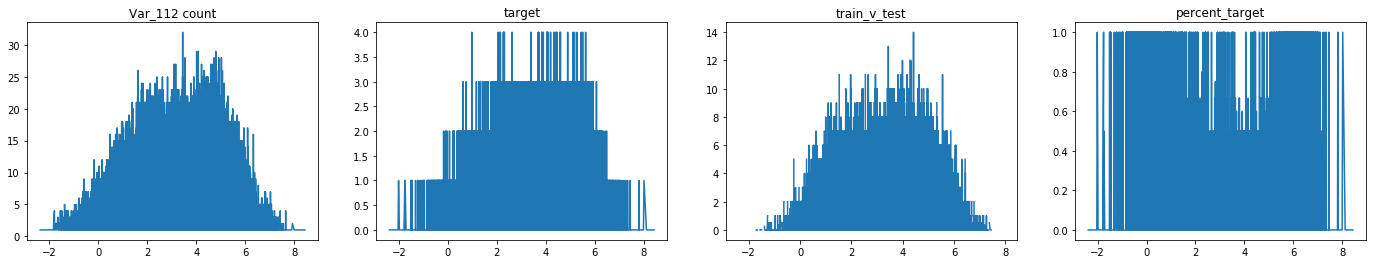

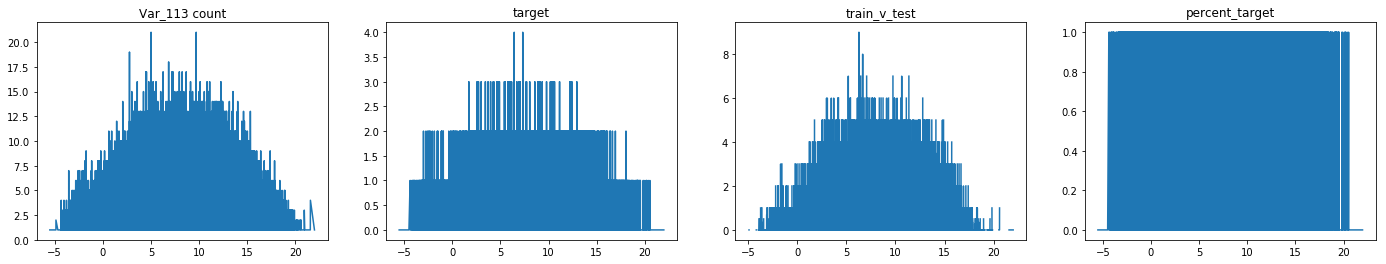

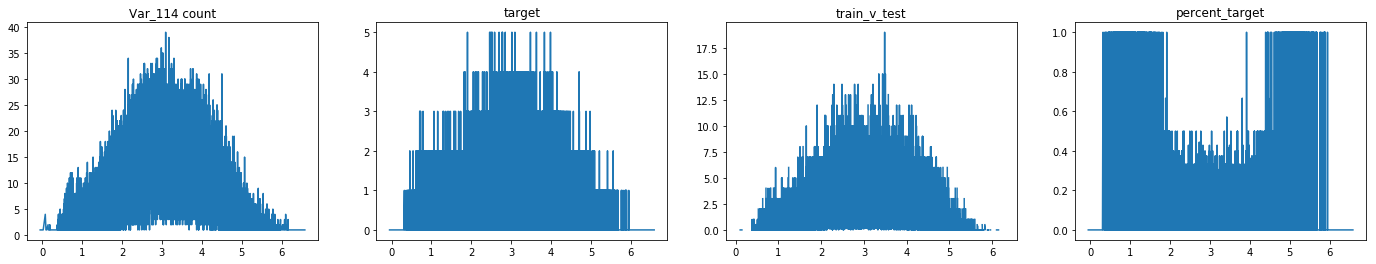

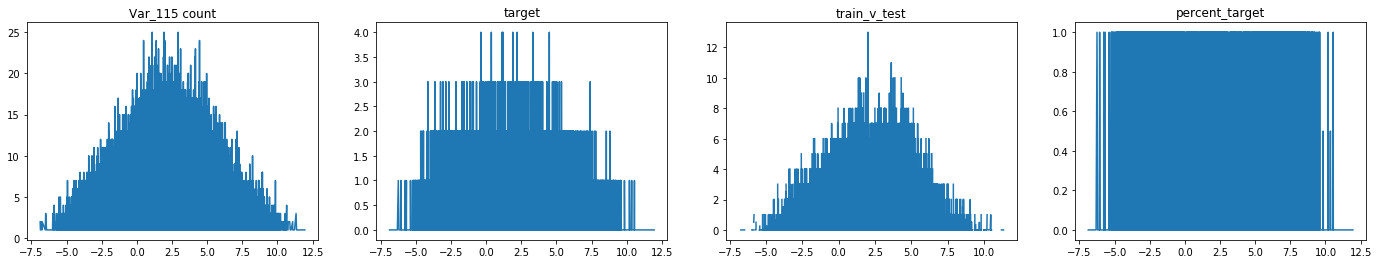

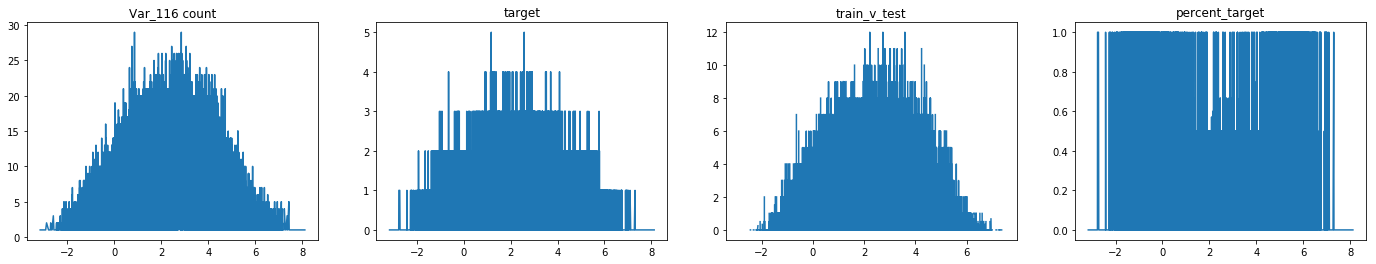

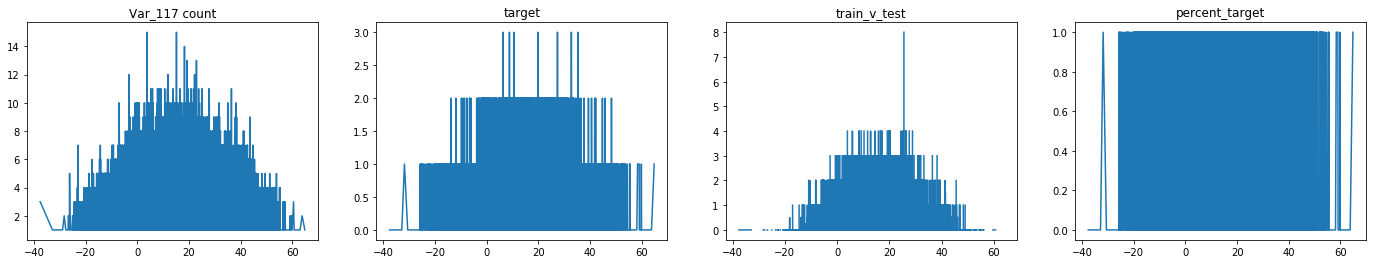

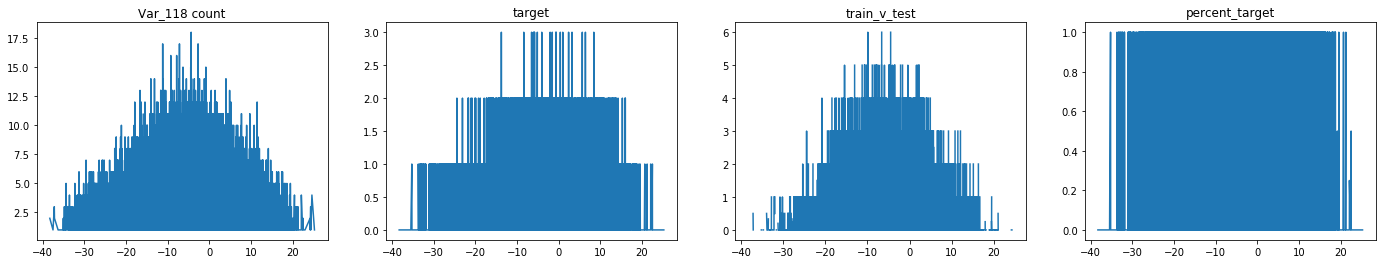

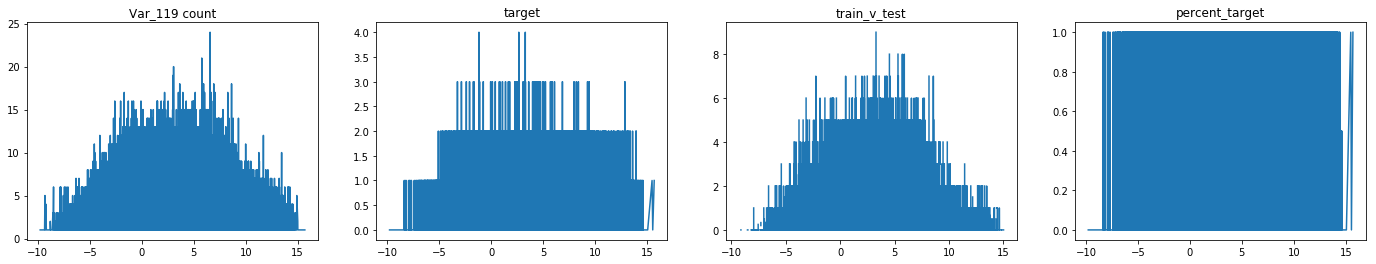

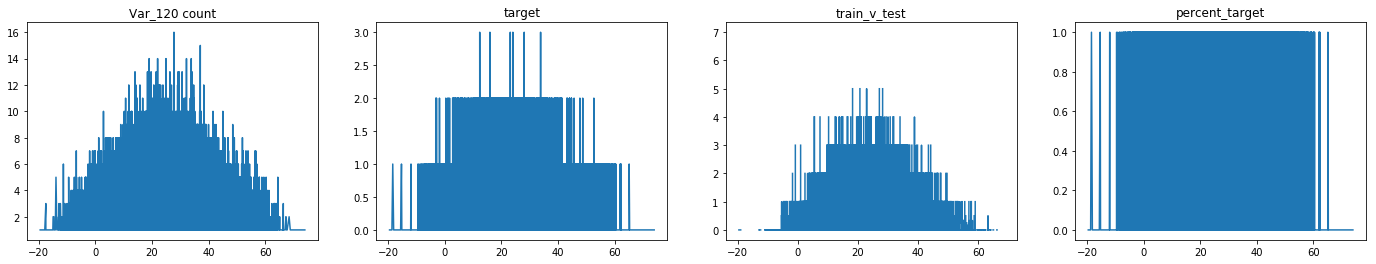

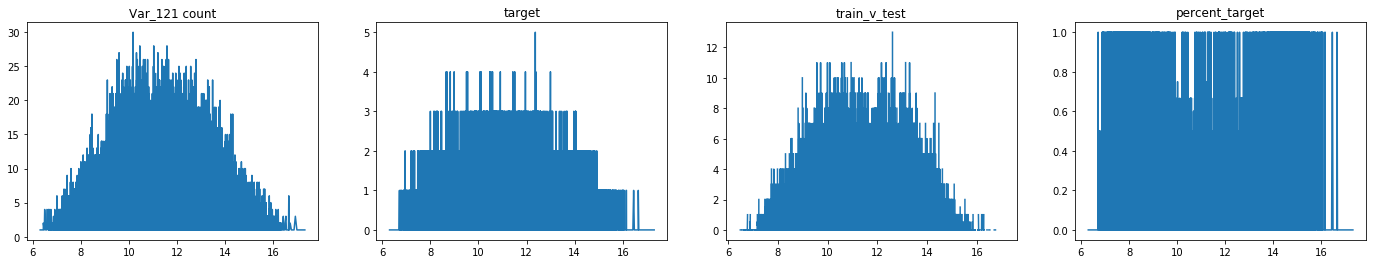

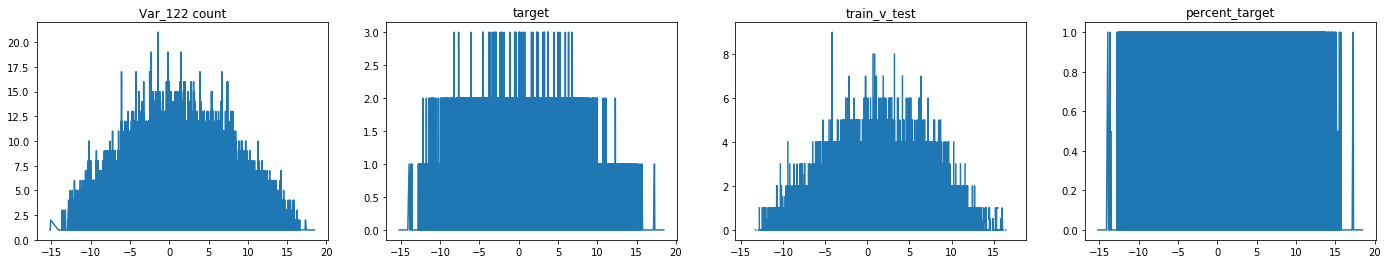

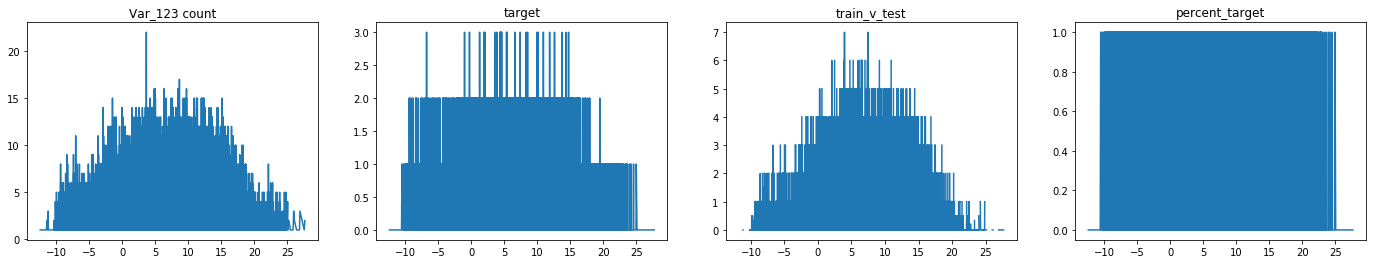

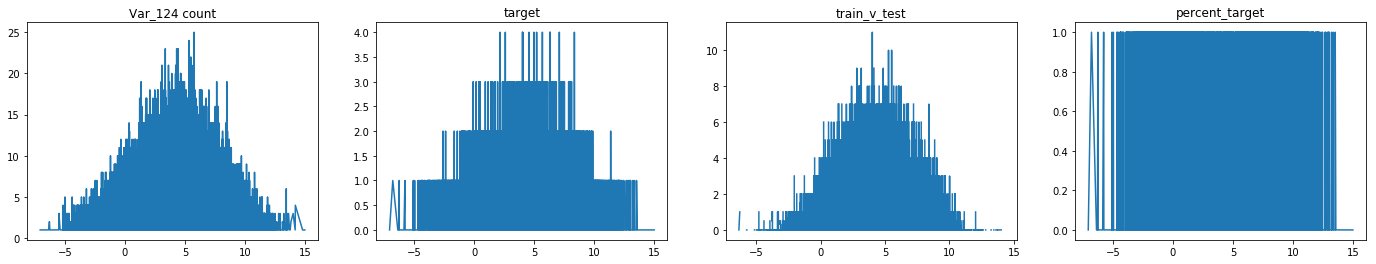

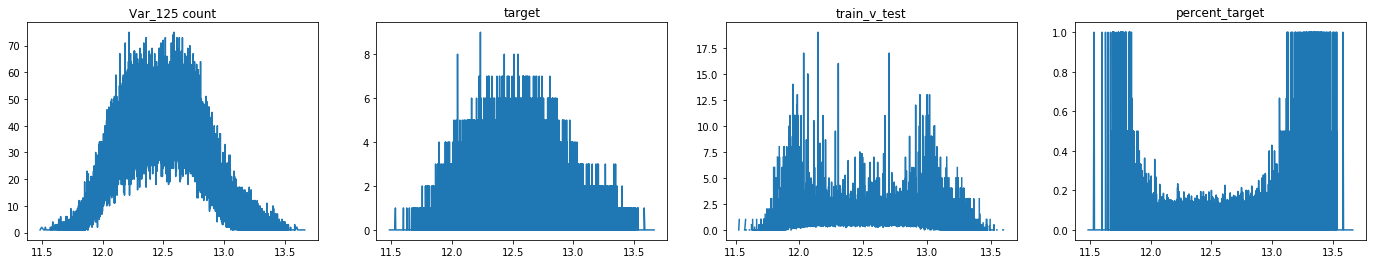

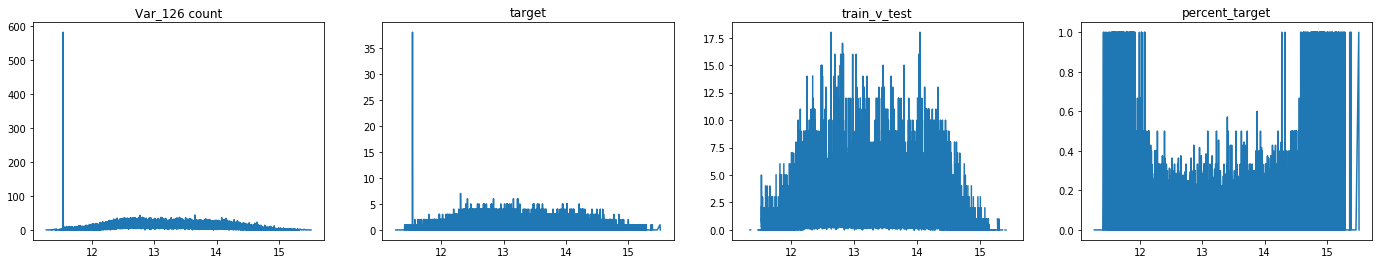

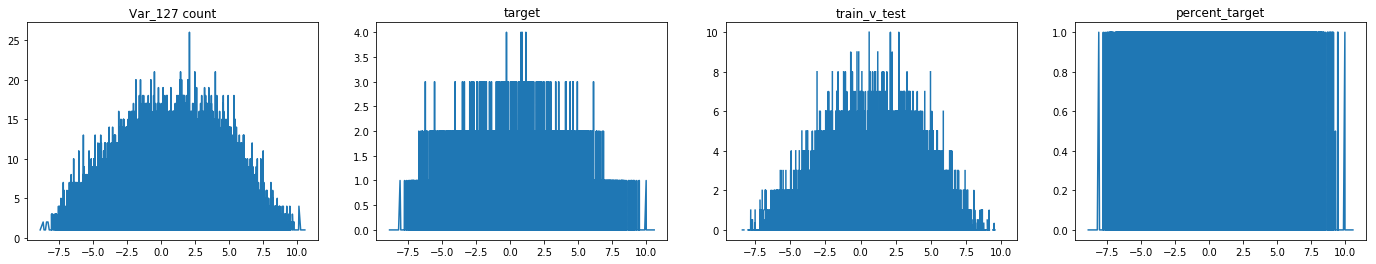

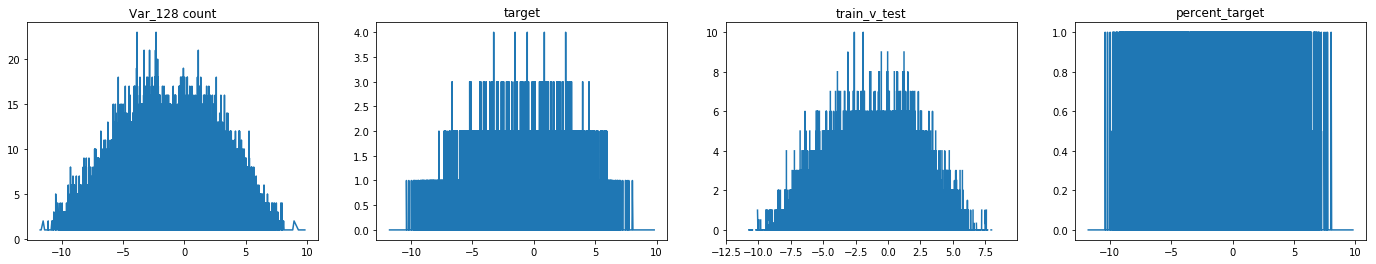

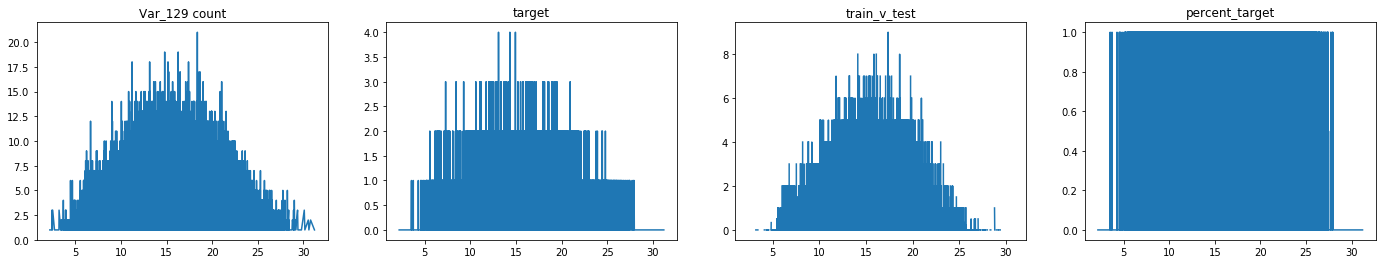

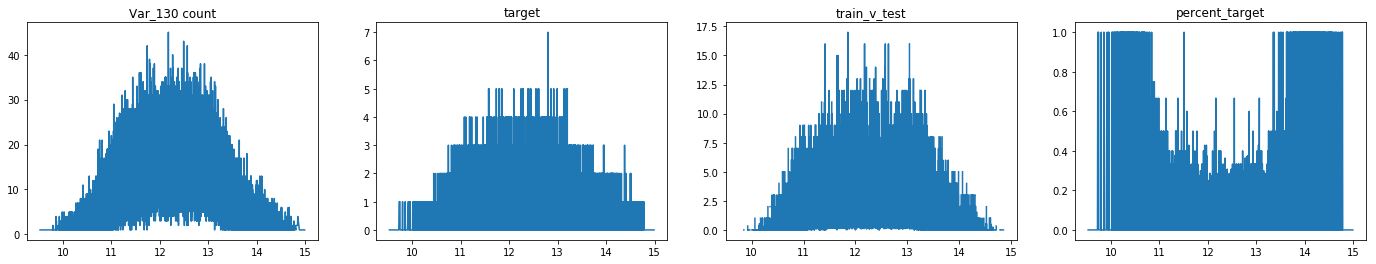

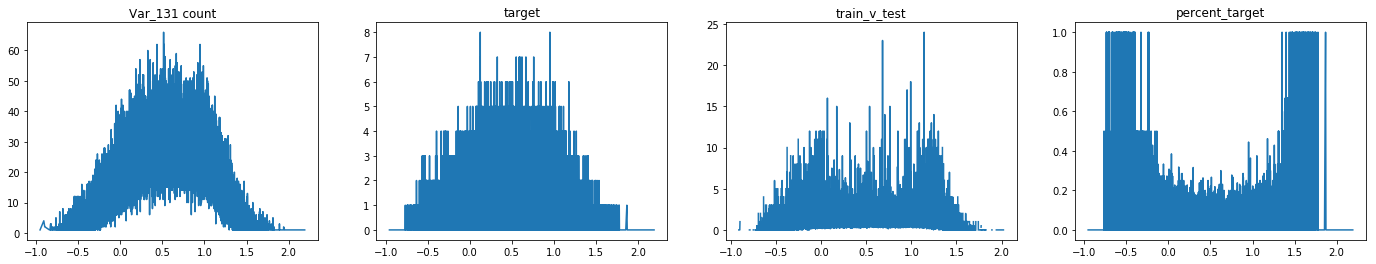

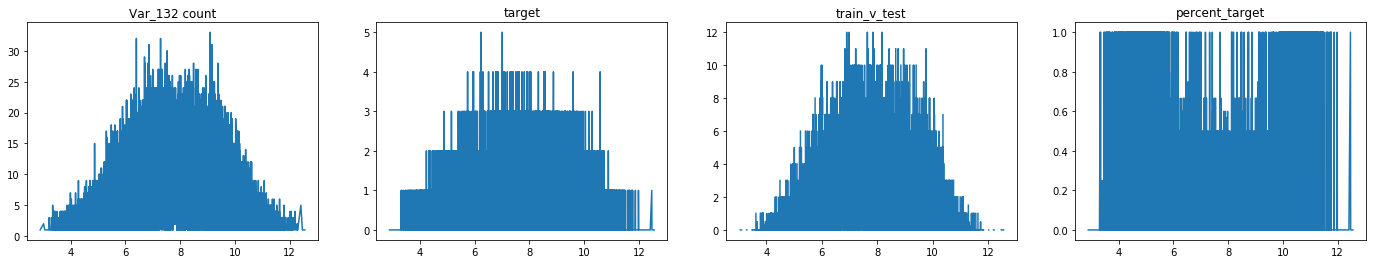

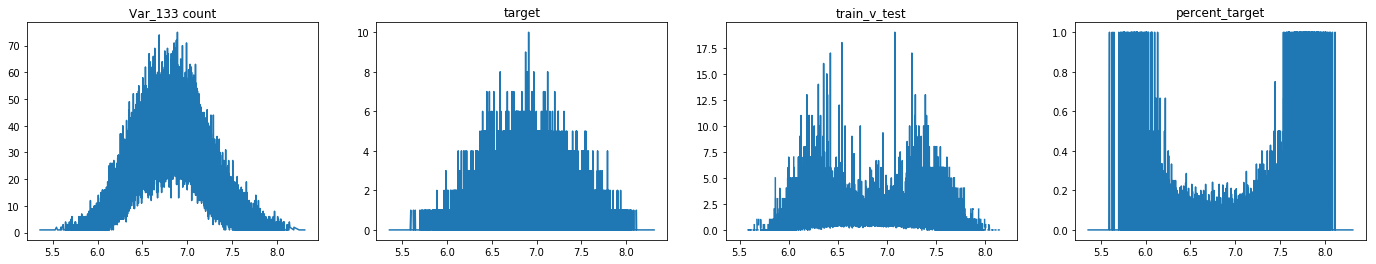

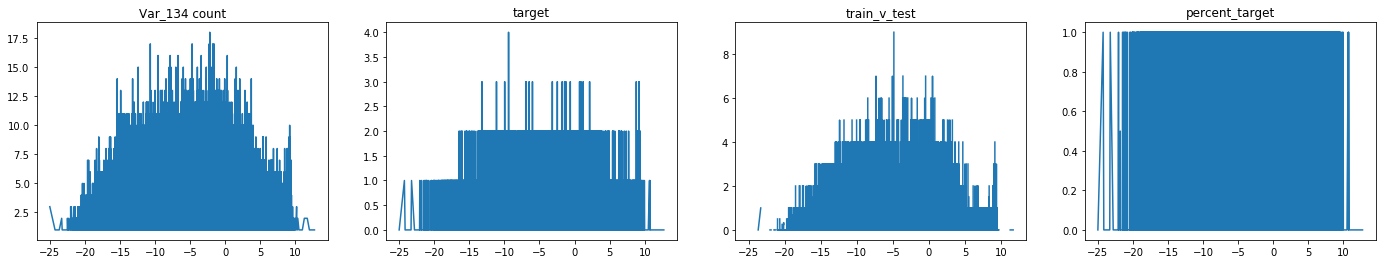

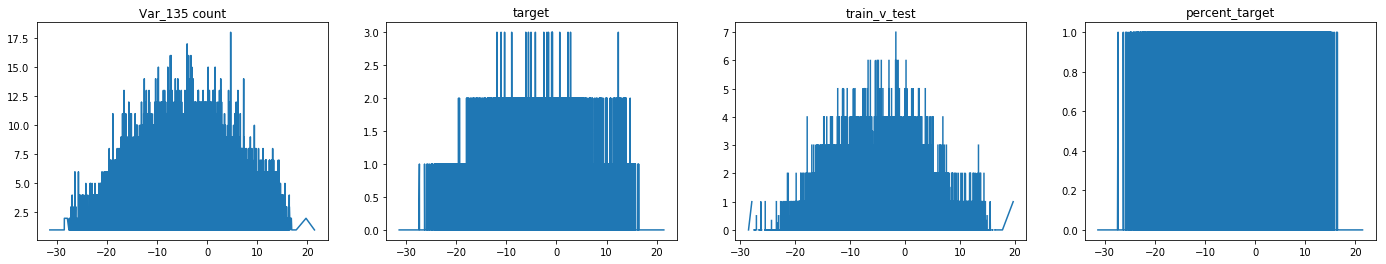

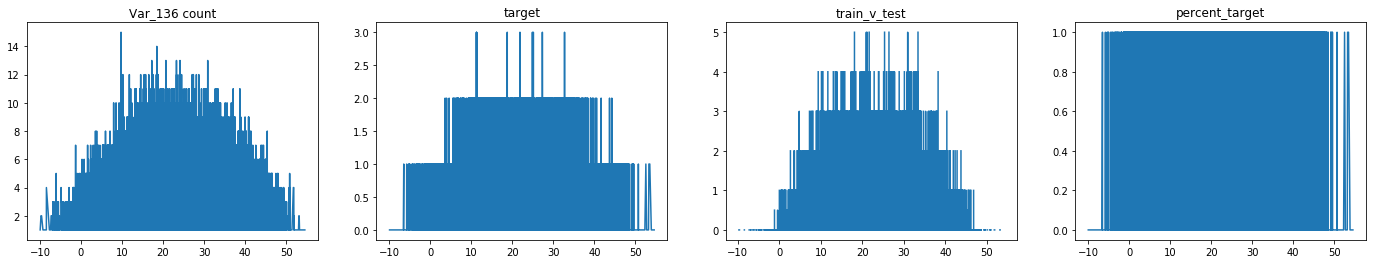

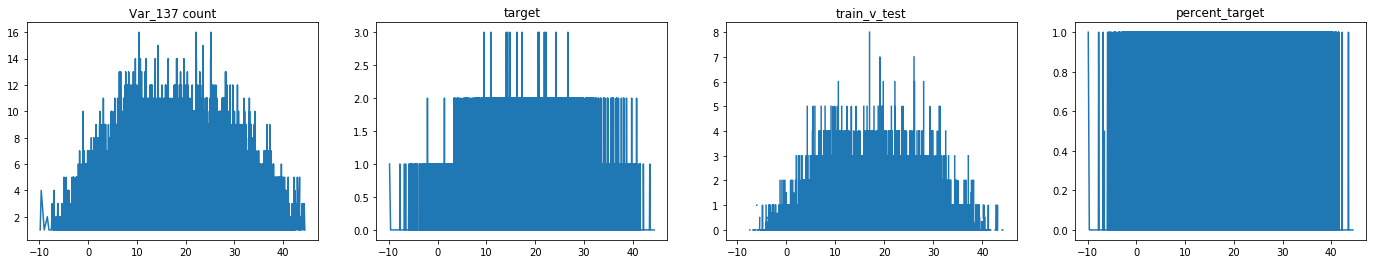

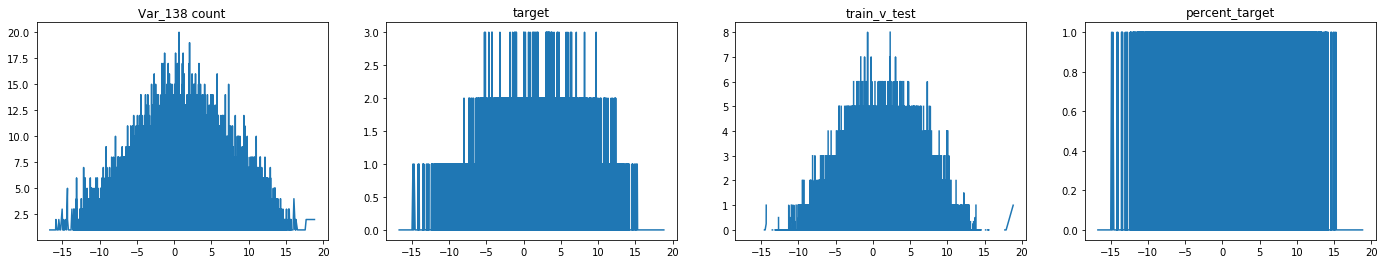

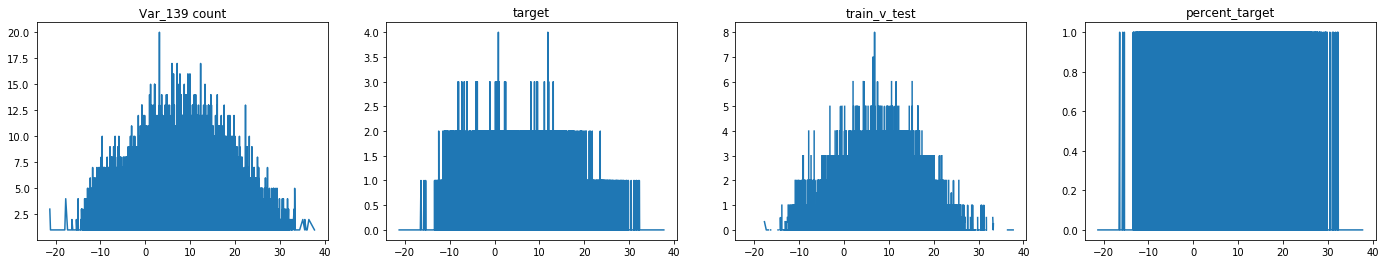

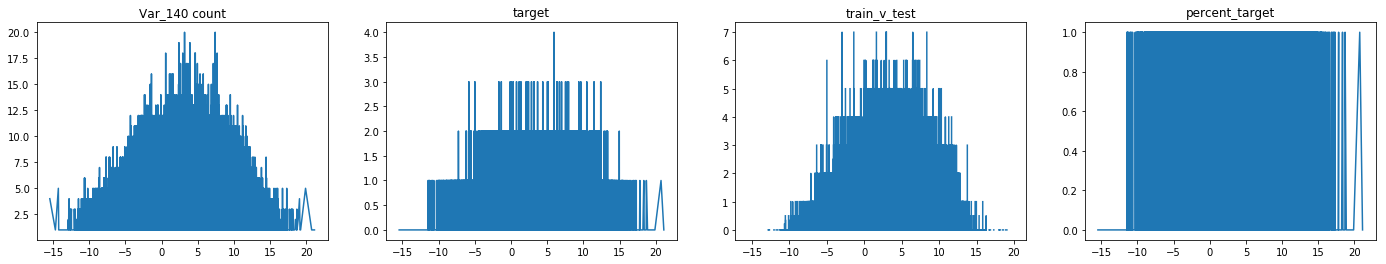

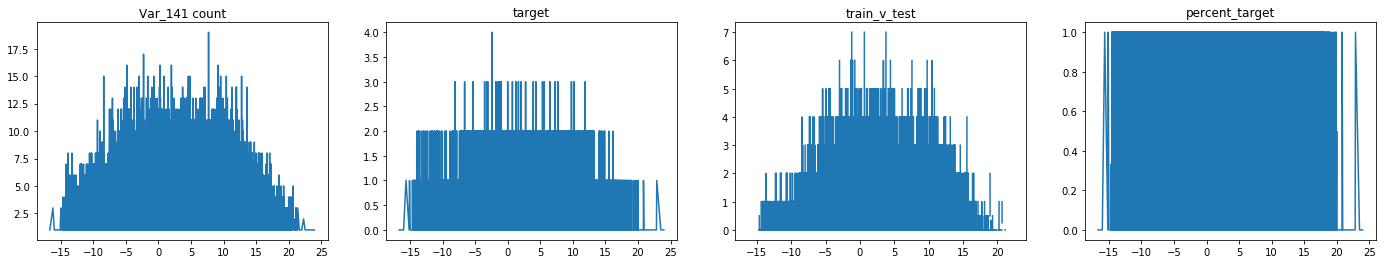

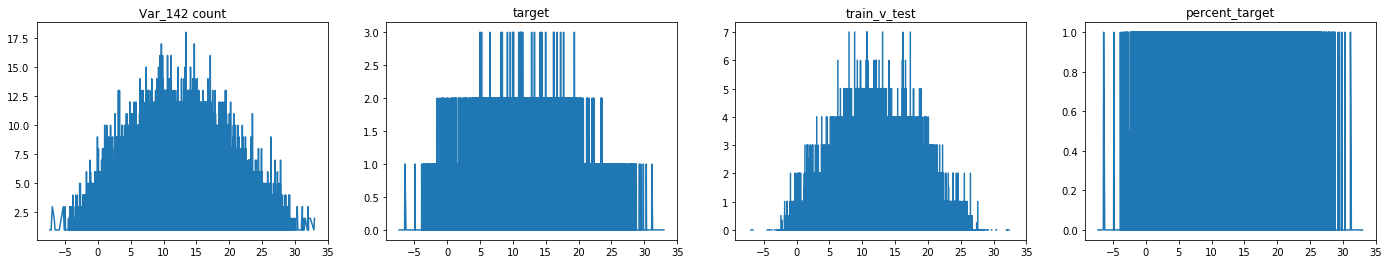

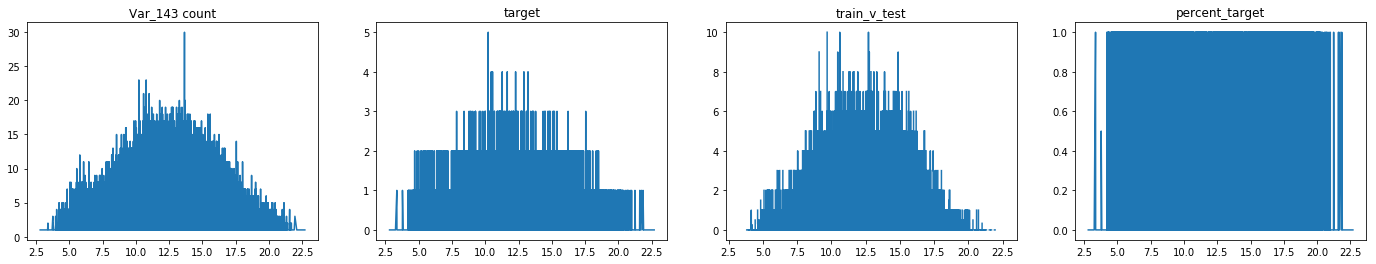

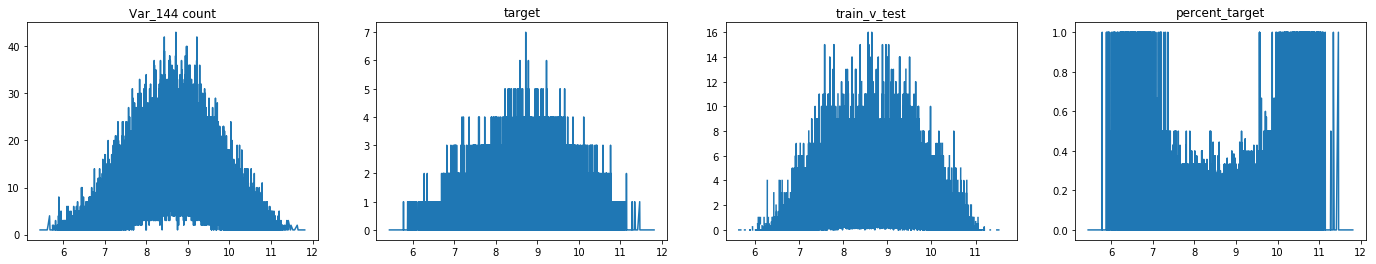

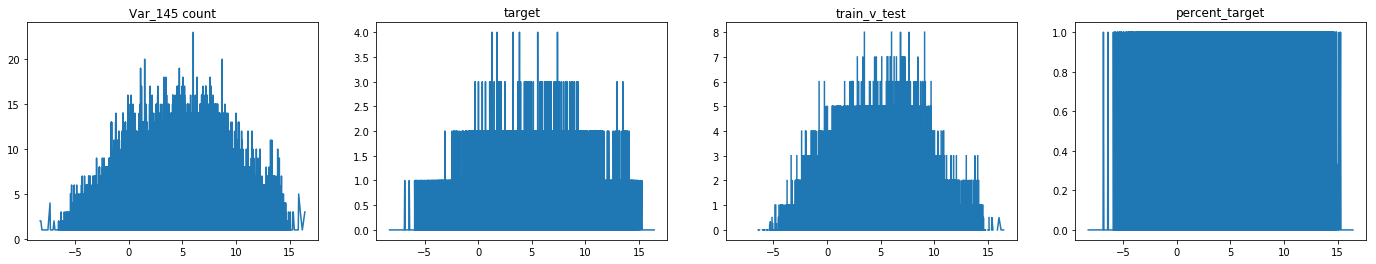

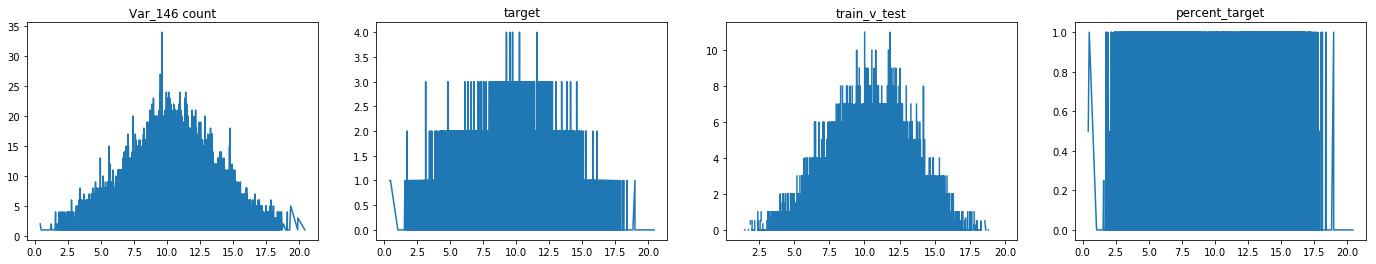

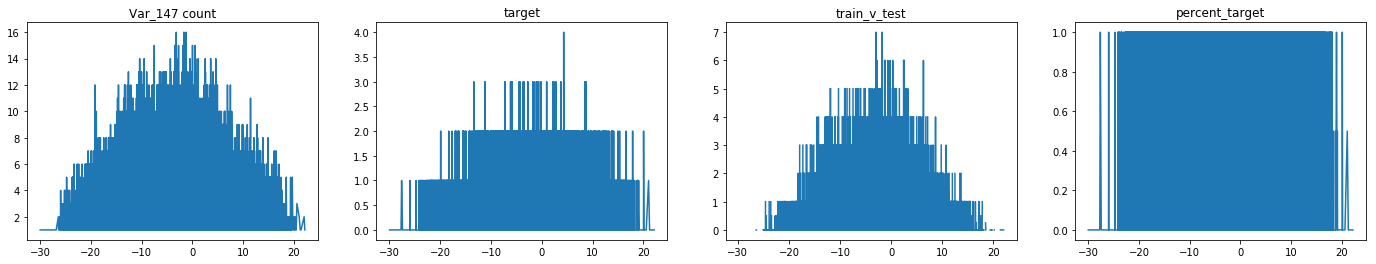

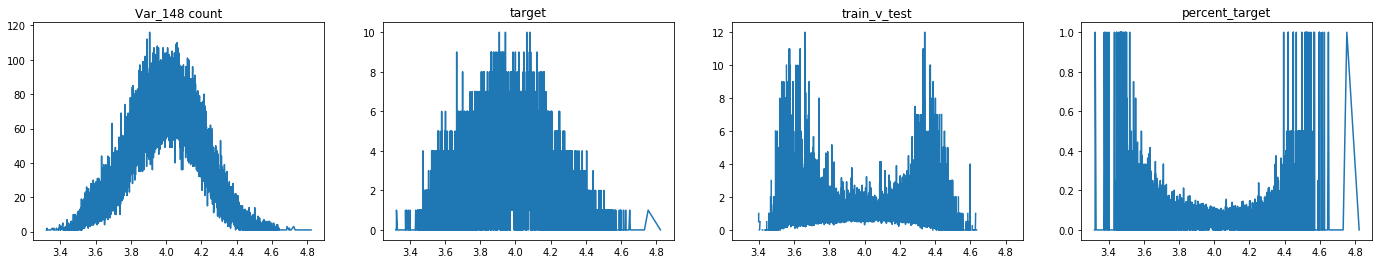

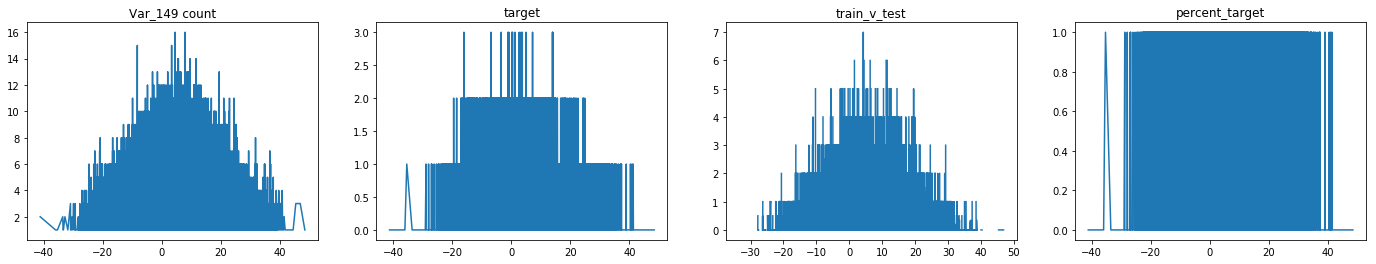

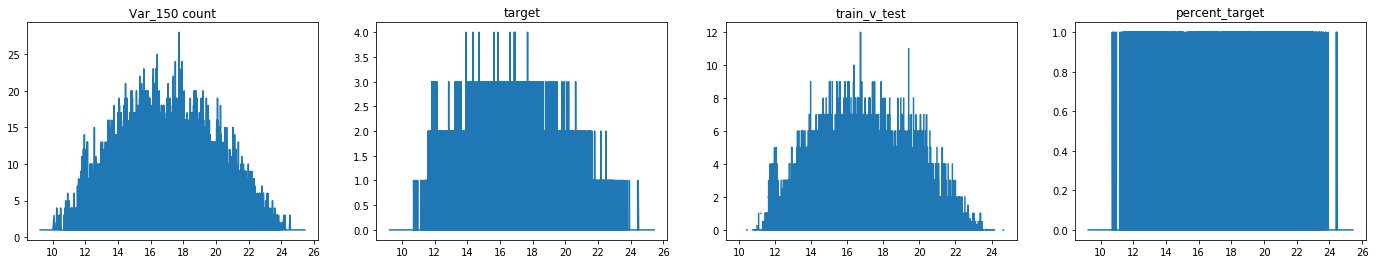

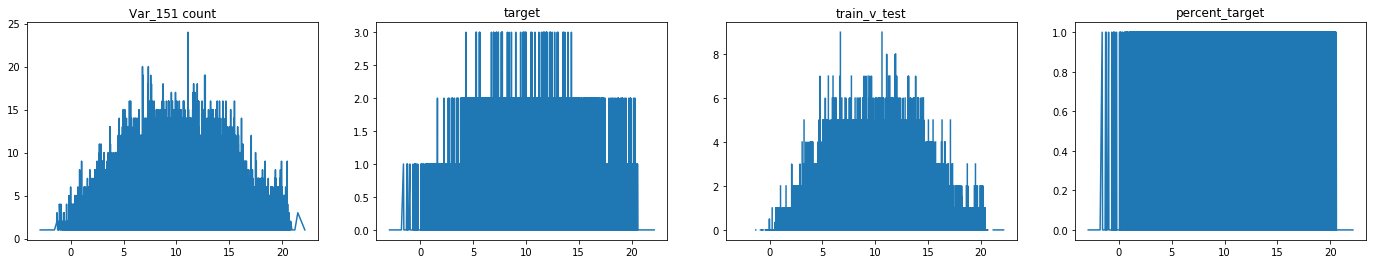

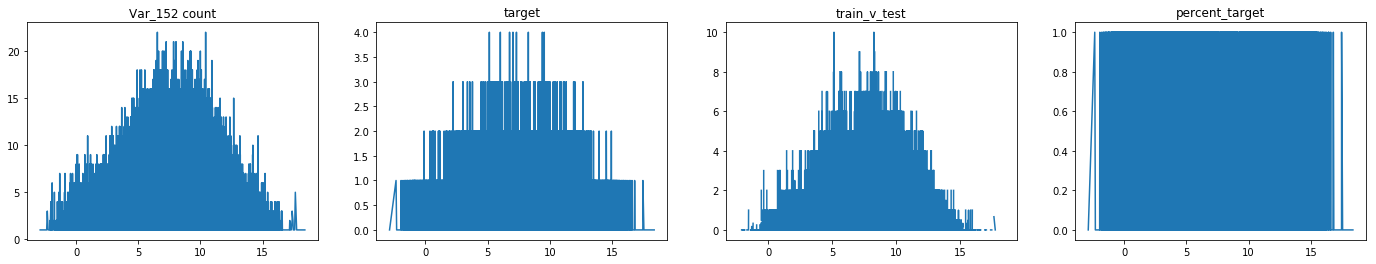

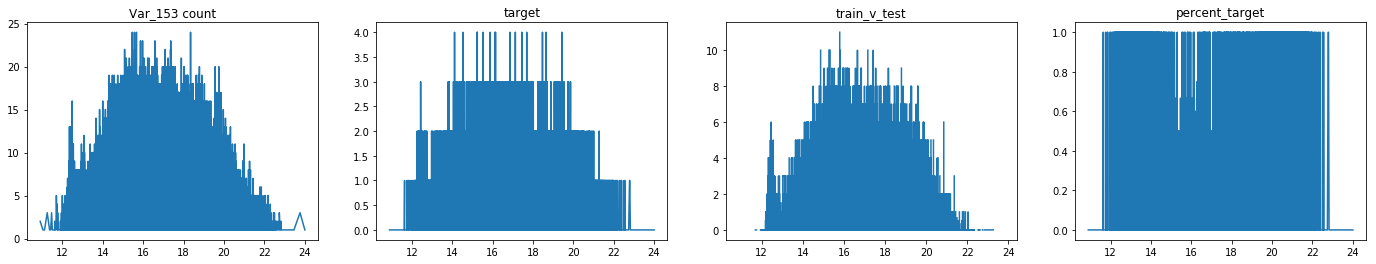

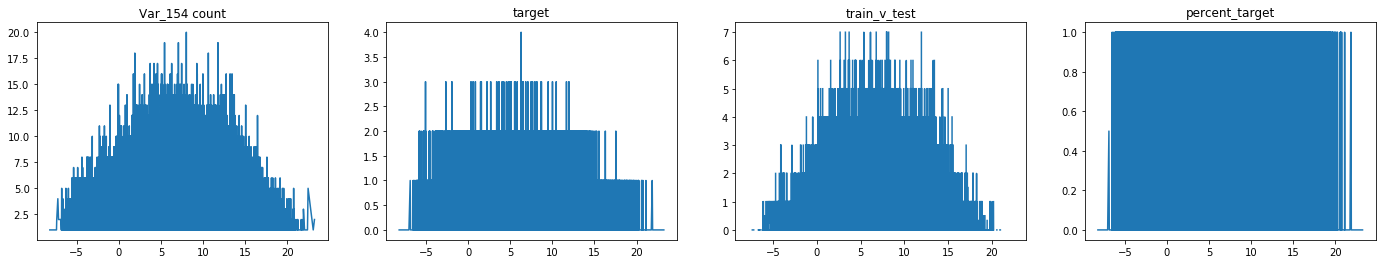

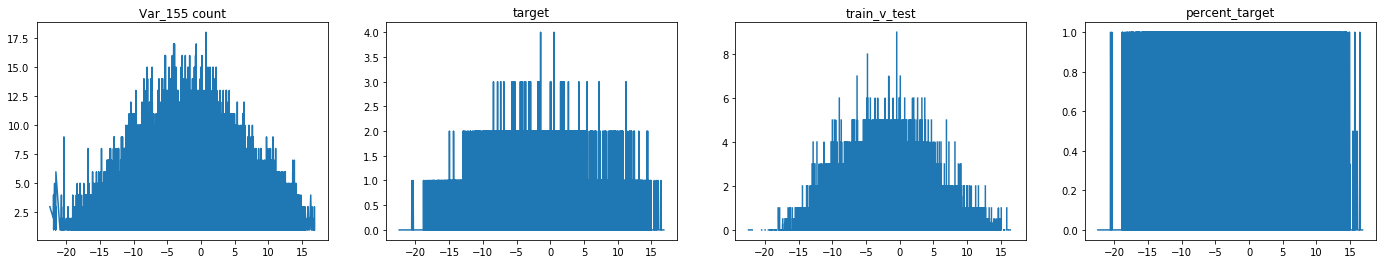

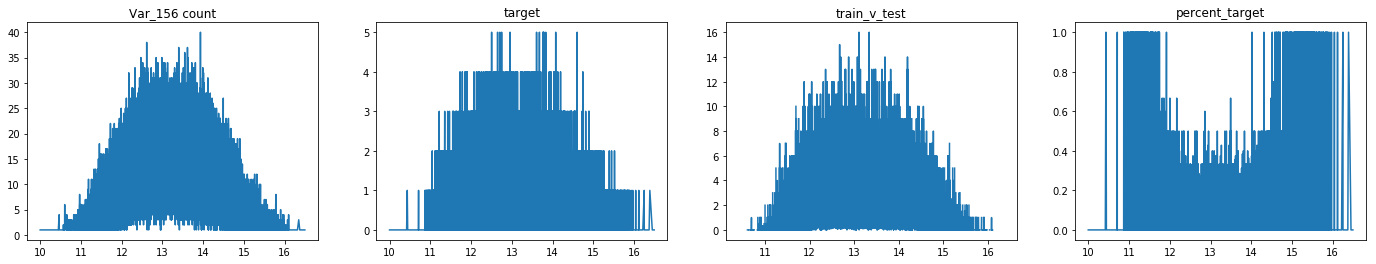

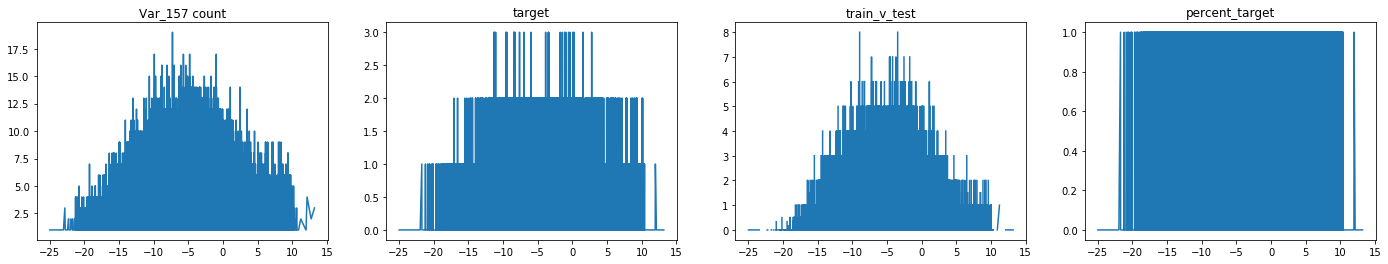

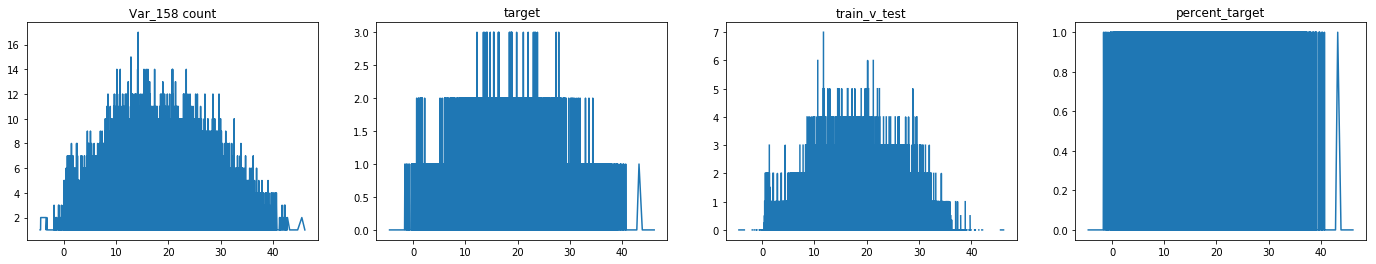

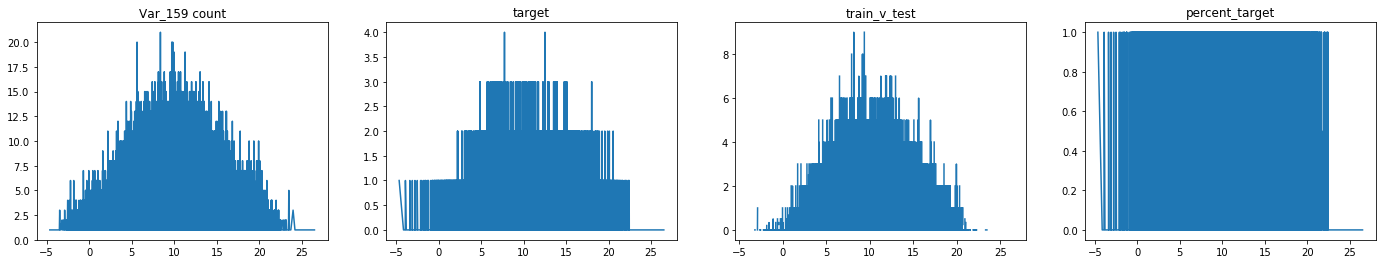

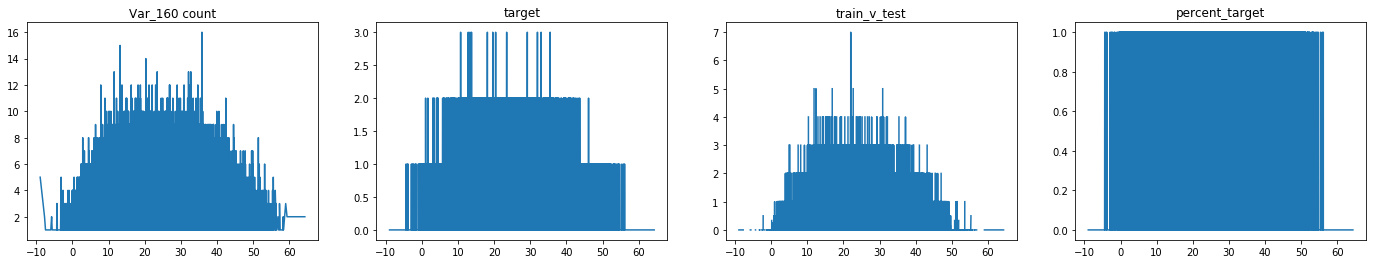

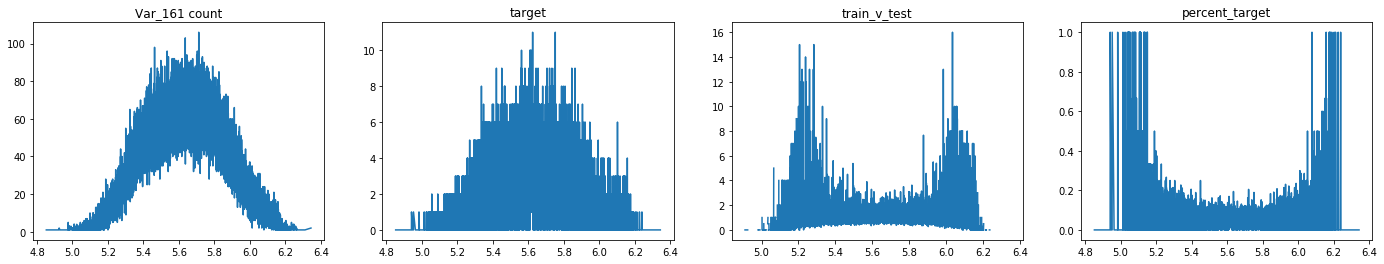

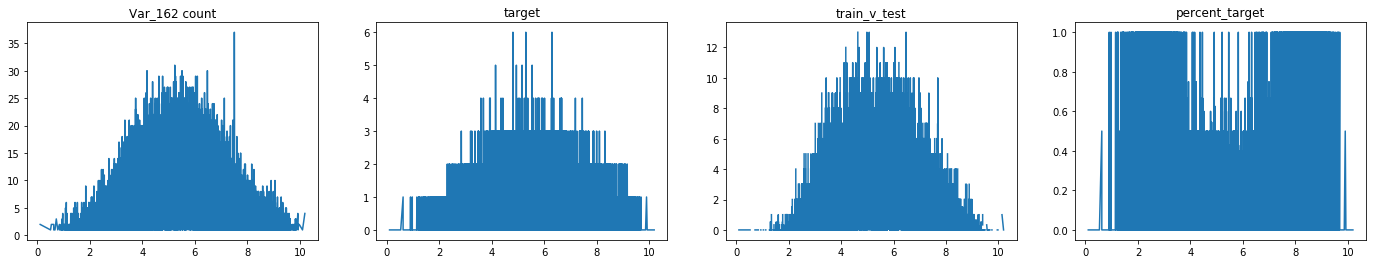

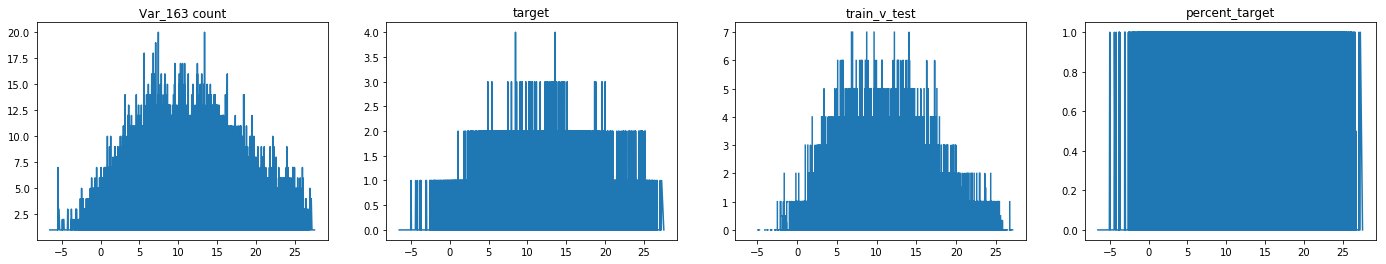

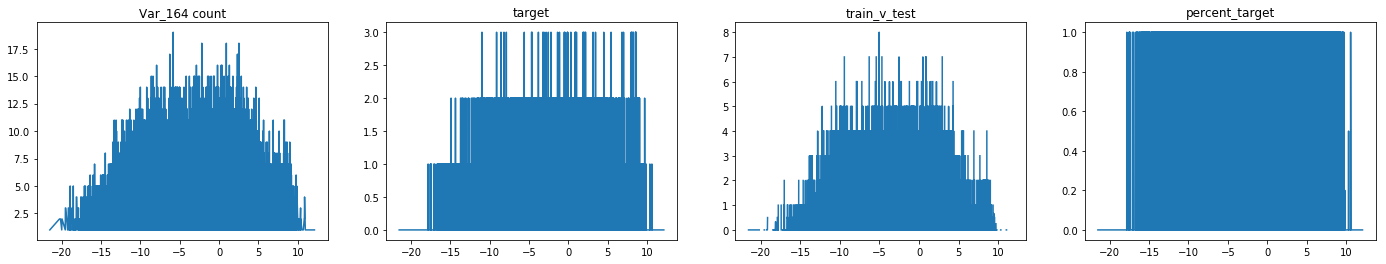

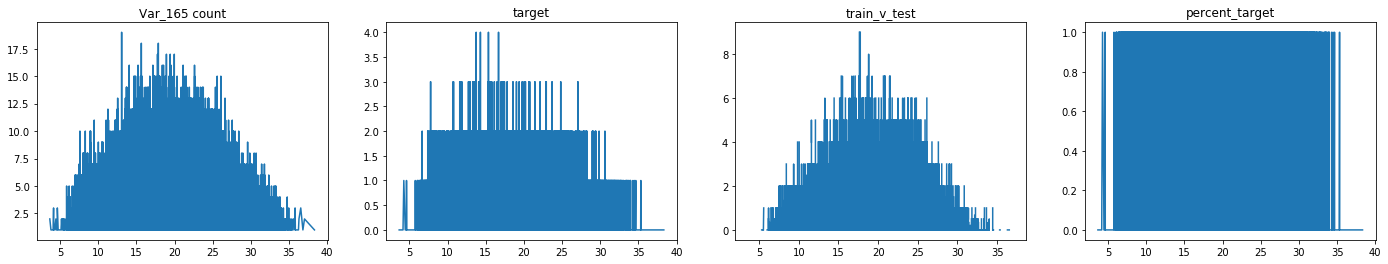

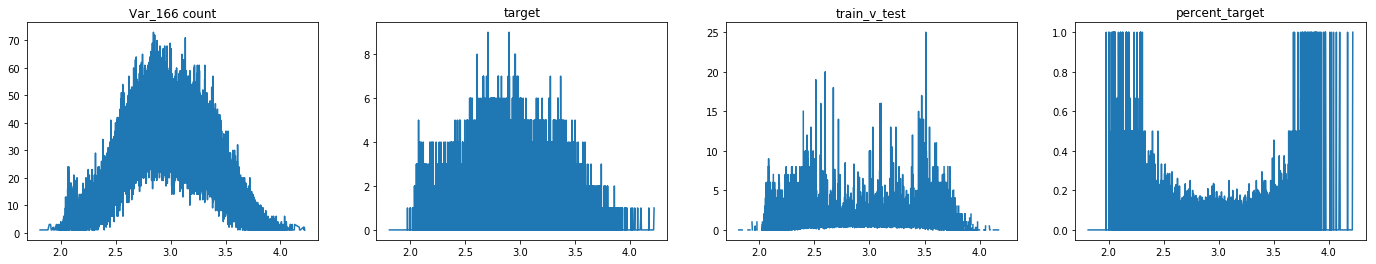

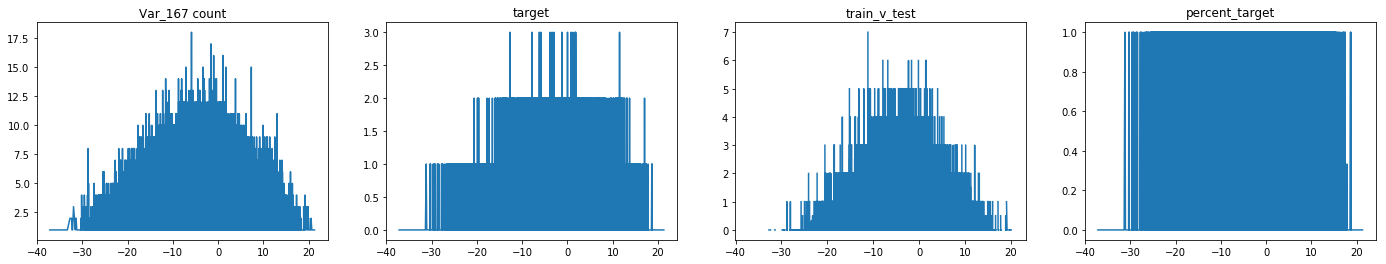

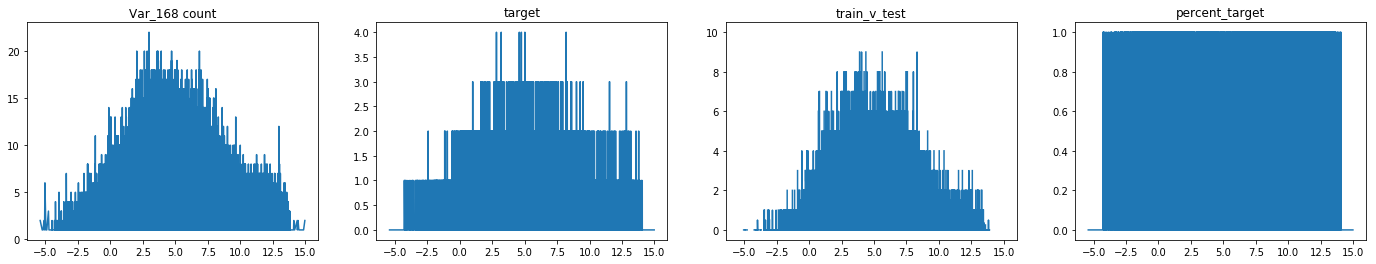

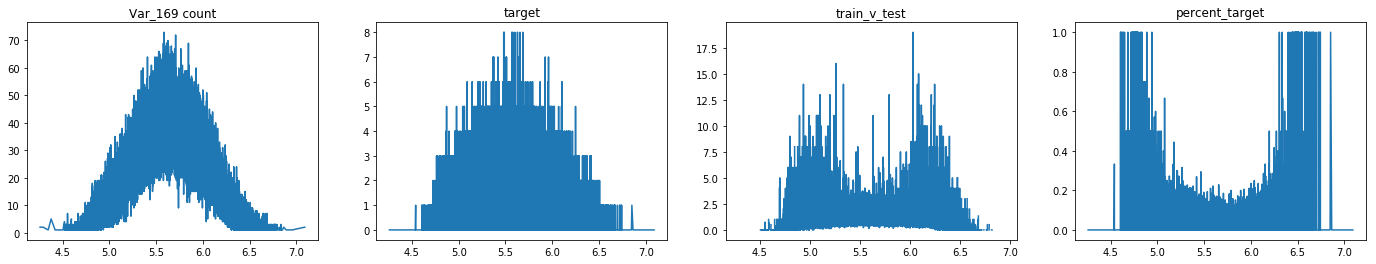

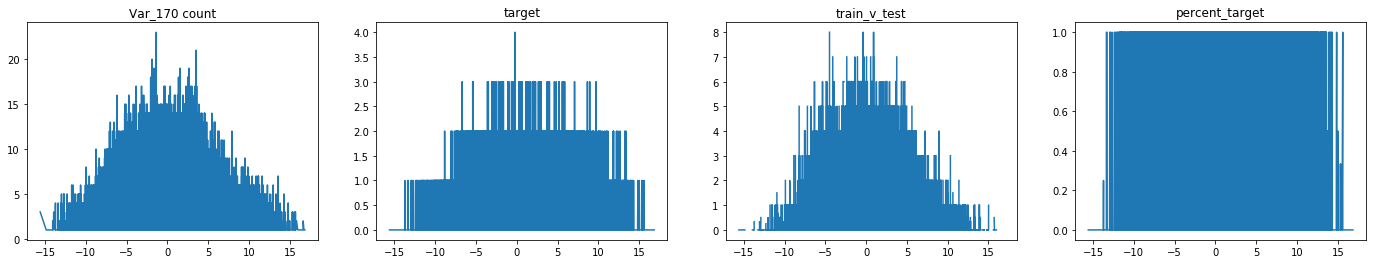

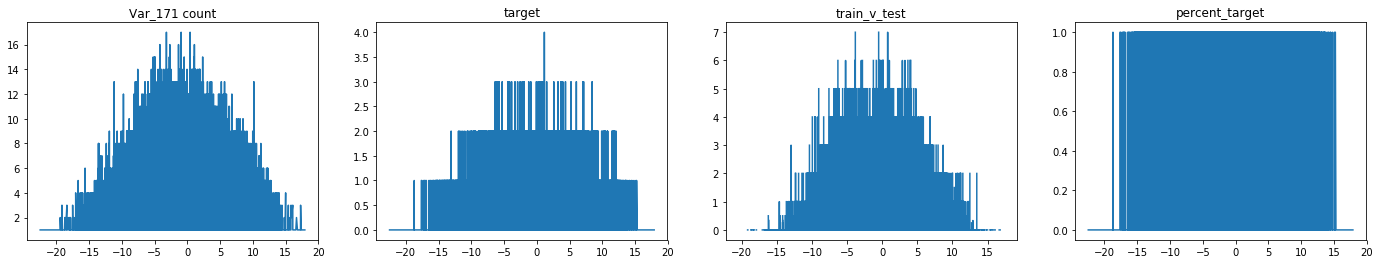

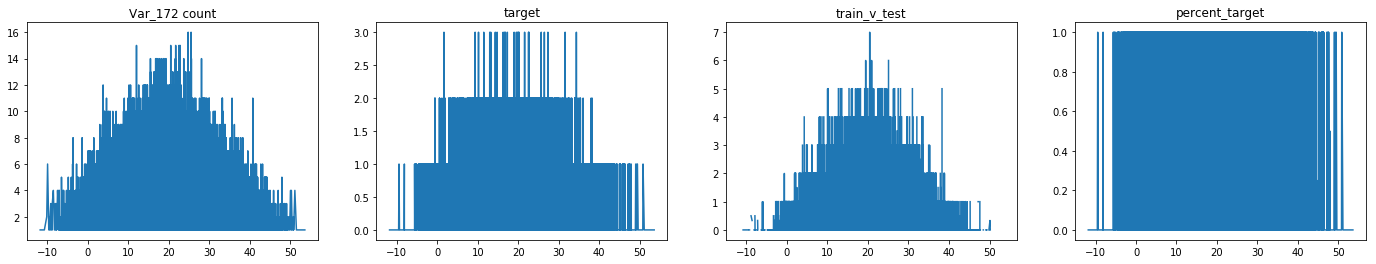

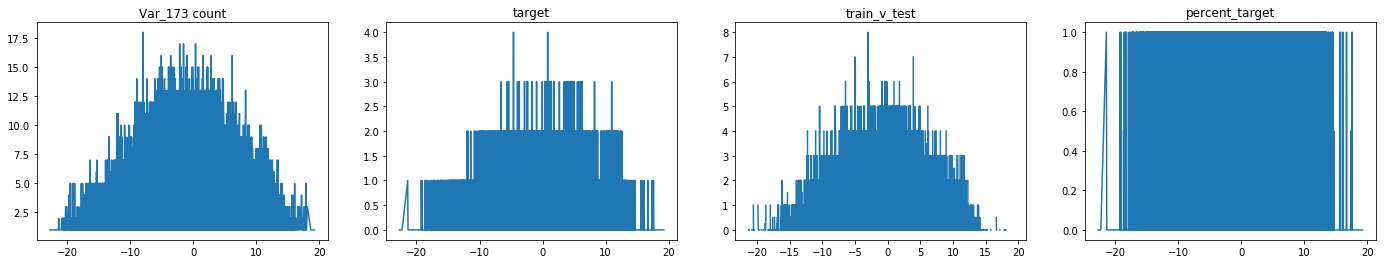

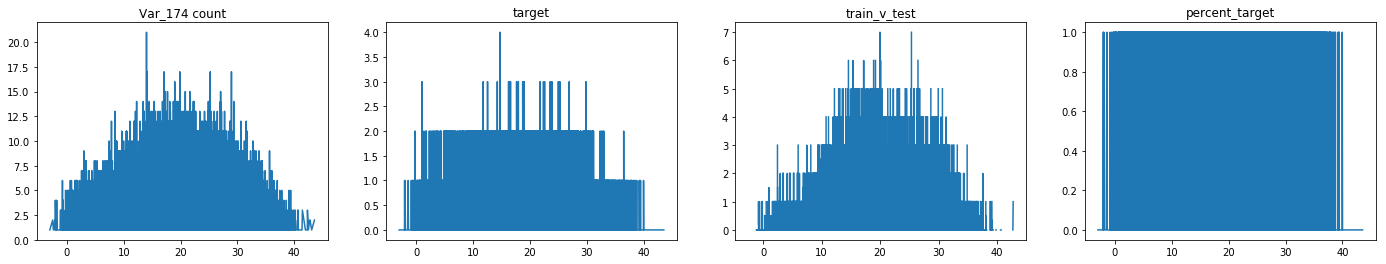

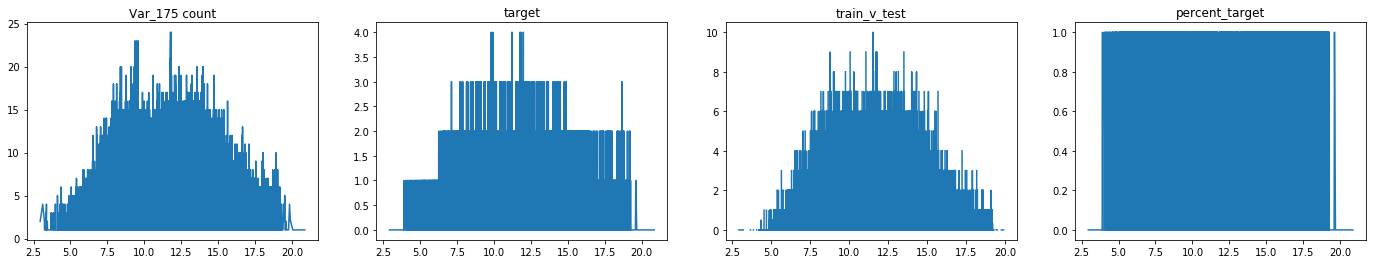

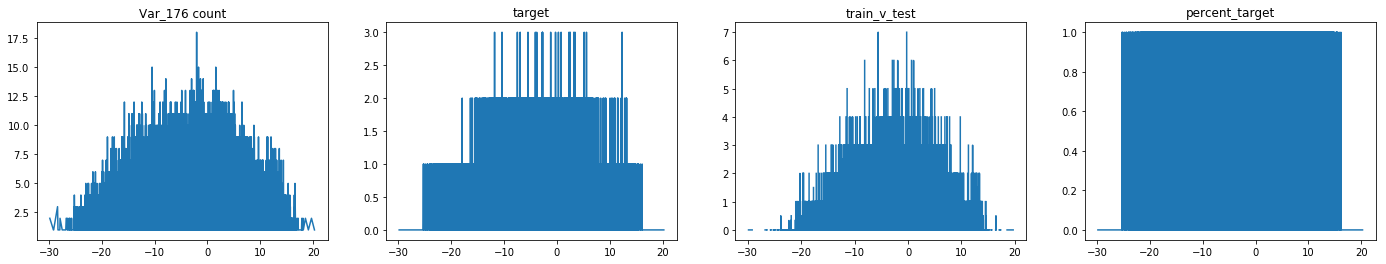

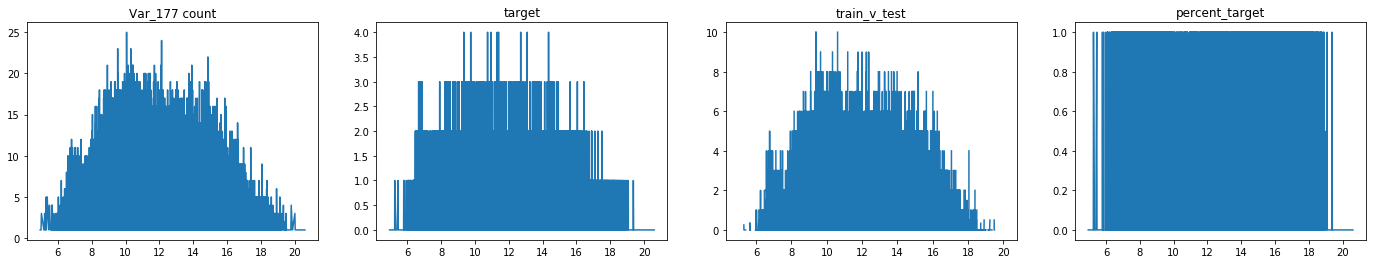

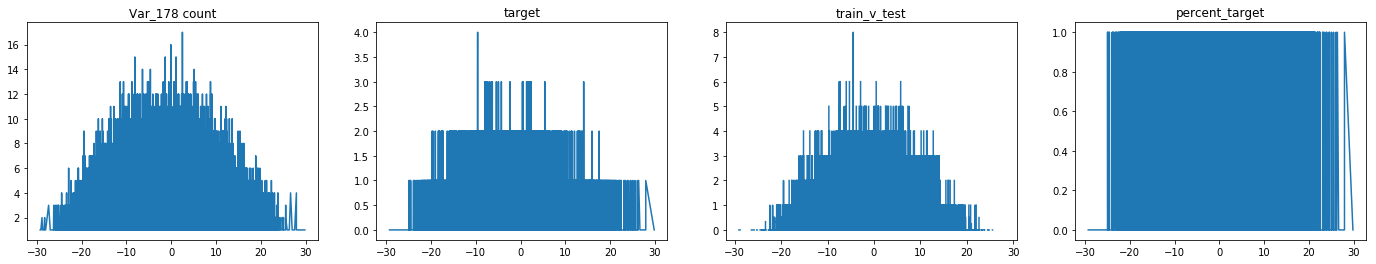

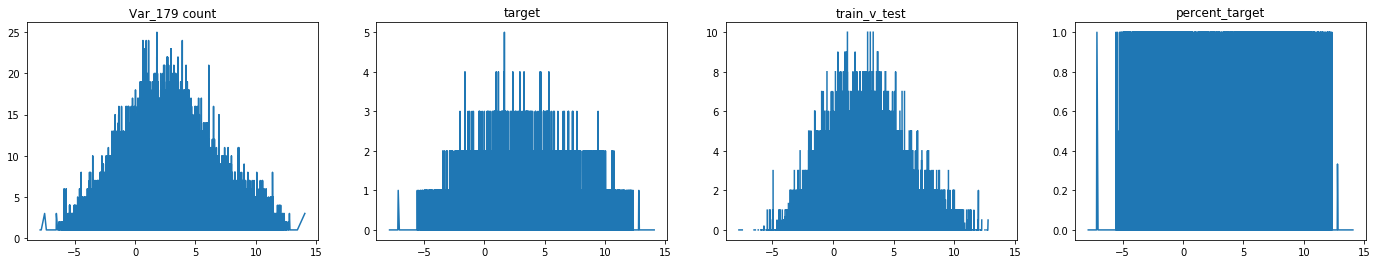

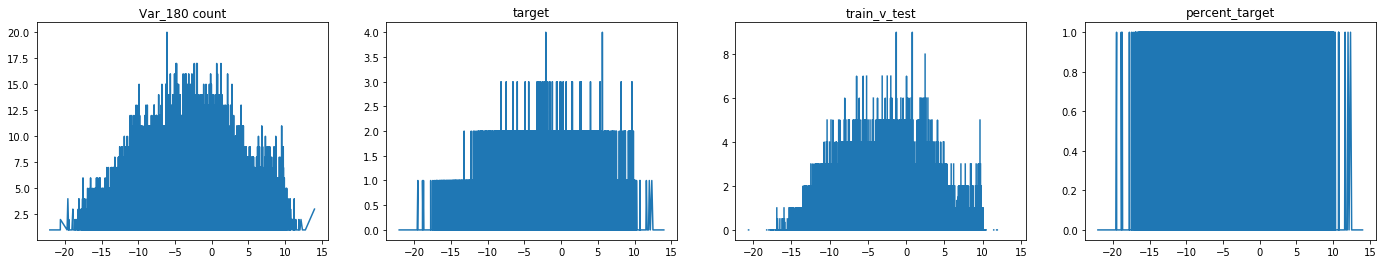

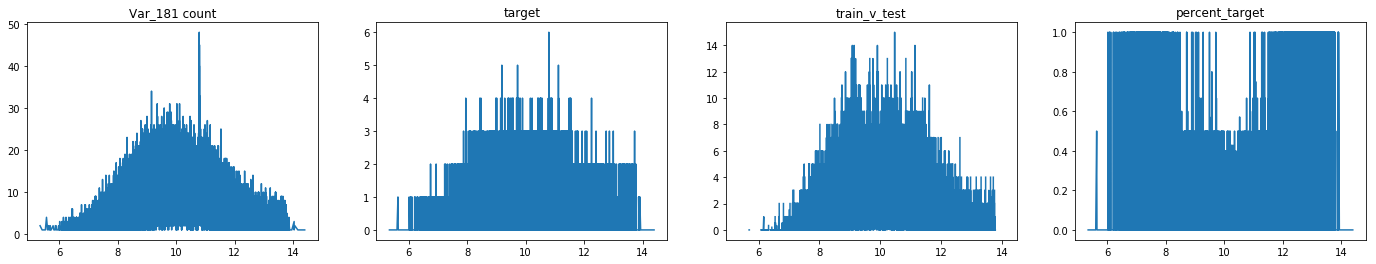

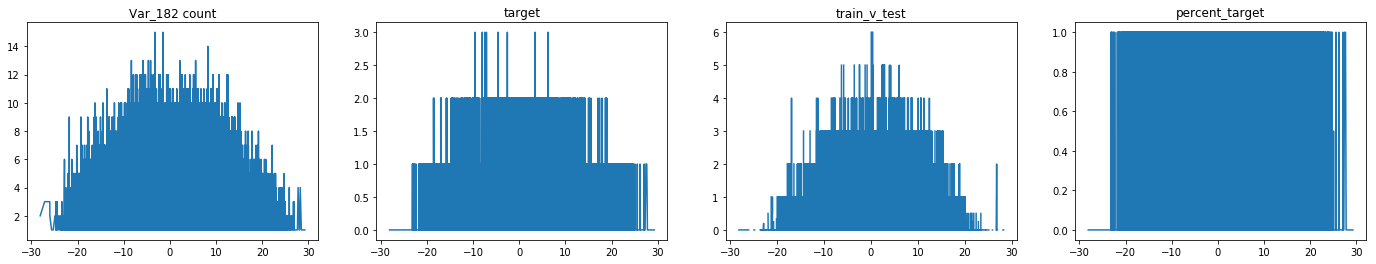

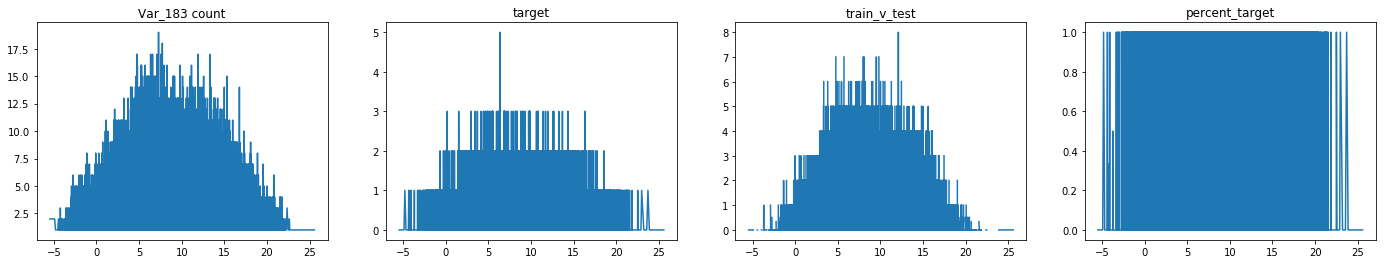

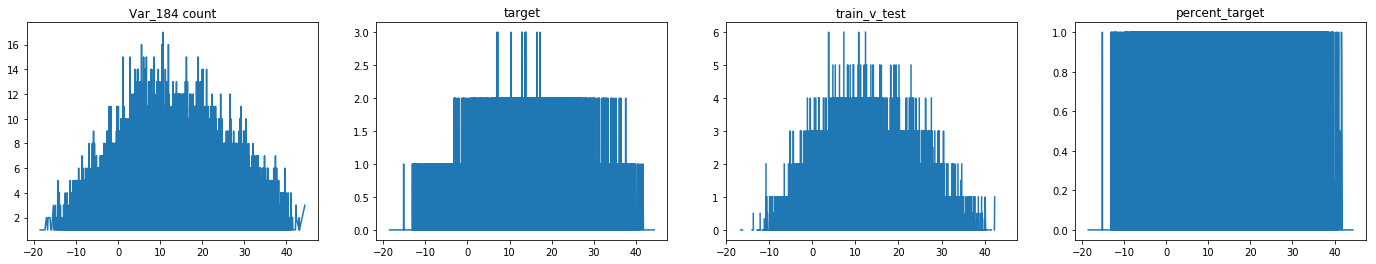

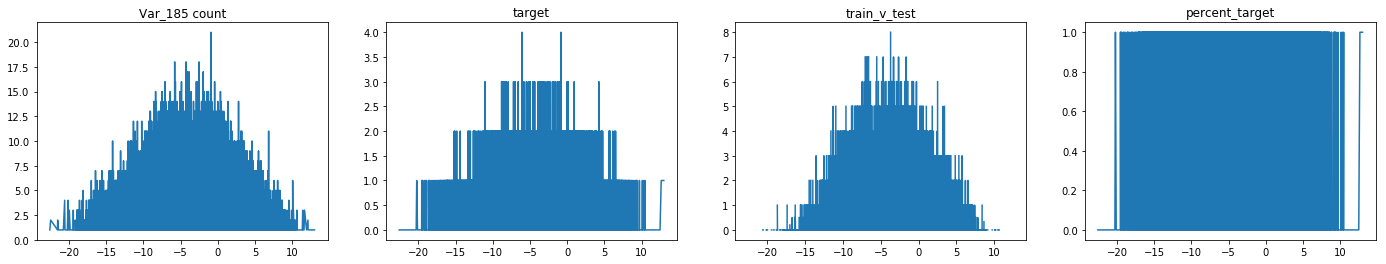

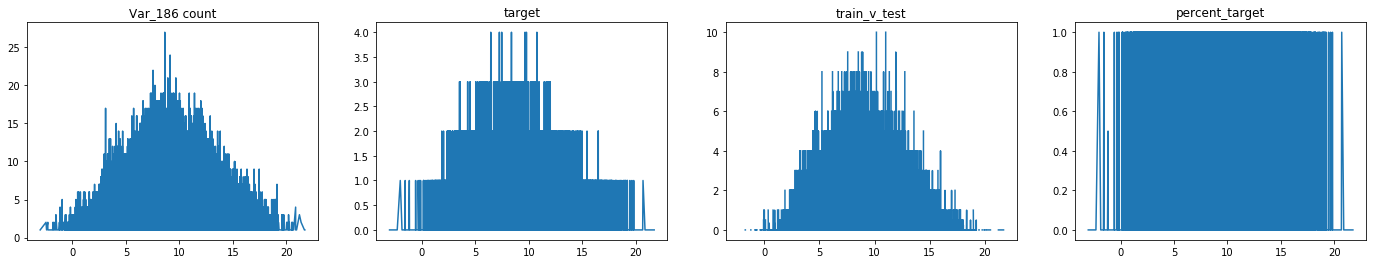

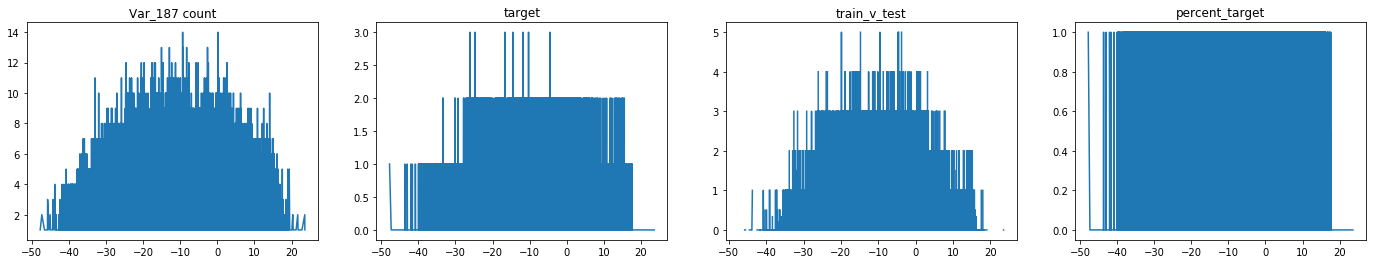

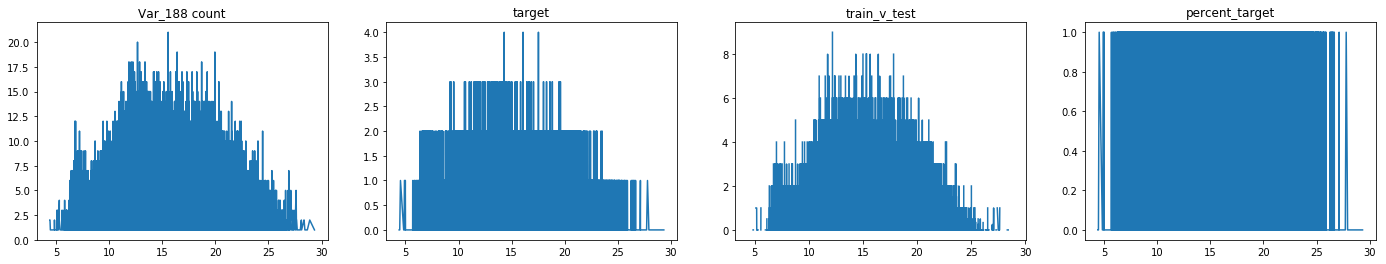

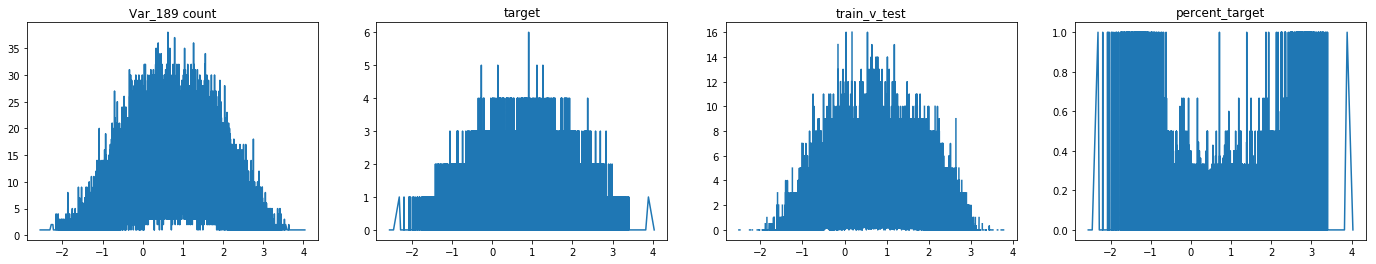

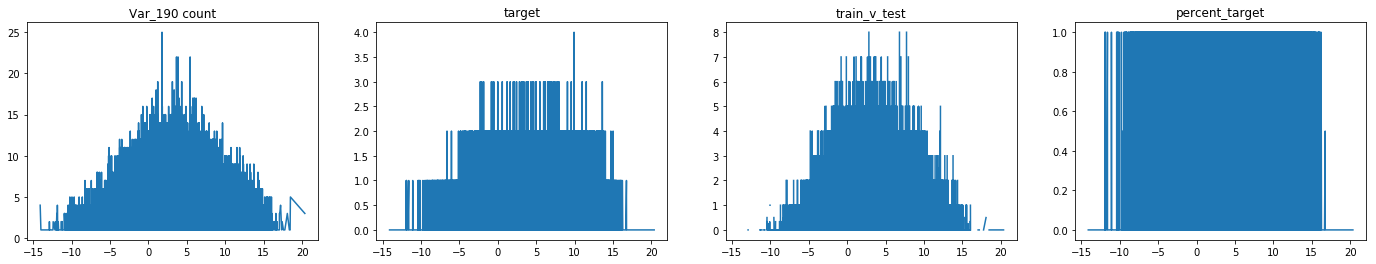

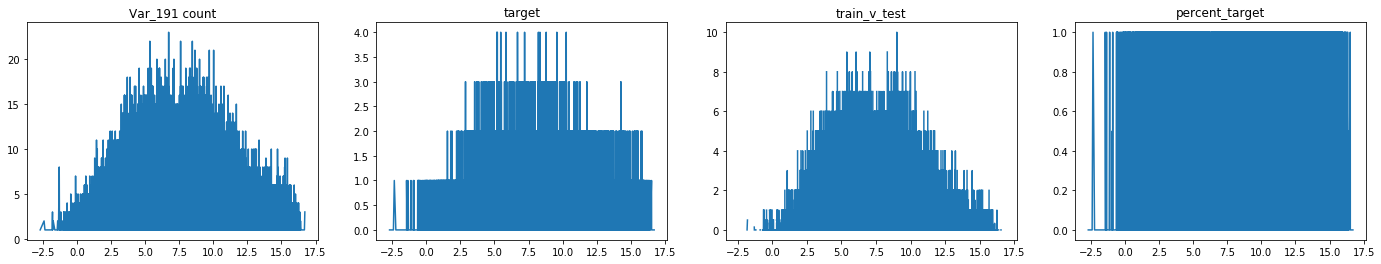

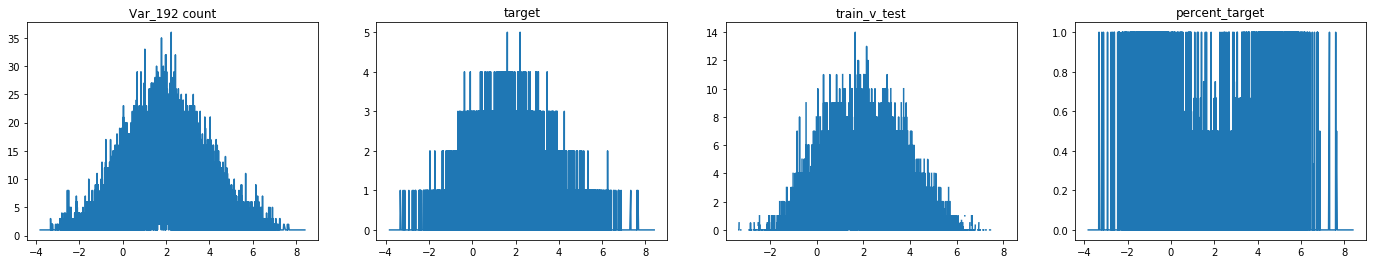

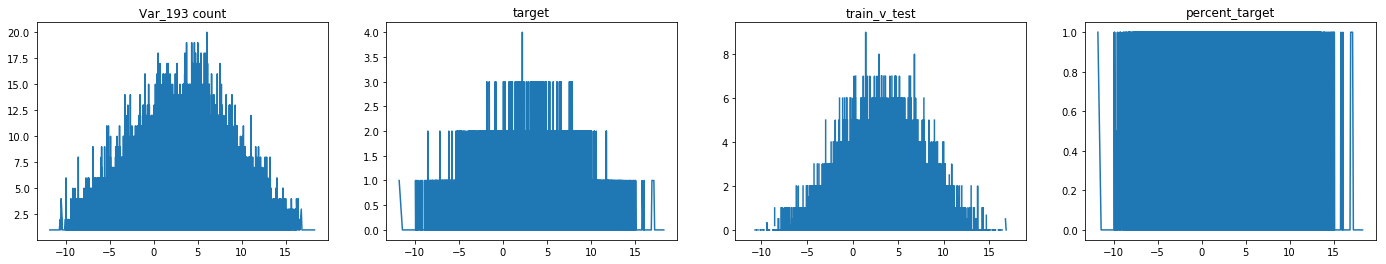

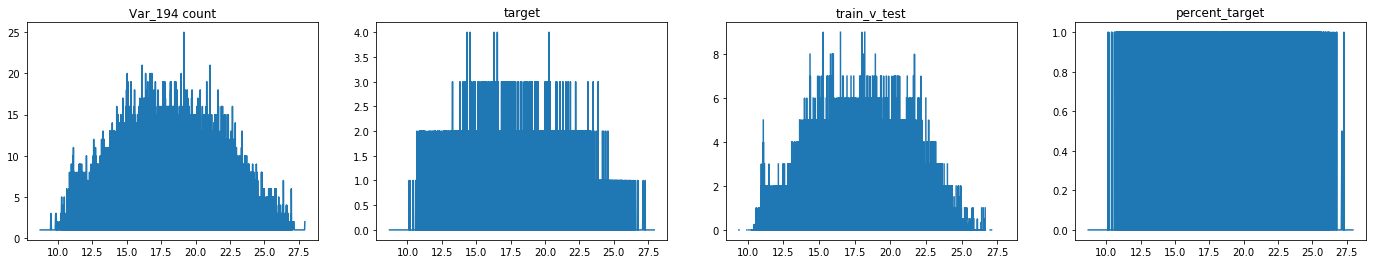

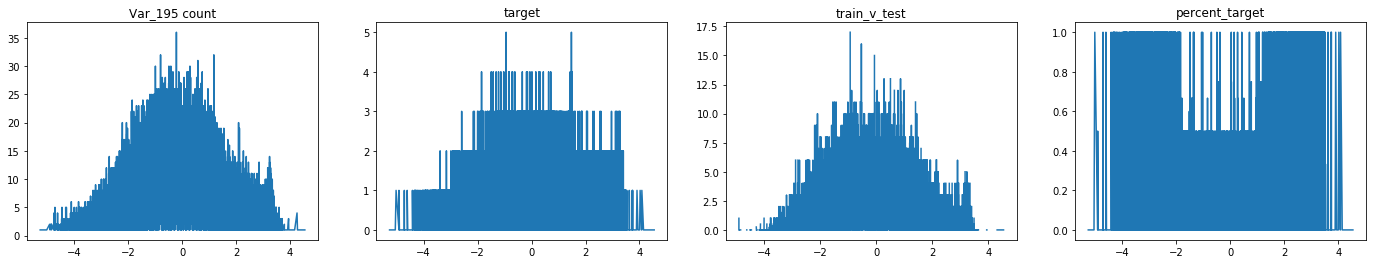

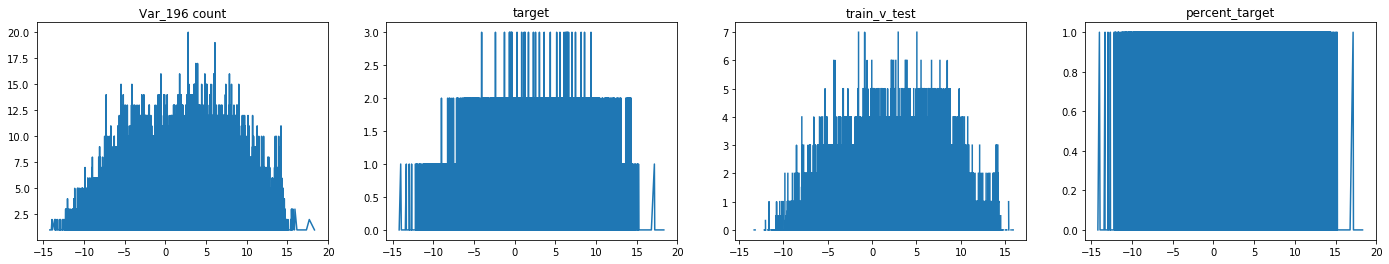

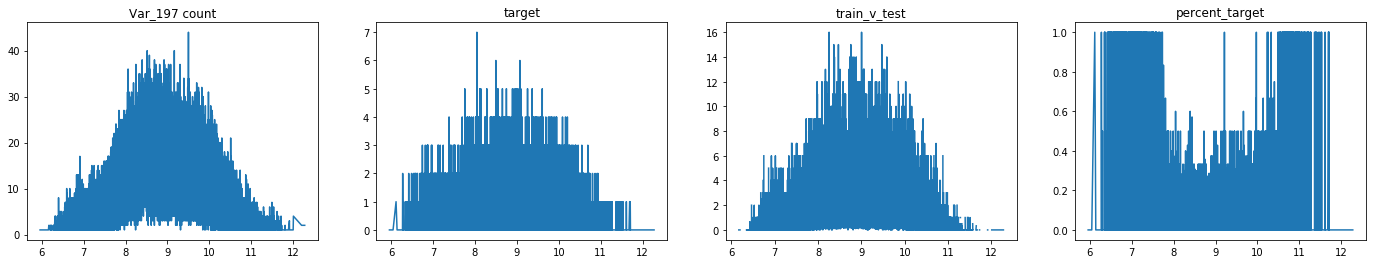

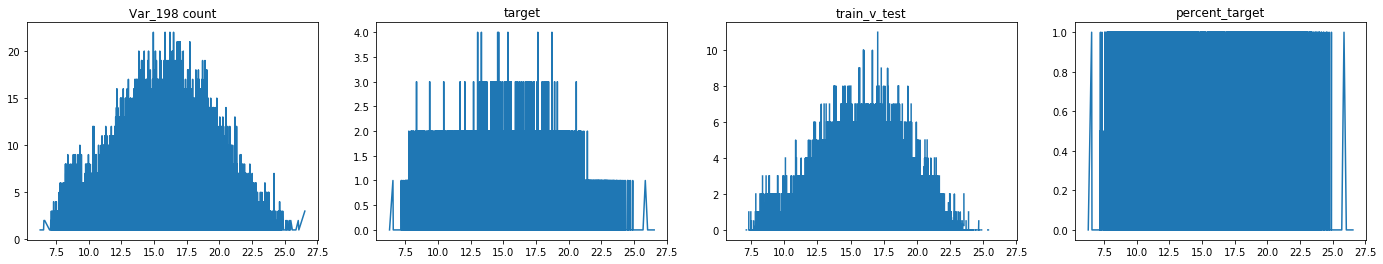

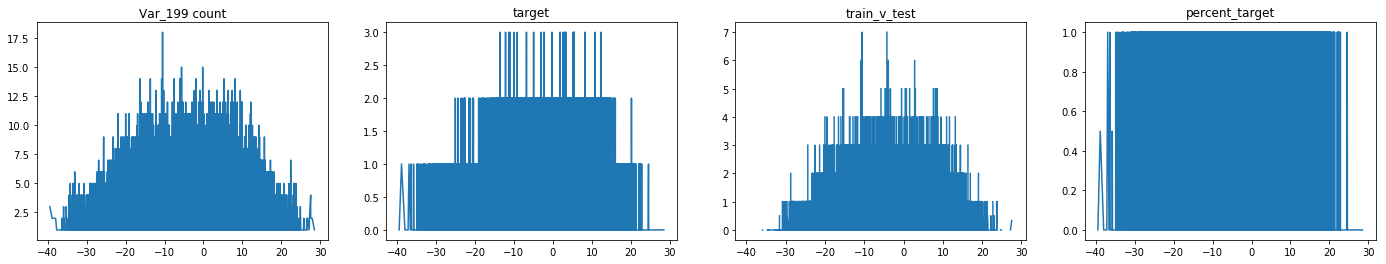

In [22]:

    
for i, dat in enumerate(checkdata):
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24,4))
    ax[0].plot(dat['count'])
    ax[0].title.set_text('Var_'+ str(i)+' count' )
    ax[1].plot(dat['target'])
    ax[1].title.set_text('target')
    ax[2].plot(dat['train_v_test'])
    ax[2].title.set_text('train_v_test')
    ax[3].plot(dat['percent_target'])
    ax[3].title.set_text('percent_target')

    plt.show()
    